In [130]:
import time
import warnings

import numpy as np

from scipy.integrate import simps

from astropy import coordinates as coord
from astropy import units as u
from astropy.table import Table

import astroquery
from astroquery.simbad import Simbad
from astroquery.vo_conesearch import conf, conesearch, vos_catalog

import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
from numpy import logical_and as AND
mag = 7
flux = (mag*u.ABmag).to(u.photon/u.s/u.cm**2/u.AA, u.spectral_density(5500*u.AA))
Vflux = flux*3000*u.AA
print(Vflux)

QE = cam.QE
QEbound = AND(400 <= QE[0], QE[0] <= 700)
response = (simps(QE[1][QEbound], QE[0][QEbound]) * u.nm / u.photon).to(u.AA/u.photon)
area = np.pi * (cam.radius * 0.1 * u.cm) ** 2
t = cam.exp_time * u.s

cts = flux * response * area * t
print(cts)

4736.990740380706 ph / (cm2 s)
45747.741917635874


In [118]:
mag = 7
print('mag = ', mag)

# print(mag)

###########
# wav_V = 5500 * u.AA
# zeroflux_V = (3640 * u.Jy).to(u.photon/u.AA/u.cm/u.cm/u.s,
#                               equivalencies=u.spectral_density(wav_V))
# Vflux = 10.**(-0.4*mag)
# flux = zeroflux_V * Vflux

# print(flux)

# flux = (3640 * u.Jy).to(u.photon/u.s/u.cm**2/u.angstrom, u.spectral_density(5556*u.angstrom))

# print(flux)


flux = (mag*u.ABmag).to(u.photon/u.s/u.cm**2/u.nm, u.spectral_density(550*u.nm))
# # flux = flux*exp_time*area

print('flux =', flux)

# flux = flux * u.s * u.cm**2

# QE = np.genfromtxt("stereo/data/ASISigma_QE.csv", delimiter=',', unpack=True)

QE = cam.QE
response = simps(QE[1][QEbound], QE[0][QEbound]) * u.nm / u.photon
# pix_scale = 
area = np.pi * (cam.radius * 0.1 * u.cm) ** 2
# pix_scale = np.deg2rad(cam.fov[0] / cam.sensor_pixwidth)
# area = (cam.pix_size * 0.1 * u.cm)**2 * pix_scale

print('A_tel = ', area)

f = flux * response * area * cam.exp_time * u.s

print('counts (t=0.3s) = flux*QE*A_tel*t = ', f)

# pixel_val = flux * response

# print(pixel_val)

mag =  7
flux = 15.789969134602357 ph / (cm2 nm s)
A_tel =  44.178646691106465 cm2
counts (t=0.3s) = flux*QE*A_tel*t =  45747.741917635896


In [56]:
from stereo.hardware import ASI183MM_Sigma135mm as cam
# cam.fov[0] / cam.sensor_pixwidth * 3600
cam

Camera(sensor_pixwidth=5496, sensor_pixheight=3672, pix_size=0.0024, focal_length=135, fnumber=1.8, avg_noise=1.6, temp=20, exp_time=0.3, max_ct=15000, QE=array([[4.03025472e+02, 4.10601479e+02, 4.17672419e+02, 4.28783895e+02,
        4.39895371e+02, 4.53882772e+02, 4.47876277e+02, 4.62118324e+02,
        4.73229800e+02, 4.84341276e+02, 4.95452753e+02, 5.06564229e+02,
        5.17675705e+02, 5.28787182e+02, 5.39898658e+02, 5.51010134e+02,
        5.62121611e+02, 5.73233087e+02, 5.83586962e+02, 5.93435771e+02,
        6.04547247e+02, 6.15658724e+02, 6.26847903e+02, 6.37881676e+02,
        6.49077330e+02, 6.60104629e+02, 6.71216105e+02, 6.82327581e+02,
        6.93439058e+02, 7.04550534e+02, 7.14146809e+02, 7.23743084e+02,
        7.34854560e+02, 7.45966037e+02, 7.57077513e+02, 7.68188989e+02,
        7.78290331e+02, 7.88391674e+02, 7.97987949e+02, 8.05968009e+02,
        8.16675431e+02, 8.27786908e+02, 8.38898384e+02, 8.50009860e+02,
        8.61121337e+02, 8.72232813e+02, 8.83344289e+0

In [11]:
from astropy.table import Table

BSC5 = 'resources/yale_bright_star_catalog5.fits.gz'
catalog = Table.read(BSC5)

print(catalog[catalog['Vmag'] < 0.5])

# x = np.asarray(catalog['Vmag'])

# print(np.sort(x))

 HR     Name      HD    RAJ2000    DEJ2000   Vmag  B-V         SpType       
                          deg        deg     mag   mag                      
---- ---------- ------ ---------- --------- ----- ----- --------------------
 472    Alp Eri  10144    24.4287  -57.2367  0.46 -0.16                B3Vpe
1708  13Alp Aur  34029    79.1725   45.9981  0.08  0.80         G5IIIe+G0III
1713  19Bet Ori  34085    78.6346   -8.2017  0.12 -0.03                B8Ia:
2326    Alp Car  45348    95.9879  -52.6958 -0.72  0.15                 F0II
2491   9Alp CMa  48915   101.2871  -16.7161 -1.46  0.00                 A1Vm
2943  10Alp CMi  61421   114.8254    5.2250  0.38  0.42               F5IV-V
5340  16Alp Boo 124897   213.9154   19.1825 -0.04  1.23        K1.5IIIFe-0.5
5459    Alp1Cen 128620   219.8996  -60.8353 -0.01  0.71                  G2V
7001   3Alp Lyr 172167   279.2346   38.7836  0.03  0.00                 A0Va


In [ ]:
# from astropy.utils import minversion

# if not minversion(astroquery, '0.3.10'):
#     conf.vos_baseurl = 'https://astroconda.org/aux/vo_databases/'

In [10]:
conesearch.list_catalogs()

['Guide Star Catalog 2.3 Cone Search 1',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 1',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 2',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 3',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 4',
 'SDSS DR8 - Sloan Digital Sky Survey Data Release 8 1',
 'SDSS DR8 - Sloan Digital Sky Survey Data Release 8 2',
 'The HST Guide Star Catalog, Version 1.1 (Lasker+ 1992) 1',
 'The HST Guide Star Catalog, Version 1.2 (Lasker+ 1996) 1',
 'The HST Guide Star Catalog, Version GSC-ACT (Lasker+ 1996-99) 1',
 'The USNO-A2.0 Catalogue (Monet+ 1998) 1',
 'Two Micron All Sky Survey (2MASS) 1',
 'Two Micron All Sky Survey (2MASS) 2',
 'USNO-A2 Catalogue 1']

In [11]:
c = coord.SkyCoord.from_name('M31', frame='icrs')
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68470833, 41.26875)>


In [170]:
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
from astropy.time import Time

ra = 10.68
dec = 41.26
time = "2016-12-26 22:38:52"
lat, lon, alt = -85.7, 141.7, 39277

eloc = EarthLocation(lat=lat*u.deg, lon=lon*u.deg, 
                     height=alt*u.m)
obs_time = Time(time)

aa = AltAz(location=eloc, obstime=obs_time)
coords = coord.SkyCoord(ra=ra, dec=dec, obstime=time, unit=u.deg)
foo = coords.transform_to(aa)

print(foo, foo.alt.value)

<SkyCoord (AltAz: obstime=2016-12-26 22:38:52.000, location=(-378865.88567323, 299210.24717304, -6377905.26529705) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (151.79078046, -45.17779123)> -45.177791234836796


In [76]:
%%timeit
x = np.empty((0,3), float)
for i in range(10):
    x = np.append(x, [[i, i+1, i+2]], axis=0)

47.8 µs ± 778 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [75]:
%%timeit
x = []
for i in range(10):
    x.append([i,i+1,i+2])
x = np.asarray(x, dtype=float)

8.08 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [34]:
# import matplotlib.pyplot as plt                                   
import numpy as np
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
from astropy.time import Time
from astropy import units as u

# import astroquery                                                 
# from astroquery.simbad import Simbad                              
from astroquery.vo_conesearch import conesearch# , conf, vos_catalo\
                                                                

from astropy.table import Table                                   


def generate_starfield(ra: float, dec: float, radius: float,
                       obs_lat : float, obs_lon : float,
                       obs_alt : float,
                       obs_time : str,
                       mag_limit : float = None):
    """                                                             
    Generate the star field of a region centered at the             
    sky coordinates (ra, dec) with given radius at a                
    given time.                                                     
    Parameters                                                      
    ----------
    ra : float                                                      
        The RA sky coord of the center of the starfield (deg).      
    dec : float                                                     
        The DEC sky coord of the center of the starfield (deg).     
    radius : float                                                  
        The radius of the starfield region (deg).                   
    obs_lat : float                                                 
        The latitude on Earth of the observation (deg).             
    obs_lon : float                                                 
        The longitude on Earth of the observation (deg).            
    obs_time : str                                                  
        The observation time (YYYY-MM-DD HH:MM:SS).                 
    mag_limit : float                                               
        An upper limit on the star magnitudes, if desired.          
                                                                    
    Returns     
   -------                                                         
    """

    # create the skycoord object of the center                      
    coords = SkyCoord(ra=ra, dec=dec, 
                            obstime=obs_time,
                            unit=u.deg)

    # perform a conesearch centered at the coords above             
    starcone = conesearch.conesearch(coords, radius * u.degree)

    # get all object of interest's ra, dec, and mag                 
    # limit the magnitude if desired                                
    if mag_limit != None:
        objects_radec = starcone['ra', 'dec', 'Mag'][
            starcone['Mag'] < mag_limit ]
    else:
        objects_radec = starcone['ra', 'dec', 'Mag']
        
    # get observation location and time
    loc = EarthLocation(lat=obs_lat*u.deg, 
                            lon=obs_lon*u.deg, 
                            height=obs_alt*u.m )
    time = Time(obs_time)
    
    # define the AltAz frame for transforming
    altaz = AltAz( location=loc, obstime=time )

    # make another table for alt,az coords
    objects_altaz = Table(objects_radec, names=['alt', 'az', 'Mag'], 
                          copy=True)
    
    # get SkyCoords for ra,dec transformed to alt,az
    rd2aa = SkyCoord(ra=objects_radec['ra'], dec=objects_radec['dec'], 
                     obstime=obs_time, unit=u.deg).transform_to(altaz)

    # set table values to the transformed coords
    objects_altaz['alt'] = rd2aa.alt.value * rd2aa.alt.unit
    objects_altaz['az'] = rd2aa.az.value * rd2aa.az.unit
    
    return objects_altaz

In [35]:
ra = 10.68
dec = 41.26
radius = 0.5
obs_time = "2016-12-26 22:38:52"
obs_lat, obs_lon, obs_alt = -85.7, 141.7, 39277
mag_limit = None

g = generate_starfield(ra, dec, radius, obs_lat, obs_lon, obs_alt, obs_time)

print(g)

Trying http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GSC23&
        alt                 az           Mag  
        deg                deg           mag  
------------------- ------------------ -------
 -45.17758013194108 151.79184719039435  11.782
-45.177677038705966 151.78956449943496  13.002
-45.177355686693474 151.78944383307618  11.796
 -45.17862052222876 151.79167029459938  11.583
-45.176690804598664 151.78953174426684  13.683
 -45.17705620588128 151.79250548278426  14.466
 -45.17937793368813 151.79147374504788  13.577
-45.176169062951146 151.79201665754417  11.973
 -45.17760144352529 151.78784951382505  13.638
 -45.17584287218853  151.7895335807188  12.087
                ...                ...     ...
 -45.36895026247838 152.44715220474566 17.5482
-44.964384033570354 151.15064864105926  16.138
 -44.70994922556819  151.5417926738857 20.3814
-44.702141694972326 151.57331463432223 19.9694
 -44.88870576442579 151.21360977931616 19.6546
 -45.08364912489791 151.094811634387

In [68]:
alt_lo = -45
alt_hi = -44.5
az_lo = 151.8
az_hi = 152

h = g[g['Mag'] < 9.5]

one = np.logical_and(h['alt'] > alt_lo, h['alt'] < alt_hi)
two = np.logical_and(h['az'] > az_lo, h['az'] < az_hi)
cond = np.logical_and(one, two)

j = h[cond]

print(j)
print(np.max(j['alt']))

# print(h)
# print(h[np.logical_and(np.logical_and(h['alt'] > alt_lo, h['alt'] < alt_hi),np.logical_and(h['az'] > az_lo, h['az'] < az_hi))])
# print(g[np.logical_and(np.logical_and(g['alt'] > alt_lo, g['alt'] < alt_hi),np.logical_and(g['az'] > az_lo, g['az'] < az_hi))])

# s = g[g['alt'] >= alt_lo and g['alt'] <= alt_hi]

# print(s)

        alt                 az          Mag 
        deg                deg          mag 
------------------- ------------------ -----
 -44.93199117259483 151.94458646343438 9.289
-44.784240361088024 151.81190880339523 9.363
-44.783191667418215  151.8106803577865 8.659
-44.783191667418215


In [100]:
a = np.zeros((10,))
b = np.array([-10, -8, -2, 15])
min1 = -10
max1 = 15

foo = (max1 - min1) / (len(a)-1)

b1 = (b - min1) / foo

# print(b1)

# a[int(b1)] = 1

# print(a)

# map an array of values onto another array
def map_array(x, y):
    xspan = np.max(x) - np.min(x)
    
    # Convert the left range into a 0-1 range (float)
    xpercent = (x - np.min(x)) / xspan

    # Convert the 0-1 range into a value in the right range.
    ind = np.round_(xpercent * (len(y)-1)).astype(int)
    
    ycopy = np.copy(y)
    
    ycopy[ind] = 1
    
    return ycopy

print(map_array(b, a))

# # we want to map 1d positions to indices for pixels
# ind = np.linspace(0, 9, 10)

# mapind = map_array(b, ind)

# # print(mapind)
# order = mapind.astype(int)

# print(a)

# a[order] = 1

# print(a)

[1. 1. 0. 1. 0. 0. 0. 0. 0. 1.]


In [93]:
foo = np.zeros((4, 10))

print(foo)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [285]:
# # create the skycoord object of the center                      
# coords = coord.SkyCoord(ra=ra, dec=dec, 
#                         obstime=obs_time,
#                         unit=u.deg)

# # perform a conesearch centered at the coords above             
# starcone = conesearch.conesearch(coords, radius * u.deg)

# print(len(starcone))

# # get all object of interest's ra, dec, and mag                 
# # limit the magnitude if desired                                
# if mag_limit != None:
#     objects_radec = starcone['ra', 'dec', 'Mag'][
#         starcone['Mag'] < mag_limit ]
# else:
#     objects_radec = starcone['ra', 'dec', 'Mag']
    
# print("radecmag")

# # get observation location and time
# loc = EarthLocation(lat=obs_lat*u.deg, 
#                         lon=obs_lon*u.deg, 
#                         height=obs_alt*u.m )
# time = Time(obs_time)

# print("earth")

# # define the AltAz frame for transforming
# altaz = AltAz( location=loc, obstime=time )

# transform ra, dec to alt, az   
# objects_altaz = Table(objects_radec, names=['alt', 'az', 'Mag'], copy=True)

print(objects_altaz)

# test2 = SkyCoord(ra=objects_altaz['ra'], dec=objects_altaz['dec'], 
#          obstime=obs_time, unit=u.deg).transform_to(altaz)

# objects_altaz.rename_columns(('ra', 'dec'),('alt', 'az'))

# objects_altaz['alt'] = test2.alt.value*test2.alt.unit
# objects_altaz['az'] = test2.az.value*test2.az.unit

# print(objects_altaz)

# row_radec = SkyCoord(ra=row['ra'], dec=row['dec'],
#                     obstime=obs_time, unit=u.deg)
# row_altaz = row_radec.transform_to(altaz)
    
# print(objects_altaz)

# t = Table(objects_altaz, names=['alt', 'az', 'Mag'],
#           meta=objects_radec.meta)

# tpd = t.to_pandas()

# print(tpd)

      alt               az          Mag  
      deg              deg          mag  
---------------- ---------------- -------
       10.680986        41.259754  11.782
       10.678854        41.259926  13.002
       10.678721        41.259609  11.796
       10.680885        41.260799  11.583
       10.678762        41.258942  13.683
        10.68157        41.259209  14.466
       10.680748        41.261562  13.577
       10.681057        41.258339  11.973
       10.677243        41.259907  13.638
       10.678711        41.258095  12.087
             ...              ...     ...
       10.649064        41.216122  16.842
10.7388677597046 41.2374458312988  21.215
 10.737940788269 41.2360572814941 20.9301
10.7251749038696 41.2235870361328  20.607
10.7071628570557 41.2145156860352 21.1883
10.7355031967163 41.2327003479004 21.6362
       10.737576        41.284798   14.48
       10.625245        41.231834  16.261
       10.746333        41.262688  15.276
       10.743649        41.245636 

In [269]:
y = x
# print(x)
x_ = x[:,1:]

# row_radec = SkyCoord(ra=row['ra'], dec=row['dec'],
#                         obstime=obs_time, unit=u.deg)
#     row_altaz = row_radec.transform_to(altaz)

# print(x_)

testradec = SkyCoord(ra=x[:,0], dec=x[:,1], obstime=obs_time, unit=u.deg)
print(testradec)

<SkyCoord (ICRS): (ra, dec) in deg
    [(0.,  1.), (1.,  2.), (2.,  3.), (3.,  4.), (4.,  5.), (5.,  6.),
     (6.,  7.), (7.,  8.), (8.,  9.), (9., 10.)]>


In [12]:
result = conesearch.conesearch(c, 0.1 * u.degree)

Trying http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GSC23&


In [13]:
print('First non-empty table returned by', result.url)
print('Number of rows is', len(result))

First non-empty table returned by http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GSC23
Number of rows is 4028


In [14]:
print(result)

    objID           gsc2ID      gsc1ID ... multipleFlag compassGSC2id   Mag  
                                       ...                              mag  
-------------- ---------------- ------ ... ------------ ------------- -------
23323175812944 00424433+4116085        ...            0 6453800072293   9.453
23323175812948 00424403+4116069        ...            0 6453800072297   9.321
23323175812933 00424455+4116103        ...            0 6453800072282  10.773
23323175812939 00424464+4116092        ...            0 6453800072288   9.299
23323175812930 00424403+4116108        ...            0 6453800072279  11.507
23323175812931 00424464+4116106        ...            0 6453800072280   9.399
23323175812973 00424446+4116016        ...            0 6453800072322   12.07
23323175812966 00424398+4116028        ...            0 6453800072315  12.136
23323175812979 00424420+4116009        ...            0 6453800072328  10.065
23323175812958 00424377+4116045        ...            0 64538000

In [15]:
ra_colname = 'ra'
dec_colname = 'dec'

In [16]:
print(result.colnames)

['objID', 'gsc2ID', 'gsc1ID', 'hstID', 'ra', 'dec', 'epoch', 'raEpsilon', 'decEpsilon', 'rapm', 'decpm', 'rapmErr', 'decpmErr', 'deltaEpoch', 'FpgMag', 'FpgMagErr', 'FpgMagCode', 'JpgMag', 'JpgMagErr', 'JpgMagCode', 'NpgMag', 'NpgMagErr', 'NpgMagCode', 'UMag', 'UMagErr', 'UMagCode', 'BMag', 'BMagErr', 'BMagCode', 'VMag', 'VMagErr', 'VMagCode', 'RMag', 'RMagErr', 'RMagCode', 'IMag', 'IMagErr', 'IMagCode', 'JMag', 'JMagErr', 'JMagCode', 'HMag', 'HMagErr', 'HMagCode', 'KMag', 'KMagErr', 'KMagCode', 'class', 'semiMajorAxis', 'eccentricity', 'positionAngle', 'sourceStatus', 'variableFlag', 'multipleFlag', 'compassGSC2id', 'Mag']


In [18]:
if ra_colname in result.colnames and dec_colname in result.colnames:
    row = result[0]
    simbad_obj = coord.SkyCoord(ra=row[ra_colname]*u.deg, dec=row[dec_colname]*u.deg)
    print('Searching SIMBAD for\n{}\n'.format(simbad_obj))
    simbad_result = Simbad.query_region(simbad_obj, radius=5*u.arcsec)
    print(simbad_result)
else:
    print('{} or {} not in search results. Choose from: {}'.format(
        ra_colname, dec_colname, ' '.join(result.colnames)))

Searching SIMBAD for
<SkyCoord (ICRS): (ra, dec) in deg
    (10.684737, 41.269035)>

            MAIN_ID                  RA      ...     COO_BIBCODE    
                                  "h:m:s"    ...                    
------------------------------- ------------ ... -------------------
               NAME P2B Cluster  00 42 44.34 ... 2010ApJ...710..755G
                     [LFG93] P3  00 42 44.34 ... 2010ApJ...710..755G
                      NAME M31*  00 42 44.33 ... 1993ApJ...411L.107C
    [K2002] J004244.35+411608.9 00 42 44.351 ... 2002ApJ...577..738K
                      HD   3969 00 42 44.367 ... 1988A&AS...74..449R
                  [HPH2013] 165  00 42 44.34 ... 2013A&A...555A..65H
                  [HPH2013] 164  00 42 44.30 ... 2013A&A...555A..65H
                     [LFG93] P1  00 42 44.37 ... 2010ApJ...710..755G
    [KPM2002] G121.1741-21.5730  00 42 44.27 ... 2002AJ....124.2990K
                  [O2006] QSS 8 00 42 44.365 ... 2002ApJ...577..738K
                  

In [19]:
print(simbad_result.colnames)

['MAIN_ID', 'RA', 'DEC', 'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA', 'COO_ERR_MINA', 'COO_ERR_ANGLE', 'COO_QUAL', 'COO_WAVELENGTH', 'COO_BIBCODE']


In [31]:
import numpy as np

from astropy import coordinates as coord
from astropy import units as u
from astropy.table import Table

import astroquery
from astroquery.simbad import Simbad
from astroquery.vo_conesearch import conf, conesearch, vos_catalog

import matplotlib.pyplot as plt


def generate_starfield(ra : float, dec : float, radius : float,
		       time : str = None):
    """                                                             
    Return a table of sky coordinates for objects                   
    within the circular region of given radius around               
    given sky coordinates. Also returns a matplotlib                
    figure that plots the starfield region.                         
    Parameters                                                      
    ----------                                                      
    ra : float                                                      
        The RA sky coord of the center of the starfield (deg).      
    dec : float                                                     
        The DEC sky coord of the center of the starfield (deg).     
    radius : float                                                  
        The radius of the starfield region (deg).                   
    time : str                                                      
        The observation time of the starfield (YYYY-MM-DDTHH:MM:SS)\
.                                                                   
                                                                    
    Returns                                                         
    -------                                                         
    """

    # create the skycoord object                                    
    coords = coord.SkyCoord(ra=ra, dec=dec,
                            obstime=time, unit=u.deg)

    # perform a conesearch centered at the coords above
    starcones = conesearch.conesearch(coords, radius * u.degree)
    
    



In [24]:
ra = 10.68
dec = 41.26
time = "2016-01-02T00:00:00"
r = 0.1

In [209]:
#generate_starfield(ra=ra, dec=dec, radius=r, time=time)

objects_radec = starconesss['ra', 'dec', 'Mag'][starconesss['Mag']<12]

print(len(objects_radec))

94


In [279]:
# for row in objects_radec:
#     row['ra'] = 0
# print(objects_radec)

objects_radec.rename_columns(('ra', 'dec'), ('alt', 'az'))
print(objects_radec)

      alt               az          Mag  
      deg              deg          mag  
---------------- ---------------- -------
       10.680986        41.259754  11.782
       10.678854        41.259926  13.002
       10.678721        41.259609  11.796
       10.680885        41.260799  11.583
       10.678762        41.258942  13.683
        10.68157        41.259209  14.466
       10.680748        41.261562  13.577
       10.681057        41.258339  11.973
       10.677243        41.259907  13.638
       10.678711        41.258095  12.087
             ...              ...     ...
       10.649064        41.216122  16.842
10.7388677597046 41.2374458312988  21.215
 10.737940788269 41.2360572814941 20.9301
10.7251749038696 41.2235870361328  20.607
10.7071628570557 41.2145156860352 21.1883
10.7355031967163 41.2327003479004 21.6362
       10.737576        41.284798   14.48
       10.625245        41.231834  16.261
       10.746333        41.262688  15.276
       10.743649        41.245636 

In [69]:
from typing import Tuple
import numpy as np

def get_fov(sensor_width : float, sensor_height : float,
            focal_length : float) -> Tuple[float, float]:
    """                                                             
    Calculates the field of view (FoV) of a camera                  
    given its sensor width and height, and the focal                
    length of the camera lens.                                      
                                                                    
    Parameters                                                      
    ----------                                                      
    sensor_width : float                                            
        The width of the camera sensor (mm).                        
    sensor_height : float                                           
        The height of the camera sensor (mm).                       
    focal_length : float                                            
        The focal length of the camera lens (mm).                   
    Returns                                                         
    -------                                                         
    xfov, yfov : float                                              
        The horizontal (x) and vertical (y) field                   
        of view in degrees.                                         
    """

    # calculate the horiz and vert FoV                              
    xfov_rad = 2 * np.arctan2( sensor_width / 2, focal_length )
    yfov_rad = 2 * np.arctan2( sensor_height / 2, focal_length )
    d = np.sqrt( sensor_width**2 + sensor_height**2 )
    dfov_rad = 2 * np.arctan2( d / 2, focal_length )
    
    # convert them to degrees
    xfov = np.rad2deg(xfov_rad)
    yfov = np.rad2deg(yfov_rad)
    dfov = np.rad2deg(dfov_rad)

    # and return them                                               
    return xfov, yfov, dfov


In [70]:
sw, sh, fl = 40, 20, 135

fov = get_fov(sw, sh, fl)

print(fov)

(16.853938042961346, 8.47278959811768, 18.80956269625699)


In [68]:
x = {'one':1, 'two':2, 'three':3}

SyntaxError: invalid syntax (<ipython-input-68-5b0a28822aeb>, line 3)

In [2]:
from astroquery.simbad import Simbad                                                            
from astropy.coordinates import SkyCoord
from astropy import units as u
coord = SkyCoord('16 14 20.30000000 -19 06 48.1000000', unit=(u.hourangle, u.deg), frame='fk5') 
query_results = Simbad.query_region(coord)                                                      
# query_results 

In [29]:
from urllib.parse import urlencode
from astropy.io import fits
object_main_id = query_results[0]['MAIN_ID'].decode('ascii')
object_coords = SkyCoord(ra=query_results['RA'], dec=query_results['DEC'], 
                         unit=(u.hourangle, u.deg), frame='icrs')
query_params = { 
    'hips': 'DSS', 
    'ra': 140, 
    'dec': 45, 
    'fov': (600 * u.arcmin).to(u.deg).value, 
    'width': 1000, 
    'height': 1000 
}
url = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params)}' 
hdul = fits.open(url)
hdul.info()
hdul[0].header

Filename: /home/zackashm/.astropy/cache/download/py3/67ae0abbe4d45fdee226f20b4a14986d
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   (1000, 1000)   int16   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1000                                                  
NAXIS2  =                 1000                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                500.0 / Pixel coordinate of reference point            
CRPIX2  =                500.0 / Pixel coordinate of reference point            
CDELT1  =   -0.010025462350551 / [deg] Coordinate increment at reference point  
CDELT2  =    0.010025462350551 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'        

INFO: Auto-setting vmin to  2.666e+03 [aplpy.core]
INFO: Auto-setting vmax to  5.625e+03 [aplpy.core]


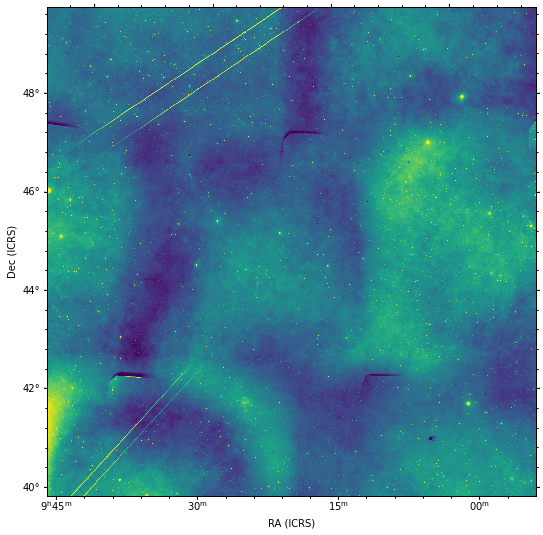

In [30]:
import aplpy
gc = aplpy.FITSFigure(hdul)  
gc.show_colorscale()

In [2]:
def map_stars(xstars : np.ndarray, ystars : np.ndarray, xmin, xmax, ymin, ymax, width : int, height : int) -> np.ndarray:
    """                                                             
    Map the positions of stars onto pixels of a frame with          
    dimensions (height, width).                                     
                                                                    
    Parameters                                                      
    ----------                                                      
    xstars : ndarray                                                
        The x positions of stars to be mapped.                      
    ystars : ndarray                                                
        The y positions of stars to be mapped.                      
    width : int                                                     
        The pixel width of the frame which to map the stars onto.   
    height : int                                                    
        The pixel height of the frame which to map the stars onto.  
                                                                    
    Returns                                                         
    -------                                                         
    mapped_stars : ndarray                                          
        An ndarray with dimensions (height, width) with pixels      
        equal to 1 if a star is located there.                      
    """
    
    # create an empty frame                                         
    frame = np.zeros((height, width))

    # get the span of x and y positions                             
    xspan = xmax - xmin
    yspan = ymax - ymin

    # get the mapping scale                                         
    xscale = (xstars - xmin) / xspan
    yscale = (ystars - ymin) / yspan

    # map the positions to the frame indices                        
    xind = np.round_(xscale * (width - 1)).astype(int)
    yind = np.round_(yscale * (height - 1)).astype(int)

    # set pixel values of x,y in the frame to 1                     
    frame[yind, xind] = 1

    # and return the frame                                          
    return frame

In [3]:
x = np.array([-1, 5, 8])
y = np.array([-4, 0, 2])

xmin = -10
xmax = 10
ymin = -5
ymax = 5

height = 5
width = 10

l = map_stars(x, y, xmin, xmax, ymin, ymax, width, height)

In [4]:
print(l)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
from scipy.ndimage import gaussian_filter

g = gaussian_filter(l, sigma=1)

In [6]:
print(g)

[[8.57740434e-05 2.84044621e-03 3.46037188e-02 1.55090927e-01
  2.55948353e-01 1.58257666e-01 4.89869208e-02 2.72532943e-02
  1.60719756e-02 4.76451967e-03]
 [3.96088560e-05 1.31166517e-03 1.59793530e-02 7.16468928e-02
  1.19152538e-01 8.49253097e-02 7.74769585e-02 1.10969521e-01
  8.04332626e-02 3.01238669e-02]
 [7.81878512e-06 2.58922603e-04 3.15432305e-03 1.41900860e-02
  2.51079333e-02 3.67490799e-02 1.12758788e-01 2.18029779e-01
  1.94253434e-01 9.49615705e-02]
 [6.11029445e-07 2.02345162e-05 2.46506872e-04 1.13716825e-03
  2.94841416e-03 1.59640076e-02 8.06077595e-02 1.94265849e-01
  2.21327233e-01 1.33528515e-01]
 [1.79106361e-08 5.93118809e-07 7.22566631e-06 4.02019748e-05
  3.51922313e-04 4.49837140e-03 3.01232738e-02 9.49621636e-02
  1.33528533e-01 9.10070903e-02]]


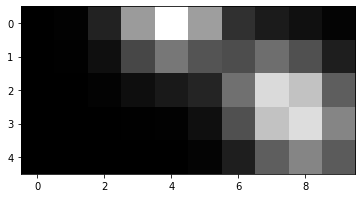

In [13]:
from scipy import misc
import matplotlib.pyplot as plt

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax = fig.add_subplot()  # left side
# ax2 = fig.add_subplot(122)  # right side
# ascent = misc.ascent()
# result = gaussian_filter(ascent, sigma=5)
# ax1.imshow(l)
ax.imshow(g)
plt.show()

In [139]:
from typing import Tuple

import numpy as np

from astropy import units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.table import Table
from astropy.time import Time

# import astroquery                                                                                                                     
# from astroquery.simbad import Simbad                                                                                                  
from astroquery.vo_conesearch.conesearch import conesearch

from scipy.ndimage import gaussian_filter


def fov(
    sensor_width: float, sensor_height: float, focal_length: float
) -> Tuple[float, float, float]:
    """                                                                                                                                 
    Calculates the horizontal, vertical, and diagonal                                                                                   
    field of view (FoV) of a camera given its sensor                                                                                    
    width and height, and the focal length of the                                                                                       
    camera lens.                                                                                                                        
                                                                                                                                        
    Parameters                                                                                                                          
    ----------                                                                                                                          
    sensor_width : float                                                                                                                
        The width of the camera sensor (mm).                                                                                            
    sensor_height : float                                                                                                               
        The height of the camera sensor (mm). 
    focal_length : float                                                                                                                
        The focal length of the camera lens (mm).                                                                                       
    Returns                                                                                                                             
    -------                                                                                                                             
    xfov, yfov, dfov : float                                                                                                            
        The horizontal (x), vertical (y), and                                                                                           
        diagonal (d) field of view in degrees.                                                                                          
    """

    # set the values                                                                                                                    
    w = sensor_width
    h = sensor_height
    f = focal_length
    d = np.sqrt(w ** 2 + h ** 2)

    # calculate the FoV in radians                                                                                                      
    xfov_rad = 2 * np.arctan(w / 2 / f)
    yfov_rad = 2 * np.arctan(h / 2 / f)
    dfov_rad = 2 * np.arctan(d / 2 / f)

    # convert them to degrees                                                                                                           
    xfov = np.rad2deg(xfov_rad)
    yfov = np.rad2deg(yfov_rad)
    dfov = np.rad2deg(dfov_rad)

    # and return them                                                                                                                   
    return xfov, yfov, dfov


def bright_conesearch(center_coord, radius=None, mag_limit=None):
    
    # get catalog of bright stars
    filepath = 'resources/yale_bright_star_catalog5.fits.gz'
    catalog = Table.read(filepath)
    
    # get needed columns and change their names
    catalog.rename_columns(('RAJ2000', 'DEJ2000', 'Vmag'), ('ra', 'dec', 'Mag'))
    
    # remove all stars below the magnitude limit
    if mag_limit is not None:
        catalog = catalog[catalog['Mag'] < mag_limit]

    if radius is not None:
        # get star and center coordinates
        starcoords = SkyCoord(ra=catalog['ra'], dec=catalog['dec'], unit=u.deg)
        catalog['skycoord'] = starcoords

        # get the separations of stars from center
        catalog['separations'] = catalog['skycoord'].separation(center_coord)

        # get only the stars within the radius
        catalog = catalog[catalog['separations'] <= radius*u.deg]
    
    # return the remaining stars
    return catalog['ra', 'dec', 'Mag']
    
    

def map_stars(xstars : np.ndarray,
              ystars : np.ndarray,
              xmin : float,
              xmax : float,
              ymin : float,
              ymax : float,
              width : int,
              height : int) -> np.ndarray:
    """                                                                                                                                 
    Map the positions of stars onto pixels of a frame with                                                                              
    dimensions (height, width).                                                                                                         
                                                                                                                                        
    Parameters                                                                                                                          
    ----------                                                                                                                          
    xstars : ndarray                                                                                                                    
        The x positions of stars to be mapped.                                                                                          
    ystars : ndarray                                                                                                                    
        The y positions of stars to be mapped.                                                                                          
    xmin, xmax : float                                                                                                                  
        The min and max values of the span of x positions.
    ymin, ymax : float                                                                                                                  
        The min and max values of the span of y positions.                                                                              
    width : int                                                                                                                         
        The pixel width of the frame which to map the stars onto.                                                                       
    height : int                                                                                                                        
        The pixel height of the frame which to map the stars onto.                                                                      
                                                                                                                                        
    Returns                                                                                                                             
    -------                                                                                                                             
    mapped_stars : ndarray                                                                                                              
        An ndarray with dimensions (height, width) with pixels                                                                          
        equal to 1 if a star is located there.                                                                                          
    """

    # create an empty frame                                                                                                             
    frame = np.zeros((height, width))

    # get the span of x and y positions                                                                                                 
    xspan = xmax - xmin
    yspan = ymax - ymin

    # get the mapping scale                                                                                                             
    xscale = (xstars - xmin) / xspan
    yscale = (ystars - ymin) / yspan

    # map the positions to the frame indices                                                                                            
    xind = np.round_(xscale * (width - 1)).astype(int)
    yind = np.round_(yscale * (height - 1)).astype(int)

    # set pixel values of x,y in the frame to 1
    frame[yind, xind] = 1

    # and return the frame                                                                                                              
    return frame


def generate_stars(
    ra: float,
    dec: float,
    radius: float,
    obs_lat: float,
    obs_lon: float,
    obs_alt: float,
    obs_time: str,
    mag_limit: float = None
) -> Table:
    """                                                                                                                                 
    Generate an astropy Table of stars in a region centered at the                                                                      
    sky coordinates (ra, dec) with given radius at a given time.                                                                        
    Table coordinates are returned in (alt, az), and so requires                                                                        
    an observation location on Earth. Use mag_limit to return only                                                                      
    stars below a specific magnitude.
                                                                                                                                        
    Parameters                                                                                                                          
    ----------                                                                                                                          
    ra : float                                                                                                                          
        The RA sky coord of the center of the starfield (deg).                                                                          
    dec : float                                                                                                                         
        The DEC sky coord of the center of the starfield (deg).                                                                         
    radius : float                                                                                                                      
        The radius of the starfield region (deg).                                                                                       
    obs_lat : float                                                                                                                     
        The latitude on Earth of the observation (deg).                                                                                 
    obs_lon : float                                                                                                                     
        The longitude on Earth of the observation (deg).                                                                                
    obs_alt : float                                                                                                                     
        The altitude on Earth of the observation (m).                                                                                   
    obs_time : str                                                                                                                      
        The observation time (YYYY-MM-DDTHH:MM:SS).                                                                                     
    mag_limit : float                                                                                                                   
        An upper limit on the star magnitudes, if desired.                                                                              
                                                                                                                                        
    Returns                                                                                                                             
    -------                                                                                                                             
    objects_altaz : astropy.table.Table                                                                                                 
        A table of star coordinates (alt, az) and magnitudes.                                                                           
    """

    # get the center skycoord                                                                          
    coords = SkyCoord(ra=ra, dec=dec, obstime=obs_time, unit=u.deg)

    # perform a conesearch centered at the coord above                                                                                  
    objects_radec = bright_conesearch(coords, radius=radius, mag_limit=mag_limit)

    # get the observation location and time                                                                                             
    loc = EarthLocation(lat=obs_lat * u.deg, lon=obs_lon * u.deg, height=obs_alt * u.m)
    time = Time(obs_time)

    # define the AltAz frame                                                                                                            
    altaz = AltAz(location=loc, obstime=time)

    # make another table for alt, az coords                                                                                             
    objects_altaz = Table(objects_radec, names=["alt", "az", "Mag"], copy=True)

    # get skycoords for ra,dec transformed to alt,az                                                                                    
    rd2aa = SkyCoord(
        ra=objects_radec["ra"], dec=objects_radec["dec"], obstime=obs_time, unit=u.deg
    ).transform_to(altaz)

    # set table values to the transformed coords                                                                                        
    objects_altaz["alt"] = rd2aa.alt.value * rd2aa.alt.unit
    objects_altaz["az"] = rd2aa.az.value * rd2aa.az.unit

    # return result 
    return objects_altaz


def generate_starfield(star_table : Table,
                       height : int,
                       width : int,
                       center_alt : float,
                       center_az : float,
                       xfov : float,
                       yfov : float,
                       psf_sigma : float) -> np.ndarray:
    """                                                                                                                                 
    Generate a star field frame using a table of (alt, az)                                                                              
    coordinates and magnitudes, and a Gaussian PSF.                                                                                     
                                                                                                                                        
    Parameters                                                                                                                          
    ----------                                                                                                                          
    star_table : astropy.table.Table                                                                                                    
        A table of 'alt', 'az', 'Mag' values.                                                                                           
    height : int                                                                                                                        
        The pixel height of the frame.                                                                                                  
    width : int                                                                                                                         
        The pixel width of the frame.                                                                                                   
                                                                                                                                        
    Returns                                                                                                                             
    -------                                                                                                                             
    starfield : ndarray                                                                                                                 
        The array of pixel values making up the star field.                                                                             
    """

    # define the frame boundaries x=az, y=alt                                                                                           
    alt_lo = center_alt - (yfov / 2)
    alt_hi = center_alt + (yfov / 2)
    az_lo = center_az - (xfov / 2)
    az_hi = center_az + (xfov / 2)

    # get the alt, az arrays of the input stars                                                                                         
    alt1 = star_table['alt']
    az1 = star_table['az']

    # remove stars outside the boundaries                                                                                               
    alt_bound = np.logical_and(alt1 >= alt_lo, alt1 <= alt_hi)
    az_bound = np.logical_and(az1 >= az_lo, az1 <= az_hi)
    bound = np.logical_and(alt_bound, az_bound)
    stars = star_table[bound]

    # get the alt, az of the remaining stars                                                                                            
    alt = stars['alt']
    az = stars['az']

    # map the remaining stars to an ndarray frame                                                                                       
    starframe = map_stars(az, alt, az_lo, az_hi, alt_lo, alt_hi, width, height)

    # apply a Gaussian PSF                                                                                                              
    starfield = gaussian_filter(starframe, sigma=psf_sigma)

    # return the starfield                                                                                                              
    return starfield


In [130]:
ra = 10.68
dec = 41.26
radius = 5
mag_limit = 7

print(bright_conesearch(ra, dec, radius=radius, mag_limit=mag_limit))

    ra        dec     Mag 
   deg        deg     mag 
---------- --------- -----
    4.9233   40.7297  6.33
    7.0571   44.3944  5.17
    8.1117   43.4947  6.70
    9.1942   44.4886  5.13
   10.2800   39.4586  5.33
   11.5454   44.8614  6.05
   12.4533   41.0789  4.53
   12.5762   45.0022  6.15
   13.2225   38.5486  6.69
   13.3675   37.4181  6.06
   14.1883   38.4994  3.87
   15.0142   44.7111  6.84
   15.0150   44.7133  6.04
   15.7262   41.3450  5.98
   16.1517   39.9911  6.72


In [143]:
# camera
pix = 2.4e-3 #mm/pix
sensor_width = 5496 #pix
sensor_height = 3672 #pix
focal_length = 135 #mm

xfov, yfov, dfov = fov(sensor_width, sensor_height, focal_length / pix)
print(xfov, yfov, dfov)

# observation
event0 = {
    'index'         : 27,
    'number'        : 88992443,
    'date'          : '2016-12-26 22:38:52',
    'source-coord'  : np.array([-85.676, 159.113, 2569]), #lat, lon, alt
    'ANITA-coord'   : np.array([-85.7, 141.7, 39277]), #lat, lon, alt
    'elevation-ang' : -14.823,
    'azimuth-ang'   : 95.834,
    'polarity'      : 1
     }

ra = 10.68
dec = 41.26
radius = dfov / 2
obs_lat = event0['ANITA-coord'][0]
obs_lon = event0['ANITA-coord'][1]
obs_alt = event0['ANITA-coord'][2]
obs_time = event0['date']
mag_limit = 7

stars = generate_stars(ra, dec, radius, obs_lat, obs_lon, obs_alt, obs_time, mag_limit = mag_limit)

eloc = EarthLocation(lat=obs_lat*u.deg, lon=obs_lon*u.deg, 
                     height=obs_alt*u.m)
obs_time = Time(obs_time)
aa = AltAz(location=eloc, obstime=obs_time)
aasky = SkyCoord(ra, dec, obstime=obs_time, unit=u.deg).transform_to(aa)
center_alt = aasky.alt.value
center_az = aasky.az.value

print('Done')

5.593732368581557 3.7389410789048254 6.724966961894192
Done


In [144]:
starfield = generate_starfield(stars, int(sensor_height /16), int(sensor_width/16), center_alt, center_az, xfov, yfov, psf_sigma=1.5)

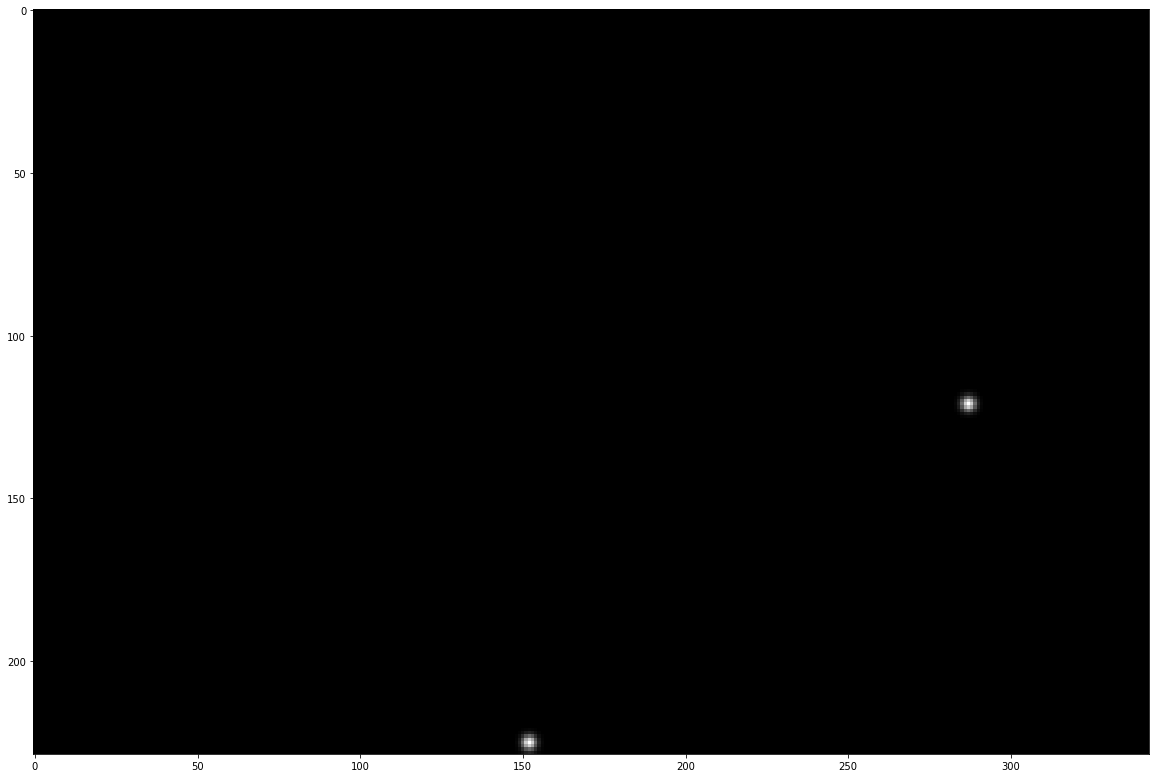

In [145]:
fig = plt.figure(figsize=(20, 30))
plt.gray()
ax = fig.add_subplot()
ax.imshow(starfield)
plt.show()
# plt.savefig('testimage.png')

In [100]:
url = 'yale_bright_star_catalog5.fits.gz'
    
t = Table.read(url)

In [119]:
print(t['HR', 'Name', 'RAJ2000'])

 HR     Name     RAJ2000  
                   deg    
---- ---------- ----------
   1                1.2912
   2                1.2658
   3  33    Psc     1.3337
   4  86    Peg     1.4250
   5                1.5667
   6                1.5792
   7  10    Cas     1.6104
   8                1.6533
   9                1.7087
  10                1.8258
 ...        ...        ...
9101                1.0821
9102                1.0846
9103   3    Cet     1.1254
9104                1.1750
9105                1.1529
9106                1.1279
9107                1.2242
9108                1.1721
9109                1.2333
9110                1.2758
Length = 9096 rows


In [90]:
a = [10, None, 5.7]

# if None in a:
#     raise ValueError("FoV requires float values for sensor_width, sensor_height, and focal_length.")
    
while True:
    try:
        x = None # int(input("Please enter a number: "))
        print(2 / x)
    except:
        print("Uh oh")
        raise

Uh oh


TypeError: unsupported operand type(s) for /: 'int' and 'NoneType'

In [113]:
import attr

@attr.s
class Camera(object):
    sensor_width: float = attr.ib(default=None)
    sensor_height: float = attr.ib(default=None)
    focal_length: float = attr.ib(default=None)
    fnumber: float = attr.ib(default=None)
    QE: np.ndarray = attr.ib(default=None)
    dark_current: np.ndarray = attr.ib(default=None)
        
    def loadQE(self, url, **kwargs) -> None:
        if self.dark_current == None:
            raise ValueError("Need dark current")
        self.QE = np.genfromtxt(url, **kwargs)
        
    @property
    def radius(self) -> float:
        if None in [self.focal_length, self.fnumber]:
            raise TypeError("non-None values required for focal_length and fnumber")
        return self.focal_length / self.fnumber / 2

        
x = Camera(focal_length=135)

x.fnumber = 1.8

# print(x.radius)



x.loadQE("stereo/data/RelativeResponse.csv", unpack = True, delimiter=',')

# print(x.QE)

ValueError: Need dark current

In [134]:
from typing import Tuple

import numpy as np
from astropy import units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.table import Table
from astropy.time import Time

from scipy.ndimage import gaussian_filter


def fov(
    sensor_width: float, sensor_height: float, focal_length: float
) -> Tuple[float, float, float]:
    """
    Calculates the horizontal, vertical, and diagonal
    field of view (FoV) of a camera given its sensor
    width and height, and the focal length of the
    camera lens.

    Parameters
    ----------
    sensor_width : float
        The width of the camera sensor (mm).
    sensor_height : float
        The height of the camera sensor (mm).
    focal_length : float
        The focal length of the camera lens (mm).
    Returns
    -------
    xfov, yfov, dfov : float
        The horizontal (x), vertical (y), and
        diagonal (d) field of view in degrees.
    """

    # set the values
    w = sensor_width
    h = sensor_height
    f = focal_length
    d = np.sqrt(w ** 2 + h ** 2)

    # calculate the FoV in radians
    xfov_rad = 2 * np.arctan2(w / 2, f)
    yfov_rad = 2 * np.arctan2(h / 2, f)
    dfov_rad = 2 * np.arctan2(d / 2, f)

    # convert them to degrees
    xfov = np.rad2deg(xfov_rad)
    yfov = np.rad2deg(yfov_rad)
    dfov = np.rad2deg(dfov_rad)

    # and return them
    return xfov, yfov, dfov


def bright_conesearch(center_coord: SkyCoord = None,
                      radius: float = None,
                      mag_limit: float = None) -> Table:
    """
    Return an astropy table of star coordinates and magnitudes
    from the Yale Bright Star Catalog. Specify a center
    sky coordinate and a radius to return the bright stars
    within a cone of the given radius from the center.
    Specify a magnitude limit to return stars whose magnitude
    are below the given limit.

    Parameters
    ----------
    center_coord : SkyCoord
        The sky coordinates of the center in a conesearch.
    radius : float
        The radius from the center_coord in a conesearch (deg).
    mag_limit : float
        The magnitude cutoff limit.

    Returns
    -------
    catalog : Table
        The catalog of bright stars. Includes only stars satisfying
        the conesearch or magnitude cutoff if they are used.
        Otherwise returns the full sky.
    """

    # get the bright star catalog
    BSC5 = 'resources/yale_bright_star_catalog5.fits.gz'
    catalog = Table.read(BSC5)

    # change column names for convenience
    catalog.rename_columns(('RAJ2000', 'DEJ2000', 'Vmag'),
                           ('ra', 'dec', 'Mag'))

    # cutoff stars above mag_limit if given
    if mag_limit is not None:
        catalog = catalog[catalog['Mag'] <= mag_limit]

    # cutoff stars beyond radius of center if given
    if radius is not None:
        # raise error if center coord not given
        if center_coord is None:
            raise ValueError(
                "Center coordinates, center_coords=SkyCoord(), "
                "must be provided if radius is given."
            )

        # get the star coords
        cat_ra = catalog['ra']
        cat_dec = catalog['dec']
        starcoords = SkyCoord(ra=cat_ra, dec=cat_dec, unit=u.deg)
        catalog['skycoord'] = starcoords

        # get the separation of stars from the center
        separations = catalog['skycoord'].separation(center_coord)
        catalog['separation'] = separations

        # get only stars within the given radius
        catalog = catalog[catalog['separation'] <= radius * u.deg]

    # return the ra, dec, mag of resulting catalog
    return catalog['ra', 'dec', 'Mag']


def radec2altaz(
    radec_table: Table,
    obs_lat: float,
    obs_lon: float,
    obs_alt: float,
    obs_time: str = None
) -> Table:
    """
    Convert the (ra, dec) coordinates in a given astropy table
    of stars with columns 'ra', 'dec', and 'Mag' to (alt, az) 
    using the observation location and time.

    Parameters
    ----------
    radec_table : Table
        The astropy table of stars with column coordinates
        'ra' and 'dec' in degrees, and magnitude column 'Mag'.
    obs_lat : float
        The latitude on Earth of the observation (deg).
    obs_lon : float
        The longitude on Earth of the observation (deg).
    obs_alt : float
        The altitude on Earth of the observation (m).
    obs_time : str
        The observation time (YYYY-MM-DDTHH:MM:SS).

    Returns
    -------
    altaz_table : astropy.table.Table
        The converted table with column coordinates 'alt' 
        and 'az' in degrees, and magnitude column 'Mag'.
    altaz : AltAz
        The alt, az frame used for the conversion.
    """

    # make the table for alt, az coords
    altaz_table = Table(radec_table, names=["alt", "az", "Mag"], copy=True)
    
    # get the observation location and time
    loc = EarthLocation(lat=obs_lat * u.deg, lon=obs_lon * u.deg, height=obs_alt * u.m)
    time = Time(obs_time)

    # define the AltAz frame
    altaz = AltAz(location=loc, obstime=time)

    # get skycoords for ra,dec transformed to alt,az
    rd2aa = SkyCoord(
        ra=radec_table["ra"], dec=radec_table["dec"], obstime=obs_time, unit=u.deg
    ).transform_to(altaz)

    # set table values to the transformed coords
    altaz_table["alt"] = rd2aa.alt.value * rd2aa.alt.unit
    altaz_table["az"] = rd2aa.az.value * rd2aa.az.unit

    # return result
    return altaz_table, altaz


def map_stars(
    altaz_stars : Table,
        altaz_center : SkyCoord,
        xfov : float,
        yfov : float,
    width: int,
    height: int,
) -> np.ndarray:
    """
    Map the (alt, az) positions of stars onto pixels of a frame
    with dimensions (height, width) centered at altaz_center.

    Parameters
    ----------
    altaz_stars : Table
        Astropy table of stars with at least columns 'alt' and 'az' in degrees.
    altaz_center : SkyCoord
        The sky coordinates in (alt, az) of the center of the framewhich to map the stars onto.
    xfov : float
        The horizontal field of view in degrees.
    yfov : float
        The vertical field of view in degrees.
    width : int
        The pixel width of the frame which to map the stars onto.
    height : int
        The pixel height of the frame which to map the stars onto.

    Returns
    -------
    mapped_stars : ndarray
        An ndarray with dimensions (height, width) with pixels
        equal to 1 if a star is located there.
    """

    global x 
    x = altaz_stars
    
    # get the center coordinate values
    center_alt = altaz_center.alt.value
    center_az = altaz_center.az.value
    
    # define the frame boundaries x=az, y=alt
    alt_lo = center_alt - (yfov / 2)
    alt_hi = center_alt + (yfov / 2)
    az_lo = center_az - (xfov / 2)
    az_hi = center_az + (xfov / 2)

    # get the alt, az arrays of the stars
    alt1 = altaz_stars["alt"]
    az1 = altaz_stars["az"]

    # remove any stars outside the boundaries
    alt_bound = np.logical_and(alt1 >= alt_lo, alt1 <= alt_hi)
    az_bound = np.logical_and(az1 >= az_lo, az1 <= az_hi)
    bound = np.logical_and(alt_bound, az_bound)
    stars = altaz_stars[bound]

    # get the alt, az of the remaining stars
    alt = stars["alt"]
    az = stars["az"]

    # create an empty frame
    frame = np.zeros((height, width))

    # get the span of alt, az positions
    azspan = az_hi - az_lo
    altspan = alt_hi - alt_lo

    # get the mapping scale
    azscale = (az - az_lo) / azspan
    altscale = (alt - alt_lo) / altspan

    # map the positions to the frame indices
    azind = np.round_(azscale * (width - 1)).astype(int)
    altind = np.round_(altscale * (height - 1)).astype(int)

    # set pixel values of alt, az in the frame to 1
    frame[altind, azind] = 1

    # and return the frame
    return frame


def generate_starfield(
        center_radec: SkyCoord,
        cam_params : dict,
        obs_params : dict,
        mag_limit: float = 7,
        psf_sigma: float = 1
) -> np.ndarray:
    """
    Generate a star field centered around center_coord 
    (ra,dec) using camera parameters and observation parameters.
    A cutoff magnitude can be specified if desired. Stars follow
    a Gaussian Point Spread Function with a specified standard
    deviation.

    Parameters
    ----------
    center_radec : SkyCoord
        The (ra, dec) sky coordinates of the center of the frame.
    cam_params : Dict[str, float]
        Camera parameters 'sensor_width' (mm), 'sensor_height' (mm), and 'focal_length' (mm).
    obs_params : Dict[str, float]
        Observation parameters 'lat' (deg), 'lon' (deg), 'alt' (deg), and 'time' (str).
    mag_limit : float
        All stars used will be of magnitude less than this.
    psf_sigma : float
        The size/standard deviation of the Guassian Point Spread Function.

    Returns
    -------
    starfield : ndarray
        The array of pixel values making up the star field.
    """

    # calculate the field of view
    xfov, yfov, dfov = fov(**cam_params)

    # generate a table of bright stars within fov
    radius = 35 #dfov / 2
    stars_radec = bright_conesearch(center_radec, radius, mag_limit)

    # convert the star coordinates to alt, az
    stars_altaz, altaz = radec2altaz(stars_radec, **obs_params)

    # get the center alt, az
    center_altaz = center_radec.transform_to(altaz)

    # map the remaining stars to a frame
    width = cam_params['sensor_width']
    height = cam_params['sensor_height']
    starframe = map_stars(stars_altaz, center_altaz, xfov, yfov, width, height)

    # apply a Gaussian PSF
    starfield = gaussian_filter(starframe, sigma=psf_sigma)

       # plot the starfield                                                 
    fig, ax = plt.subplots()
    plt.gray()
    ax.imshow(starfield)

    # and return the starfield                                           
    return starfield, fig



In [135]:
stars = bright_conesearch()

stars['Mag'] = [i for i in range(len(stars['Mag']))]

print(stars)

    ra        dec    Mag 
   deg        deg        
---------- --------- ----
    1.2912   45.2292    0
    1.2658   -0.5031    1
    1.3337   -5.7075    2
    1.4250   13.3961    3
    1.5667   58.4367    4
    1.5792  -49.0750    5
    1.6104   64.1961    6
    1.6533   29.0214    7
    1.7087  -23.1075    8
    1.8258  -17.3864    9
       ...       ...  ...
    1.0821  -16.5289 9086
    1.0846  -29.2686 9087
    1.1254  -10.5094 9088
    1.1750   67.1667 9089
    1.1529   42.0922 9090
    1.1279  -72.8978 9091
    1.2242   34.6597 9092
    1.1721  -71.4369 9093
    1.2333   26.6489 9094
    1.2758   61.3142 9095
Length = 9096 rows


In [23]:
# camera
pix = 2.4e-3 #mm/pix
sensor_width = 5496 #pix
sensor_height = 3672 #pix
focal_length = 135 #mm
cam_params = {
    'sensor_width' : sensor_width,
    'sensor_height' : sensor_height,
    'focal_length' : focal_length / pix
}

# observation
event0 = {
    'index'         : 27,
    'number'        : 88992443,
    'date'          : '2016-12-26 22:38:52',
    'source-coord'  : np.array([-85.676, 159.113, 2569]), #lat, lon, alt
    'ANITA-coord'   : np.array([-85.7, 141.7, 39277]), #lat, lon, alt
    'elevation-ang' : -14.823,
    'azimuth-ang'   : 95.834,
    'polarity'      : 1
     }

ra = 42
dec = 69
center_radec = SkyCoord(ra=ra, dec=dec, unit=u.deg)
obs_params = {
    'obs_lat' : event0['ANITA-coord'][0],
    'obs_lon' : event0['ANITA-coord'][1],
    'obs_alt' : event0['ANITA-coord'][2],
    'obs_time' : event0['date']
}

mag_limit = 7
psf_sigma = 5

<IPython.core.display.Javascript object>


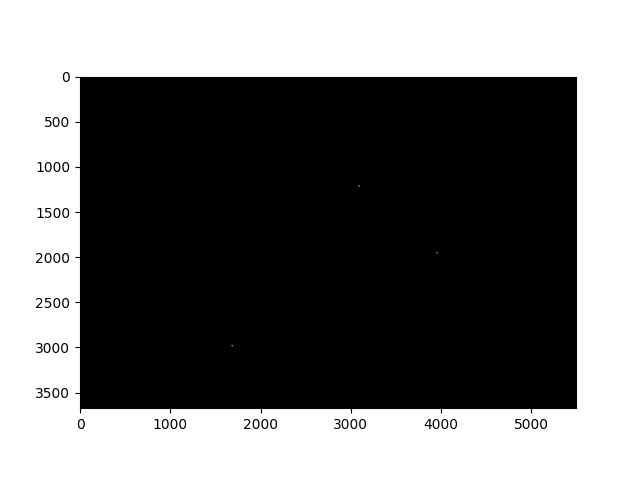

In [28]:
starfield = generate_starfield(center_radec, cam_params, obs_params, mag_limit, psf_sigma)[0]

# print(starfield)

# plt.show()

<IPython.core.display.Javascript object>


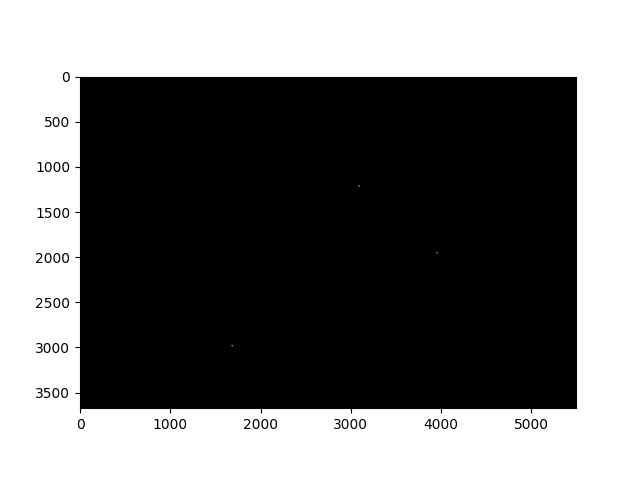

In [126]:
starfield = generate_starfield(center_radec, cam_params, obs_params, mag_limit, psf_sigma)[0]

In [133]:
x = np.array([[1, 2, 3, 4, 5, 6], [1, 10, 100, 1000, 10000, 100000]])
print(np.interp(2.5, *x))
# print(*x)

55.0


In [298]:
import matplotlib.colors.LogNorm

ModuleNotFoundError: No module named 'matplotlib.colors.LogNorm'; 'matplotlib.colors' is not a package

In [3]:
from typing import Tuple

import numpy as np
from astropy import units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.table import Table
from astropy.time import Time
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter
from scipy.integrate import simps
import attr
import os

@attr.s
class Camera(object):
    """
    Camera parameters used for star trackers. Includes information
    on both the CCD and the lens.

    Attributes
    ----------
    sensor_pixwidth : int
        The CCD width in pixels.
    sensor_pixheight : int
        The CCD height in pixels.
    pix_size : float
        The size of CCD pixels in mm/pix.
    focal_length : float
        The lens focal length in mm.
    fnumber : float
        The lens f-number.
    avg_noise : float
        The average noise of the CCD. Default = 0.
    temp : float
        The temperature of the CCD in celsius. Default = 20.
    exp_time : float
        The exposure time in seconds. Default = 1.
    max_ct : int
        The maximum well depth of the CCD in counts. Default = 15000.
    QE : ndarray
        The response vs wavelength (nm) of the CCD
        quantum efficiency.
    dark_current : ndarray
        The dark current (e/s) vs temperature (C) of the CCD.

    Properties
    ----------
    radius : float
        The first order radius of the lens aperture.
    fov : Tuple[float, float, float]
        The horizontal, vertical, and diagonal fields of view.

    Methods
    -------
    loadQE(path, **kwargs)
        Load QE data into the QE attribute using np.genfromtxt.
    loadDark(path, **kwargs)
        Load dark current data into the dark_current attribute
        using np.genfromtxt.
    """

    sensor_pixwidth: int = attr.ib(default=None)
    sensor_pixheight: int = attr.ib(default=None)
    pix_size: float = attr.ib(default=None)
    focal_length: float = attr.ib(default=None)
    fnumber: float = attr.ib(default=None)
    avg_noise: float = attr.ib(default=0.)
    temp: float = attr.ib(default=20.)
    exp_time: float = attr.ib(default=1.)
    max_ct: int = attr.ib(default=15000)
    QE: np.ndarray = attr.ib(default=None)
    dark_current: np.ndarray = attr.ib(default=None)

    @property
    def radius(self) -> float:
        """Returns the aperture radius."""
        if None in [self.focal_length, self.fnumber]:
            raise TypeError("non-None values required for focal_length and fnumber")
        try:
            return self._radius
        except AttributeError:
            print("Had the error...")
            radius = self.focal_length / self.fnumber / 2
            self._radius = radius
            return radius

    @property
    def fov(self) -> Tuple[float, float, float]:
        """
        Returns the horizontal, vertical, and diagonal
        field of view (FoV) in degrees.
        """
        # set the values
        w = self.sensor_pixwidth
        h = self.sensor_pixheight
        f = self.focal_length
        pix = self.pix_size
        if None in [w, h, f, pix]:
            raise TypeError("non-None values required for sensor_pixwidth, sensor_pixheight, focal_length, and pix_size")
        f = f / pix
        d = np.sqrt(w ** 2 + h ** 2)

        # calculate the FoV in radians
        xfov_rad = 2 * np.arctan2(w / 2, f)
        yfov_rad = 2 * np.arctan2(h / 2, f)
        dfov_rad = 2 * np.arctan2(d / 2, f)

        # convert them to degrees
        xfov = np.rad2deg(xfov_rad)
        yfov = np.rad2deg(yfov_rad)
        dfov = np.rad2deg(dfov_rad)

        # and return them
        return xfov, yfov, dfov

    def loadQE(self, path, **kwargs) -> None:
        """
        Load data into QE.

        Parameters
        ----------
        path: str
            The data path.
        **kwargs
            Pass kwargs into numpy.genfromtxt.
        """
        self.QE = np.genfromtxt(path, **kwargs)

    def loadDark(self, path, **kwargs) -> None:
        """
        Load data into dark_current.

        Parameters
        ----------
        path: str
            The data path.
        **kwargs
            Pass kwargs into numpy.genfromtxt.
        """
        self.dark_current = np.genfromtxt(path, **kwargs)


@attr.s
class Observation(object):
    """
    The parameters describing an observation location and time.

    Attributes
    ----------
    lat : float
        The latitude in degrees.
    lon : float
        The longitude in degrees.
    alt : float
        The altitude in meters.
    time : str
        The time of observation in any astropy acceptable time formats.

    Properties
    ----------
    altaz_frame : astropy.coordinates.AltAz
        The frame needed to transform ra, dec to alt, az.
    """

    lat: float = attr.ib()
    lon: float = attr.ib()
    alt: float = attr.ib()
    time: Time = attr.ib(default=Time('2000-01-01 00:00:00', format='iso'))

    @property
    def altaz_frame(self):
        """"Returns the frame for transforming ra,dec to alt,az."""
        loc = EarthLocation(lat=self.lat * u.deg, lon=self.lon * u.deg, height=self.alt * u.m)
        time = Time(self.time)
        return AltAz(location=loc, obstime=time)
    

@attr.s
class Image(object):
    """
    An image class containing at least a table of stars
    and a sky center, and capable of image generation of stars 
    using Camera and Observation objects.

    Attributes
    ----------
    stars : astropy.table.Table
        The table of stars 'ra', 'dec', and 'Mag'.
    center : astropy.coordinates.SkyCoord
        The sky coordinates of the center of the image.
    observation : Observation
        The Observation object.
    cam : Camera
        The Camera object.
    psf_sigma : float
        The standard deviation of the Gaussian PSF in pixels. Default = 2.

    Properties
    ----------
    size : Tuple[int, int]
        The size of the image frame in pixels.
    altaz_stars : astropy.table.Table
        The table of stars 'alt', 'az', 'Mag'.
    image_data : numpy.ndarray
        The ndarray of a pixel grid containing pixel values
        corresponding to the location and magnitudes of the stars.

    Methods
    -------
    mag2pix(coords) : astropy.table.Table
        Returns the stars table (of either ra,dec or alt,az)
        with magnitude values converted to total pixel counts.
    plot(**kwargs)
        Plots the image data.
    """

    stars: Table = attr.ib()
    center: SkyCoord = attr.ib()
    observation: Observation = attr.ib(default=None)
    cam: Camera = attr.ib(default=None)
    psf_sigma: float = attr.ib(default=2)

    @property
    def size(self):
        if cam == None:
            raise ValueError("cam required to determine image size")
        return (self.cam.sensor_pixheight, self.cam.sensor_pixwidth)
    
    @property
    def altaz_stars(self):
        """
        Convert the (ra, dec) coordinates in a given astropy table
        of stars with columns 'ra', 'dec', and 'Mag' to (alt, az)
        using the observation location and time.

        Returns
        -------
        altaz_table : astropy.table.Table
            The converted table with column coordinates 'alt'
            and 'az' in degrees, and magnitude column 'Mag'.
        """

        if self.observation == None:
            raise ValueError("observation object required for alt/az conversion")

        # make the table for alt, az coords
        altaz_table = Table(self.stars, names=["alt", "az", "Mag"], copy=True)

        # get skycoords for ra,dec transformed to alt,az
        obs_time = observation.time
        rd2aa = SkyCoord(
            ra=radec_table["ra"], dec=radec_table["dec"], obstime=obs_time, unit=u.deg
        ).transform_to(observation.altaz_frame)

        # set table values to the transformed coords
        altaz_table["alt"] = rd2aa.alt.value * rd2aa.alt.unit
        altaz_table["az"] = rd2aa.az.value * rd2aa.az.unit

        # return result
        return altaz_table

@attr.s
class Image(object):
    """
    An image class containing at least a table of stars
    and a sky center, and capable of image generation of stars 
    using Camera and Observation objects.

    Attributes
    ----------
    stars : astropy.table.Table
        The table of stars 'ra', 'dec', and 'Mag'.
    center : astropy.coordinates.SkyCoord
        The sky coordinates of the center of the image.
    observation : Observation
        The Observation object.
    cam : Camera
        The Camera object.
    psf_sigma : float
        The standard deviation of the Gaussian PSF in pixels. Default = 2.

    Properties
    ----------
    size : Tuple[int, int]
        The size of the image frame in pixels.
    altaz_stars : astropy.table.Table
        The table of stars 'alt', 'az', 'Mag'.
    image_data : numpy.ndarray
        The ndarray of a pixel grid containing pixel values
        corresponding to the location and magnitudes of the stars.

    Methods
    -------
    mag2pix(coords) : astropy.table.Table
        Returns the stars table (of either ra,dec or alt,az)
        with magnitude values converted to total pixel counts.
    plot(**kwargs)
        Plots the image data.
    """

    stars: Table = attr.ib()
    center: SkyCoord = attr.ib()
    observation: Observation = attr.ib(default=None)
    cam: Camera = attr.ib(default=None)
    psf_sigma: float = attr.ib(default=2)

    @property
    def size(self):
        if self.cam == None:
            raise ValueError("Camera object required to determine image size")
        return (self.cam.sensor_pixheight, self.cam.sensor_pixwidth)
    
    @property
    def altaz_stars(self):
        """
        Convert the (ra, dec) coordinates in a given astropy table
        of stars with columns 'ra', 'dec', and 'Mag' to (alt, az)
        using the observation location and time.

        Returns
        -------
        altaz_table : astropy.table.Table
            The converted table with column coordinates 'alt'
            and 'az' in degrees, and magnitude column 'Mag'.
        """

        if self.observation == None:
            raise ValueError("Observation object required for alt/az conversion")

        # make the table for alt, az coords
        altaz_table = Table(self.stars, names=["alt", "az", "Mag"], copy=True)

        # get skycoords for ra,dec transformed to alt,az
        obs_time = self.observation.time
        rd2aa = SkyCoord(
            ra=self.stars["ra"], dec=self.stars["dec"], obstime=obs_time, unit=u.deg
        ).transform_to(self.observation.altaz_frame)

        # set table values to the transformed coords
        altaz_table["alt"] = rd2aa.alt.value * rd2aa.alt.unit
        altaz_table["az"] = rd2aa.az.value * rd2aa.az.unit

        # return result
        return altaz_table

    @property
    def image(self) -> np.ndarray:
        """
        Returns the ndarray containing pixel values corresponding to
        positions and magnitudes in self.stars with a Gaussian PSF.

        Returns
        -------
        image_data : ndarray
            An ndarray with dimensions of CCD with pixels
            equal to the total pixel flux where a star is located.
        """

        # ensure cam and observation are not None
        if None in [self.cam, self.observation]:
            raise ValueError("Camera and Observation objects required for image")
        
        altaz_center = self.center.transform_to(self.observation.altaz_frame)
        center_alt = altaz_center.alt.value
        center_az = altaz_center.az.value

        # define the frame boundaries x=az, y=alt
        xfov, yfov, _ = self.cam.fov
        alt_lo = center_alt - (yfov / 2)
        alt_hi = center_alt + (yfov / 2)
        az_lo = center_az - (xfov / 2)
        az_hi = center_az + (xfov / 2)

        star_table = self.mag2pix('altaz')
        alt1 = star_table["alt"]
        az1 = star_table["az"]
        
        # remove any stars outside the boundaries
        alt_bound = np.logical_and(alt1 >= alt_lo, alt1 <= alt_hi)
        az_bound = np.logical_and(az1 >= az_lo, az1 <= az_hi)
        bound = np.logical_and(alt_bound, az_bound)
        stars = star_table[bound]
        
        alt = stars['alt']
        az = stars['az']
        ct = stars['Total Counts']

        height, width = self.size
        image_data = np.zeros((height, width))

        # get the span of alt, az positions
        azspan = az_hi - az_lo
        altspan = alt_hi - alt_lo

        # get the mapping scale
        azscale = (az - az_lo) / azspan
        altscale = (alt - alt_lo) / altspan

        # map the positions to the frame indices
        azind = np.round_(azscale * (width - 1)).astype(int)
        altind = np.round_(altscale * (height - 1)).astype(int)

        # set pixel values
        for i in zip(altind, azind, ct):
            image_data[i[0], i[1]] = i[2]

        # apply Gaussian PSF
        image_data = gaussian_filter(image_data, sigma=self.psf_sigma)

        # add noise and dark current
        image_data += np.random.poisson(self.cam.avg_noise, size=self.size)
        noise_level = np.interp(self.cam.temp, *self.cam.dark_current)
        image_data += np.random.lognormal(noise_level*self.cam.exp_time, size=self.size)

        image_data = np.clip(image_data, 0, self.cam.max_ct)
        
        # and return the image
        return image_data

    def mag2pix(self, coords: str = 'radec') -> Table:
        """
        Returns the stars table with magnitudes converted to total pixel counts.

        Parameters
        ----------
        coords : {'radec', 'altaz'}
            Determines which star table to use. Default = 'radec'.

        Returns
        -------
        stars : Table
            The table containing pixel values corresponding to the magnitudes.
        """

        # get the desired star table
        if coords == 'radec':
            stars = Table(self.stars, copy=True)
        elif coords == 'altaz':
            stars = Table(self.altaz_stars, copy=True)
        else:
            raise ValueError("mag2pix must take 'radec' or 'altaz' as coords argument")
        
        # quantify the magnitudes
        mag = np.array(stars['Mag'])
        mag_val = mag * u.STmag

        # convert magnitudes to flux
        flux = mag_val.to(u.photon/u.s/u.cm**2/u.nm, u.spectral_density(550*u.nm))

        # get the total QE response
        QE = self.cam.QE
        if QE is not None:
            response = simps(QE[1], QE[0]) * u.nm / u.photon
        else:
            response = 600 * u.nm / u.photon  #100% from 400nm to 1000nm
            
        aper_area = np.pi * (self.cam.radius * 0.1)**2

        # calculate the pixel counts
        pixel_cts = flux * self.cam.exp_time * aper_area * response

        # replace the magnitudes with pixel values
        stars['Mag'] = pixel_cts
        stars.rename_column('Mag', 'Total Counts')

        # and return the table
        return stars

    def plot(self) -> None:
        """Plot the image data."""
        fig, ax = plt.subplots(figsize=[20,15])
        plt.gray()
        ax.imshow(self.image, norm=LogNorm(vmin=0.01, vmax=1))


def bright_conesearch(
    center_coord: SkyCoord = None, radius: float = None, mag_limit: float = None
) -> Table:
    """
    Return an astropy table of star coordinates and magnitudes
    from the Yale Bright Star Catalog. Specify a center
    sky coordinate and a radius to return the bright stars
    within a cone of the given radius from the center.
    Specify a magnitude limit to return stars whose magnitude
    are below the given limit.

    Parameters
    ----------
    center_coord : SkyCoord
        The sky coordinates of the center in a conesearch.
    radius : float
        The radius from the center_coord in a conesearch (deg).
    mag_limit : float
        The magnitude cutoff limit.

    Returns
    -------
    catalog : Table
        The catalog of bright stars. Includes only stars satisfying
        the conesearch or magnitude cutoff if they are used.
        Otherwise returns the full sky.
    """

    # get the bright star catalog
    BSC5 = "resources/yale_bright_star_catalog5.fits.gz"
    catalog = Table.read(BSC5)

    # change column names for convenience
    catalog.rename_columns(("RAJ2000", "DEJ2000", "Vmag"), ("ra", "dec", "Mag"))

    # cutoff stars above mag_limit if given
    if mag_limit is not None:
        catalog = catalog[catalog["Mag"] <= mag_limit]

    # cutoff stars beyond radius of center if given
    if radius is not None:
        # raise error if center coord not given
        if center_coord is None:
            raise ValueError(
                "Center coordinates, center_coords=SkyCoord(), "
                "must be provided if radius is given."
            )

        # get the star coords
        cat_ra = catalog["ra"]
        cat_dec = catalog["dec"]
        starcoords = SkyCoord(ra=cat_ra, dec=cat_dec, unit=u.deg)
        catalog["skycoord"] = starcoords

        # get the separation of stars from the center
        separations = catalog["skycoord"].separation(center_coord)
        catalog["separation"] = separations

        # get only stars within the given radius
        catalog = catalog[catalog["separation"] <= radius * u.deg]

    # return the ra, dec, mag of resulting catalog
    return catalog["ra", "dec", "Mag"]


def generate_starfield(
    center_radec: SkyCoord,
    cam: Camera,
    obs: Observation,
    mag_limit: float = 7,
    psf_sigma: float = 5,
) -> np.ndarray:
    """
    Generate a star field centered around center_coord
    (ra,dec) using camera parameters and observation parameters.
    A cutoff magnitude can be specified if desired. Stars follow
    a Gaussian Point Spread Function with a specified standard
    deviation in pixels.

    Parameters
    ----------
    center_radec : SkyCoord
        The ra,dec sky coordinates of the center of the frame.
    cam : Camera
        Camera onject describing the camera properties.
    obs : Observation
        Observation object describing location and time of observation.
    mag_limit : float
        All stars used will be of magnitude less than this.
    psf_sigma : float
        The size/standard deviation of the Guassian Point Spread Function.

    Returns
    -------
    starfield : Image
        The Image object containing the star field data.
    """

    # calculate the field of view
    xfov, yfov, dfov = cam.fov

    # generate a table of bright stars within fov
    radius = dfov / 2
    stars_radec = bright_conesearch(center_radec, radius, mag_limit)

    # construct the image
    starfield = Image(stars=stars_radec,
                      center=center_radec,
                      observation=obs,
                      cam=cam,
                      psf_sigma=psf_sigma)
    
    # and return the starfield
    return starfield

In [4]:
# camera
sensor_width = 5496 #pix
sensor_height = 3672 #pix
pix = 2.4e-3 #mm/pix
focal_length = 135 #mm
fnumber = 1.8
avg_noise = 1.6
temp = 20
exp_time = 1
max_ct = 15000
cam = Camera(sensor_width,
             sensor_height,
             pix,
             focal_length,
             fnumber,
             avg_noise,
             temp,
             exp_time,
             max_ct
            )
cam.loadQE('stereo/data/ASISigma_QE.csv', unpack=True, delimiter=',')
cam.loadDark('stereo/data/ASISigma_current.csv', unpack=True, delimiter=',')

# observation
event0 = {
    'index'         : 27,
    'number'        : 88992443,
    'date'          : '2016-12-26 22:38:52',
    'source-coord'  : np.array([-85.676, 159.113, 2569]), #lat, lon, alt
    'ANITA-coord'   : np.array([-85.7, 141.7, 39277]), #lat, lon, alt
    'alt-ang'       : -14.823,
    'azimuth-ang'   : 95.834,
    'polarity'      : 1
     }

lat = event0['ANITA-coord'][0]
lon = event0['ANITA-coord'][1]
alt = event0['ANITA-coord'][2]
time = event0['date']
obs = Observation(lat, lon, alt, time)
altaz = obs.altaz_frame

# center
cen_alt = 45 #degrees
cen_az = 0 # degrees
# center_radec = SkyCoord(ra=84.0500, dec=-1.2019, unit=u.deg) # Orion
center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs')

# others
mag_limit = 7
psf_sigma = 2

In [294]:
%%timeit

data = image.image

3.5 s ± 91.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

In [288]:
print(cam._radius)

# print(cam.radius)

37.5


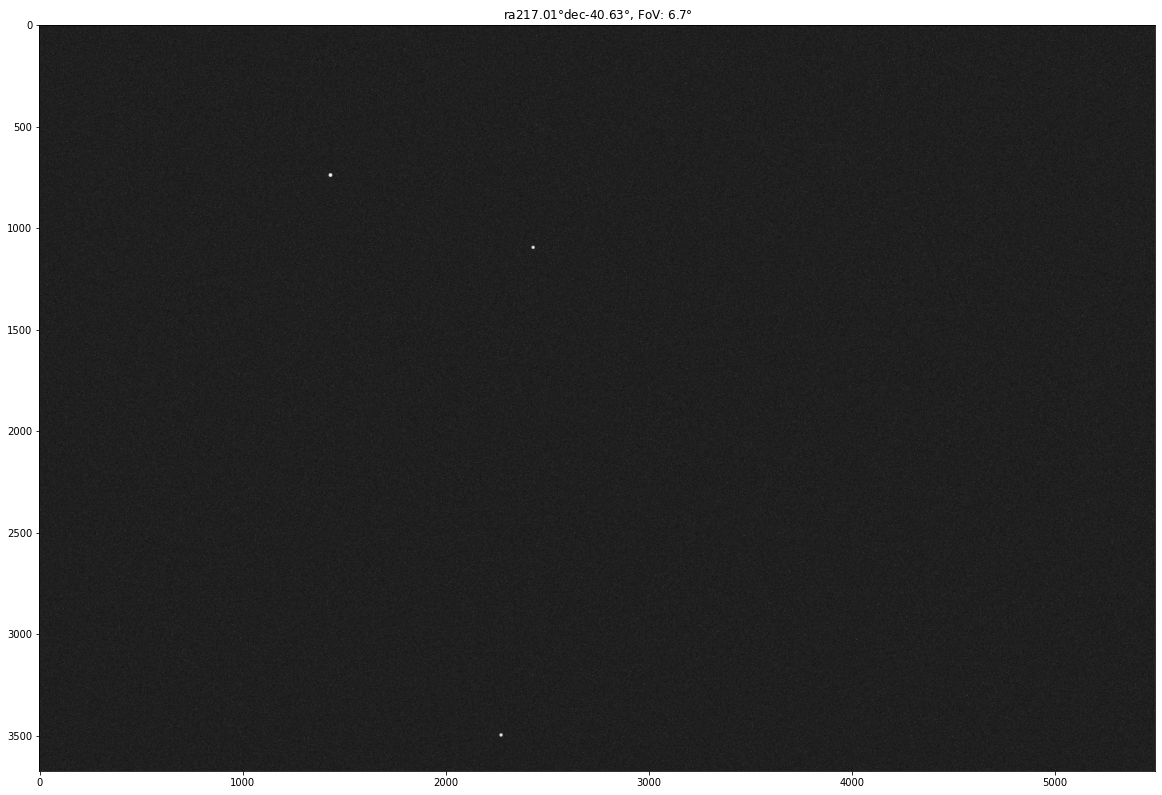

In [261]:
fig, ax = plt.subplots(figsize=[20,15])
plt.gray()
plt.title("ra{0:.2f}$\degree$dec{1:.2f}$\degree$, FoV: {2:.1f}$\degree$".format(image.center.ra.value, image.center.dec.value, image.cam.fov[2]))
ax.imshow(image.image, norm=LogNorm(vmin=1, vmax=15000))

# plt.savefig("orion45deg.png")

In [254]:
print(image.cam.fov)

(5.593732368581557, 3.7389410789048254, 6.724966961894192)


In [48]:
x = image.stars['ra'] + 142
x = x % 360

print(image.stars['ra'])
print(x)

    ra    
   deg    
----------
  213.6775
  215.0404
  215.1392
  215.7592
  216.5558
  216.7079
  217.7354
  217.7950
  218.5333
  218.8812
  218.8767
  219.1008
  219.1842
  219.5817
    ra    
   deg    
----------
  355.6775
  357.0404
  357.1392
  357.7592
  358.5558
  358.7079
  359.7354
  359.7950
    0.5333
    0.8812
    0.8767
    1.1008
    1.1842
    1.5817


In [38]:
import decimal

b = float(decimal.Decimal(str(367.11111111)) % decimal.Decimal(str(360)))
a = 355. % 360
c = 5. % 360

print(b)

# print(np.logical_and(a < c, c < b) if (a < b) else np.logical_and(b < c, c < a))

7.11111111


In [46]:
x = np.array([0, 1, 1, 0, 1, 0], dtype=bool)

print(NOT(x))

[ True False False  True False  True]


In [45]:
from numpy import logical_and as AND, logical_not as NOT
print(NOT(AND(1,0)))

True


In [55]:
print(x)

    ra    
   deg    
----------
  355.6775
  357.0404
  357.1392
  357.7592
  358.5558
  358.7079
  359.7354
  359.7950
    0.5333
    0.8812
    0.8767
    1.1008
    1.1842
    1.5817


In [64]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import lognorm

In [74]:
%%timeit

np.random.poisson(1.6, size=(2000, 1000))

125 ms ± 795 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
%%timeit

poisson.rvs(1.6, size=(2000, 1000))

137 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [72]:
%%timeit

np.random.lognormal(5, size=(2000, 1000))

128 ms ± 669 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
%%timeit

lognorm.rvs(5, size=(2000, 1000))

129 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [78]:
import tetra3

In [76]:
from tetra3 import Tetra3

In [81]:
t3 = Tetra3()
t3.generate_database(max_fov = 7)

2020-07-28 11:51:46,719:tetra3.Tetra3-INFO: Loaded 8404 stars from catalogue.
2020-07-28 11:58:21,471:tetra3.Tetra3-INFO: With maximum 10 per FOV and no doubles: 7568.
2020-07-28 11:58:21,473:tetra3.Tetra3-INFO: With maximum 20 per FOV and no doubles: 8237.
2020-07-28 11:58:21,584:tetra3.Tetra3-INFO: Generating all possible patterns.
2020-07-28 12:04:16,639:tetra3.Tetra3-INFO: Found 2403901 patterns. Building catalogue.
2020-07-28 12:09:24,038:tetra3.Tetra3-INFO: Finished generating database.


In [82]:
t3.load_database('default_databl')

2020-07-28 12:11:43,334:tetra3.Tetra3-INFO: Loading database from: /home/zackashm/work/tetra3/default_databl.npz


FileNotFoundError: [Errno 2] No such file or directory: '/home/zackashm/work/tetra3/default_databl.npz'

In [92]:
print(np.amax(image.stars['Mag']))

6.6


In [93]:
import os

In [94]:
os.path.abspath(__file__)

NameError: name '__file__' is not defined

In [147]:
@attr.s
class Image(object):
    """
    An image class containing at least a table of stars
    and a sky center, and capable of image generation of stars
    using Camera and Observation objects.

    Attributes
    ----------
    stars : astropy.table.Table
        The table of stars 'ra', 'dec', and 'Mag'. Not necessarily the
        stars shown within the image.
    center : astropy.coordinates.SkyCoord
        The sky coordinates of the center of the image.
    observation : Observation
        The Observation object.
    cam : Camera
        The Camera object.
    mag_limit : float
        The most dim magnitude cutoff. Default = max magnitude in stars['Mag'].
    psf_sigma : float
        The standard deviation of the Gaussian PSF in pixels. Default = 2.

    Properties
    ----------
    size : Tuple[int, int]
        The size of the image frame in pixels.
    altaz_stars : astropy.table.Table
        The table of stars 'alt', 'az', 'Mag'.
    image_bounds : Dict[str, Tuple[float, float]]
        The alt, az bounds of the image.
    image_stars : astropy.table.Table
        The table of stars 'alt', 'az', 'Mag' shown in the image.
    image : numpy.ndarray
        The ndarray of a pixel grid containing pixel values
        corresponding to the location and magnitudes of the stars.

    Methods
    -------
    mag2pix(table: Table) : astropy.table.Table
        Returns the ra, dec stars table or a given table
        with magnitude values converted to total pixel counts.
    plot()
        Minimally plots the image data.
    """

    stars: Table = attr.ib()
    center: SkyCoord = attr.ib()
    observation: Observation = attr.ib(default=None)
    cam: Camera = attr.ib(default=None)
    mag_limit: float = attr.ib()
    psf_sigma: float = attr.ib(default=2)
        
    @mag_limit.default
    def mag_limit_default(self):
        return np.amax(self.stars['Mag'])

    @property
    def size(self) -> Tuple[int, int]:
        """Returns the pixel dimensions of the CCD."""
        try:
            return self._size  # type: ignore
        except AttributeError:
            if self.cam is None:
                raise ValueError("Camera object required to determine image size")
            size = (self.cam.sensor_pixheight, self.cam.sensor_pixwidth)
            self._size = size
            return size

    @property
    def altaz_stars(self) -> Table:
        """
        Convert the (ra, dec) coordinates in a given astropy table
        of stars with columns 'ra', 'dec', and 'Mag' to (alt, az)
        using the observation location and time.

        Returns
        -------
        altaz_table : astropy.table.Table
            The converted table with column coordinates 'alt'
            and 'az' in degrees, and magnitude column 'Mag'.

        Raises
        ------
        ValueError
            If Observation object attribute is not set.
        """

        try:
            return self._altaz_stars  # type: ignore
        except AttributeError:
            if self.observation is None:
                raise ValueError("Observation object required for alt/az conversion")

            # make the table for alt, az coords
            altaz_table = Table(self.stars, names=["alt", "az", "Mag"], copy=True)

            # get skycoords for ra,dec transformed to alt,az
            obs_time = self.observation.time
            rd2aa = SkyCoord(
                ra=self.stars["ra"], dec=self.stars["dec"], obstime=obs_time, unit=u.deg
            ).transform_to(self.observation.altaz_frame)

            # set table values to the transformed coords
            altaz_table["alt"] = rd2aa.alt.value * rd2aa.alt.unit
            altaz_table["az"] = rd2aa.az.value * rd2aa.az.unit

            # return result
            self._altaz_stars = altaz_table
            return altaz_table

    @property
    def image_bounds(self) -> Dict[str, Tuple[float, float]]:
        """
        Returns the alt, az bounds of the image.

        Returns
        -------
        bounds : Dict[str, Tuple[float, float]]
            The dictionary containing the 'alt' and 'az' bounds as (lower, upper)
            tuples.

        Raises
        ------
        ValueError
            If Camera or Observation object attributions are not set.
        """
        try:
            return self._image_bounds  # type: ignore
        except AttributeError:
            if None in [self.cam, self.observation]:
                raise ValueError(
                    "Camera and Observation objects required to"
                    + " determine image bounds"
                )

            # use alt, az stars
            altaz_center = self.center.transform_to(self.observation.altaz_frame)
            center_alt = altaz_center.alt.value
            center_az = altaz_center.az.value

            # define the frame boundaries x=az, y=alt
            xfov, yfov, _ = self.cam.fov
            alt_lo = center_alt - (yfov / 2)
            alt_hi = center_alt + (yfov / 2)
            az_lo = center_az - (xfov / 2)
            az_hi = center_az + (xfov / 2)

            bounds = {"alt": (alt_lo, alt_hi), "az": (az_lo, az_hi)}

            # return the boundaries
            self._image_bounds = bounds
            return bounds

    @property
    def image_stars(self) -> Table:
        """Returns the 'alt', 'az', and 'Mag' table of stars shown in the image."""
        try:
            return self._image_stars  # type: ignore
        except AttributeError:

            # get alt, az and bounds
            star_table = Table(self.altaz_stars, copy=True)

            alt = star_table["alt"]
            az = star_table["az"]

            alt_lo, alt_hi = self.image_bounds["alt"]
            az_lo, az_hi = self.image_bounds["az"]

            # circles means modulo 360
            alt_lo = alt_lo % 360
            alt_hi = alt_hi % 360
            az_lo = az_lo % 360
            az_hi = az_hi % 360
            alt = alt % 360
            az = az % 360

            # determine boolean bounds
            if alt_lo < alt_hi:
                alt_bound = AND(alt_lo <= alt, alt <= alt_hi)
            else:
                alt_bound = NOT(AND(alt_hi <= alt, alt <= alt_lo))

            if az_lo < az_hi:
                az_bound = AND(az_lo <= az, az <= az_hi)
            else:
                az_bound = NOT(AND(az_hi <= az, az <= az_lo))

            # remove stars outside the bounds
            bound = np.logical_and(alt_bound, az_bound)
            stars = star_table[bound]

            # and return them
            self._image_stars = stars
            return stars

    @property
    def image(self) -> np.ndarray:
        """
        Returns the ndarray containing pixel values corresponding to
        positions and magnitudes in self.stars with a Gaussian PSF.

        Returns
        -------
        image_data : ndarray
            An ndarray with dimensions of CCD with pixels
            equal to the total pixel flux where a star is located.
        """

        try:
            return self._image  # type: ignore
        except AttributeError:

            image_stars = self.image_stars
            stars = self.mag2pix(image_stars)

            alt = stars["alt"]
            az = stars["az"]
            ct = stars["Total Counts"]

            height, width = self.size
            image_data = np.zeros((height, width))

            # get the span of alt, az positions
            alt_lo, alt_hi = self.image_bounds["alt"]
            az_lo, az_hi = self.image_bounds["az"]
            azspan = az_hi - az_lo
            altspan = alt_hi - alt_lo

            # get the mapping scale
            azscale = (az - az_lo) / azspan
            altscale = (alt - alt_lo) / altspan

            # map the positions to the frame indices
            azind = np.round_(azscale * (width - 1)).astype(int)
            altind = np.round_(altscale * (height - 1)).astype(int)

            # set pixel values at star pixel positions
            for i in zip(altind, azind, ct):
                image_data[i[0], i[1]] = i[2]

            # apply Gaussian PSF
            image_data = gaussian_filter(image_data, sigma=self.psf_sigma)

            # add noise and dark current
            image_data += np.random.poisson(self.cam.avg_noise, size=self.size)
            noise_level = np.interp(self.cam.temp, *self.cam.dark_current)
            image_data += np.random.lognormal(
                noise_level * self.cam.exp_time, size=self.size
            )

            image_data = np.clip(image_data, 0, self.cam.max_ct)

            # and return the image
            self._image = image_data
            return image_data

    def mag2pix(self, table: Table = None) -> Table:
        """
        Returns the stars table with magnitudes converted to total pixel counts.

        Parameters
        ----------
        table : astropy.table.Table
            The star table to use. If None, the ra,dec stars table is used.

        Returns
        -------
        stars : Table
            The table containing pixel values corresponding to the magnitudes.
        """

        # get the desired star table
        if table is not None:
            stars = Table(table, copy=True)
        else:
            stars = Table(self.stars, copy=True)

        # quantify the magnitudes
        mag = np.array(stars["Mag"])
        mag_val = mag * u.STmag

        # convert magnitudes to flux
        flux = mag_val.to(
            u.photon / u.s / u.cm ** 2 / u.nm, u.spectral_density(550 * u.nm)
        )

        # get the total QE response
        QE = self.cam.QE
        if QE is not None:
            response = simps(QE[1], QE[0]) * u.nm / u.photon
        else:
            response = 600 * u.nm / u.photon  # 100% from 400nm to 1000nm

        aper_area = np.pi * (self.cam.radius * 0.1) ** 2

        # calculate the pixel counts
        pixel_cts = flux * self.cam.exp_time * aper_area * response

        # replace the magnitudes with pixel values
        stars["Mag"] = pixel_cts
        stars.rename_column("Mag", "Total Counts")

        # and return the table
        return stars

    def plot(self) -> None:
        """Minimally plot the image data."""
        fig, ax = plt.subplots(figsize=[20, 10])
        plt.gray()
        plt.title(
            r"ra{0:.2f}$\degree$dec{1:.2f}$\degree$, FoV: {2:.1f}$\degree$".format(
                self.center.ra.value, self.center.dec.value, self.cam.fov[2]
            )
        )
        ax.imshow(self.image, norm=LogNorm(vmin=1, vmax=self.cam.max_ct))
        plt.show()

In [152]:
foo = Image(star_table, center_radec)

In [153]:
print(foo)

Image(stars=<Table length=14>
    ra        dec      Mag  
   deg        deg      mag  
 float64    float64  float32
---------- --------- -------
  213.6775  -41.8375    5.61
  215.0404  -43.0589    5.56
  215.1392  -37.8853    4.05
  215.7592  -39.5122    4.42
  216.5558  -42.3192    6.32
  216.7079  -39.8739    6.35
  217.7354  -40.8450    6.39
  217.7950  -38.8697    5.97
  218.5333  -42.0997    6.60
  218.8812  -41.5172    5.87
  218.8767  -42.1578    2.31
  219.1008  -39.5972    6.13
  219.1842  -40.2117    5.74
  219.5817  -38.7942    6.02, center=<SkyCoord (ICRS): (ra, dec) in deg
    (217.00519363, -40.62985215)>, observation=None, cam=None, mag_limit=6.6, psf_sigma=2)


In [115]:
star_table = image.stars

print(center_radec)

<SkyCoord (ICRS): (ra, dec) in deg
    (217.00519363, -40.62985215)>


In [154]:
import stereo

In [155]:
from stereo.sim import Camera

In [157]:
from stereo.hardware import ASI183MM_Sigma135mm

In [158]:
print(ASI183MM_Sigma135mm)

Camera(sensor_pixwidth=5496, sensor_pixheight=3672, pix_size=0.0024, focal_length=135, fnumber=1.8, avg_noise=1.6, temp=20, exp_time=0.3, max_ct=15000, QE=array([[4.03025472e+02, 4.10601479e+02, 4.17672419e+02, 4.28783895e+02,
        4.39895371e+02, 4.53882772e+02, 4.47876277e+02, 4.62118324e+02,
        4.73229800e+02, 4.84341276e+02, 4.95452753e+02, 5.06564229e+02,
        5.17675705e+02, 5.28787182e+02, 5.39898658e+02, 5.51010134e+02,
        5.62121611e+02, 5.73233087e+02, 5.83586962e+02, 5.93435771e+02,
        6.04547247e+02, 6.15658724e+02, 6.26847903e+02, 6.37881676e+02,
        6.49077330e+02, 6.60104629e+02, 6.71216105e+02, 6.82327581e+02,
        6.93439058e+02, 7.04550534e+02, 7.14146809e+02, 7.23743084e+02,
        7.34854560e+02, 7.45966037e+02, 7.57077513e+02, 7.68188989e+02,
        7.78290331e+02, 7.88391674e+02, 7.97987949e+02, 8.05968009e+02,
        8.16675431e+02, 8.27786908e+02, 8.38898384e+02, 8.50009860e+02,
        8.61121337e+02, 8.72232813e+02, 8.83344289e+0

In [159]:
os.path.basename('/stereo/data/lol.txt')

'lol.txt'

In [161]:
from pathlib import Path

x = Path('/stereo/data/lol.txt')

print(x.parent)

/stereo/data


In [162]:
print(image)

Image(stars=<Table length=14>
    ra        dec      Mag  
   deg        deg      mag  
 float64    float64  float32
---------- --------- -------
  213.6775  -41.8375    5.61
  215.0404  -43.0589    5.56
  215.1392  -37.8853    4.05
  215.7592  -39.5122    4.42
  216.5558  -42.3192    6.32
  216.7079  -39.8739    6.35
  217.7354  -40.8450    6.39
  217.7950  -38.8697    5.97
  218.5333  -42.0997    6.60
  218.8812  -41.5172    5.87
  218.8767  -42.1578    2.31
  219.1008  -39.5972    6.13
  219.1842  -40.2117    5.74
  219.5817  -38.7942    6.02, center=<SkyCoord (ICRS): (ra, dec) in deg
    (217.00519363, -40.62985215)>, observation=Observation(lat=-85.7, lon=141.7, alt=39277.0, time='2016-12-26 22:38:52'), cam=Camera(sensor_pixwidth=5496, sensor_pixheight=3672, pix_size=0.0024, focal_length=135, fnumber=1.8, avg_noise=1.6, temp=20, exp_time=1, max_ct=15000, QE=array([[4.03025472e+02, 4.10601479e+02, 4.17672419e+02, 4.28783895e+02,
        4.39895371e+02, 4.53882772e+02, 4.47876277e+0

In [ ]:
# sensor_width = 5496 #pix
# sensor_height = 3672 #pix
# pix = 2.4e-3 #mm/pix
# focal_length = 135 #mm
# fnumber = 1.8
# avg_noise = 1.6
# temp = 20
# exp_time = 1
# max_ct = 15000
# cam1 = Camera(sensor_width,
#              sensor_height,
#              pix,
#              focal_length,
#              fnumber,
#              avg_noise,
#              temp,
#              exp_time,
#              max_ct
#             )
# cam1.loadQE('stereo/data/ASISigma_QE.csv', QE_peak=0.84, unpack=True, delimiter=',')
# cam1.loadDark('stereo/data/ASISigma_current.csv', unpack=True, delimiter=',')

In [1]:
import stereo
from stereo.sim import *
from stereo.hardware import ASI183MM_Sigma135mm as cam

from astropy.io import fits

from tetra3 import Tetra3, get_centroids_from_image as t3centroids

import numpy as np

import random

from astropy.coordinates import SkyCoord
from astropy import units as u

from tetra3 import crop_and_downsample_image as downsample_image
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
try_again = True
tries = 0

while try_again:

    len_stars = 0
    
    tries += 1

    while len_stars < 1:

        ind = random.randrange(0, 37279)
        obs = load_anita_observation(4, ind)

        cen_alt = 45 #degrees
        cen_az = random.randrange(0, 360) # degrees
        altaz = obs.altaz_frame
#         center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs')
#         center_radec = SkyCoord(ra=84.0500, dec=-1.2019, unit=u.deg) # Orion, 20 stars (works at 12 too)
        # center_radec = SkyCoord(ra=296.75827806346416, dec=11.314043605282833, unit=u.deg)
#         center_radec = SkyCoord(ra=56.75, dec=24.1166666, unit=u.deg) # pleiades, 17 stars
#         center_radec = SkyCoord(ra=160.7375, dec=-64.3942, unit=u.deg) # ic 2602, 8 stars
#         center_radec = SkyCoord(ra=193.4125, dec=-60.3617, unit=u.deg) # jewel box, 7 stars
        # center_radec = SkyCoord(ra=315, dec=45, unit=u.deg) # jewel box, 7 stars
        center_radec = SkyCoord(ra=114.71790042166606, dec=-40.14492200182449, unit=u.deg)

        mag_limit = 8
        psf_sigma = 3

        image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

        len_stars = len(image.image_stars)

    centroid_dict = {'sigma':3, 'image_th':None, 'filtsize':10, 'binary_open':True, 'bg_sub_mode':'global_median',
                     'sigma_mode':'global_median_abs',
                     'centroid_window':None, 'max_area':None, 'min_area':5, 'max_sum':None, 'min_sum':100, 
                     'max_axis_ratio':None}

    # x = centroids(image.image, **centroid_dict)
    # print(x)
    # image.plot(centroids=x)

    fov = image.cam.fov
    fov_err = fov[2] - min(fov[0], fov[1])

    solve_dict = {'fov_estimate':fov[0], 'fov_max_error':fov_err, 'pattern_checking_stars':6, 
                  'match_radius':0.001, 'match_threshold':1e-7} # 6, 11

    db = "db_mag8fov21"
    db = "db_fov7ps15cs20pme01"
    ds = 1

#     test_image = downsample_image(image.image, downsample=ds)

    result = run_tetra3(image, database=db, downsample=ds, **solve_dict, **centroid_dict)
    
#     print(result[0], tries)
    
#     if not result[0]:
    try_again = False

print(result)

# image.plot()

centroids=t3centroids(image,image, **centroid_dict)
image.plot(centroids=centroids)

# img = fits.PrimaryHDU(image.image)
# img.writeto('orionfinal.fits', overwrite=True)

2020-09-06 02:27:16,221:tetra3.Tetra3-INFO: Loading database from: /home/zackashm/work/stereo/data/tetra3/db_fov7ps15cs20pme01.npz
2020-09-06 02:27:16,223:tetra3.Tetra3-INFO: Loading database from: /home/zackashm/work/stereo/data/tetra3/db_fov10ps15cs20pme005.npz


TypeError: 'NoneType' object is not subscriptable

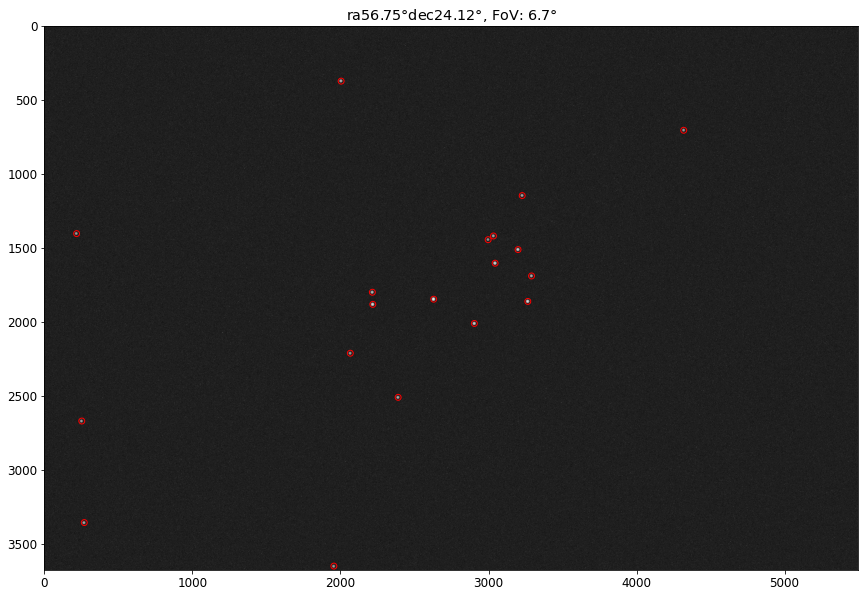

In [62]:
plt.rcParams.update({'font.size': 12})
# image.plot(save=True, filename='pleiadesfinal.png')
image.plot(centroids=t3centroids(image.image, **centroid_dict), save=True, filename='pleiadesfinalcent.png')

# img = fits.PrimaryHDU(image.image)
# img.writeto('pleiadesfinalcent.fits', overwrite=True)

In [6]:
centroids = t3centroids(image.image, **centroid_dict)

print(centroids[:2])

[[2775.5002  4613.501  ]
 [1517.502    563.50195]]


In [10]:
print(centroids[:-1])

[[2775.5002  4613.501  ]
 [1517.502    563.50195]
 [2728.497   4694.5024 ]
 [2736.4995   455.49905]
 [ 856.49805 5371.4995 ]
 [3249.4949  3693.5042 ]
 [ 313.47128 1275.492  ]]


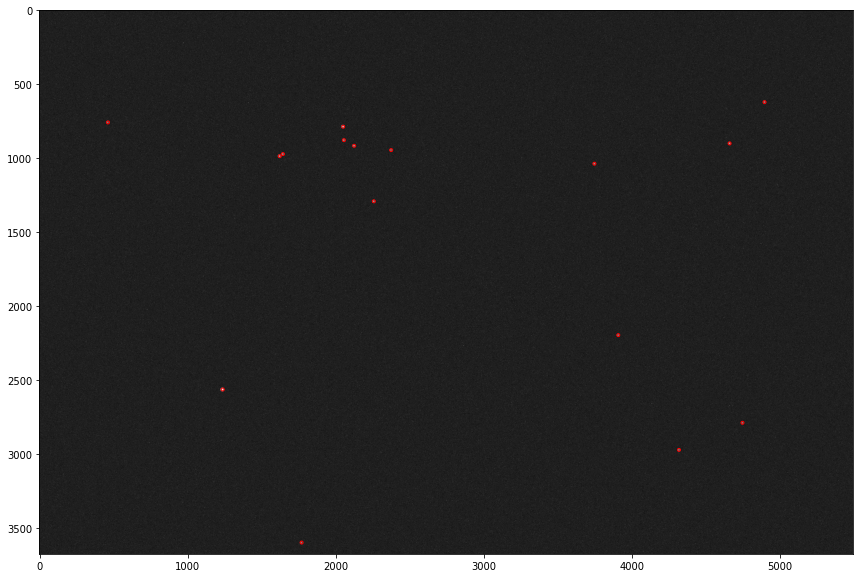

In [8]:
import tetra3 as t3
from matplotlib.patches import Circle

# foof = t3.Tetra3(db)

ds = 4
# test_image = downsample_image(image.image, downsample=ds)

# solved = foof.solve_from_image(test_image, **solve_dict, **centroid_dict)

# print(solved)

fig, ax = plt.subplots(figsize=[20, 10])
plt.gray()

centroids = t3centroids(image.image, downsample=ds, **centroid_dict)

# print(centroids)

x = centroids[:, 1]
y = centroids[:, 0]
for xx, yy in zip(x, y):
    circ = Circle((xx, yy), 10, ec="red", fill=False)
    ax.add_patch(circ)

ax.imshow(image.image, norm=LogNorm(vmin=1, vmax=15000))
plt.show()

# img = fits.PrimaryHDU(test_image)
# img.writeto('pleiades24.fits', overwrite=True)

In [4]:
from astroquery.astrometry_net import AstrometryNet

ast = AstrometryNet()
ast.api_key = 'zltccnuydcxstawk'

ast.show_allowed_settings()

allow_commercial_use: type 'str', default value d, allowed values ('d', 'y', 'n')
allow_modifications: type 'str', default value d, allowed values ('d', 'y', 'n')
center_dec: type 'float', default value None, allowed values (-90, 90)
center_ra: type 'float', default value None, allowed values (0, 360)
crpix_center: type 'bool', default value None, allowed values ()
downsample_factor: type 'int', default value None, allowed values (1,)
parity: type 'int', default value None, allowed values (0, 2)
positional_error: type 'float', default value None, allowed values (0,)
publicly_visible: type 'str', default value y, allowed values ('y', 'n')
radius: type 'float', default value None, allowed values (0,)
scale_err: type 'float', default value None, allowed values (0, 100)
scale_est: type 'float', default value None, allowed values (0,)
scale_lower: type 'float', default value None, allowed values (0,)
scale_type: type 'str', default value None, allowed values ('ev', 'ul')
scale_units: type '

In [54]:
wcs_header = ast.solve_from_image('fake_pleiades.fits', force_image_upload=True, use_sextractor=True)

print(wcs_header["CRVAL1"], wcs_header["CRVAL2"])

Solving...........................................................................................

TimeoutError: ('Solve timed out without success or failure', 3798647)

In [ ]:
import stereo
from stereo.sim import *
from stereo.hardware import ASI183MM_Sigma135mm as cam

import numpy as np

from astropy.coordinates import SkyCoord
from astropy import units as u

# define camera (ASI..Sigma can be used as cam,
# but this is to change parameters if desired)
# sensor_width = 5496 #pix
# sensor_height = 3672 #pix
# pix = 2.4e-3 #mm/pix
# focal_length = 135 #mm
# fnumber = 1.8
# avg_noise = 1.6
# temp = 20
# exp_time = 1
# max_ct = 15000
# cam1 = Camera(sensor_width,
#              sensor_height,
#              pix,
#              focal_length,
#              fnumber,
#              avg_noise,
#              temp,
#              exp_time,
#              max_ct
#             )
# cam1.loadQE('data/ASISigma_QE.csv', QE_peak=0.84, unpack=True, delimiter=',')
# cam1.loadDark('data/ASISigma_current.csv', unpack=True, delimiter=',')


# get the observation
obs = load_anita_observation(4, 0)

# define center ra,dec coords
cen_alt = 45 #degrees
cen_az = 0 # degrees
altaz = obs.altaz_frame
# center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs')
center_radec = SkyCoord(ra=84.0500, dec=-1.2019, unit=u.deg) # Orion
# center_radec = SkyCoord(ra=296.75827806346416, dec=11.314043605282833, unit=u.deg) # tetra3

mag_limit = 8
psf_sigma = 3

# generate the image
image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

# get_centroids_from_image kwargs
centroid_dict = {'sigma':3, 'image_th':None, 'filtsize':10, 'binary_open':True, 'bg_sub_mode':'global_median',
                 'sigma_mode':'global_median_abs',
                 'centroid_window':None, 'max_area':None, 'min_area':5, 'max_sum':None, 'min_sum':100, 
                 'max_axis_ratio':None}

fov = image.cam.fov
fov_err = fov[2] - min(fov[0], fov[1])

# solve_from_image kwargs
solve_dict = {'fov_estimate':fov[2], 'fov_max_error':fov_err, 'pattern_checking_stars':7, 
              'match_radius':0.001, 'match_threshold':1e-7}

# run tetra3
result = run_tetra3(image, **solve_dict, **centroid_dict)

# print the obtained center coords
print(result)

In [43]:
downsample_image(image.image, downsample=2)

print(image.image)

[[4.19670469 4.17388184 2.61242186 ... 2.3944286  3.62665799 2.39201641]
 [6.55222872 1.53390198 1.62045966 ... 4.01318954 3.67543048 2.34954691]
 [3.47261182 1.30512364 2.34479973 ... 1.82062191 0.30200188 3.16431308]
 ...
 [2.91619201 0.84401357 2.81164316 ... 4.25155398 2.47398706 2.5584649 ]
 [2.53279194 0.93347391 3.41060407 ... 2.63275214 3.44650575 1.81433957]
 [2.36714594 3.1490249  5.32240759 ... 4.18494422 6.82860896 4.73825863]]


In [39]:
fov2 = np.ceil(cam.fov[2])*2
fov3 = np.ceil(cam.fov[2])*3

mag5 = 5
mag6 = 6
mag7 = 7
mag8 = 8

In [9]:
from tetra3 import crop_and_downsample_image as downsample_image
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

ds = 2**3 * 3

fooimg = downsample_image(image.image, downsample=ds)

# fig, ax = plt.subplots(figsize=[20, 10])

# # ax.imshow(fooimg[int(500/ds):int(1000/ds), int(2000/ds):int(3000/ds)], norm=LogNorm(vmin=0.1, vmax=cam.max_ct))
# ax.imshow(fooimg, cmap='gray', norm=LogNorm(vmin=0.1, vmax=cam.max_ct))

# img = fits.PrimaryHDU(fooimg)
# img.writeto('down_pleiades.fits')

In [102]:
from astropy.table import Table

foo = Table.read("stereo/data/yale_bright_star_catalog5.fits.gz")["RAJ2000", "DEJ2000", "Vmag"]

foo.rename_columns(["RAJ2000", "DEJ2000", "Vmag"], ["ra", "dec", "Mag"])

ctr = SkyCoord(ra=180, dec=0, unit=u.deg)

bar = Image(stars=foo, center=ctr)

# fig, ax = plt.subplots(figsize=[20, 10])

In [50]:
output1 = (84.051, -1.202)
input1 = (84.0500, -1.2019)

ra = (input1[0] - output1[0])*100/input1[0]
dec = (input1[1] - output1[1])*100/input1[1]

print(ra, dec)

-0.001189767995246609 -0.008320159747066227


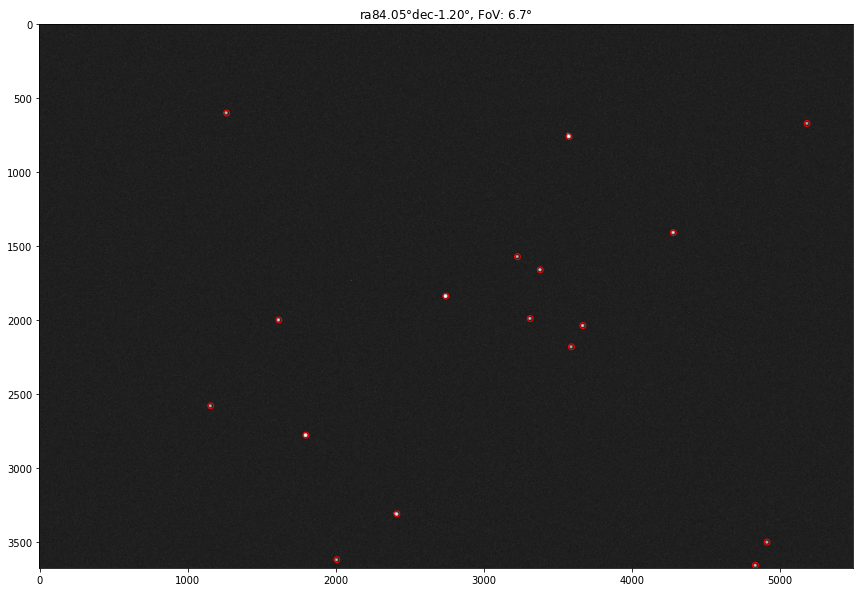

In [70]:
centr = centroids(image.image, **centroid_dict)

image.plot(centroids=centr)#, centroid_radius=40)

In [34]:
from numpy import load

data = load('tetra3/default_database.npz')
# data = load('stereo/data/tetra3/mag6.7fov7.npz')

lst = data.files 

for item in lst: 
    print(item) 
    print(data[item])
    try:
        print(len(data[item]))
    except:
        pass

star_table
[[ 1.767608   -0.29215428 -0.18725762  0.93913865 -0.28801587 -1.46      ]
 [ 1.6753125  -0.9197088  -0.06322699  0.6027447  -0.7954252  -0.72      ]
 [ 3.7331626   0.33412942 -0.7841603  -0.52682394  0.32794684 -0.04      ]
 ...
 [ 4.0477786   1.0869055  -0.28692982 -0.36620665  0.8851915   6.5       ]
 [ 2.55036     0.32921407 -0.7856669   0.52745146  0.3232994   6.5       ]
 [ 2.9499514   0.9210826  -0.59388345  0.11522658  0.796257    6.5       ]]
6857
pattern_catalog
[[1861 1874 3677 4222]
 [   0    0    0    0]
 [   0    0    0    0]
 ...
 [   0    0    0    0]
 [ 785 2018 3407 4048]
 [   0    0    0    0]]
8414544
props_packed
('edge_ratio', 4, 25, 0.005, 12., 10, 20, 6.5, 0.05)


In [10]:
from numpy import load

# data = load('tetra3/default_database.npz')
data = load('stereo/tetra3/db_fov7ps15cs20pme01.npz')

# lst = data.files 

# for item in lst: 
#     print(item) 
#     print(data[item])
#     try:
#         print(len(data[item]))
#     except:
#         pass

In [14]:
print(*data)
# print(data['pattern_catalog'])

star_table pattern_catalog props_packed


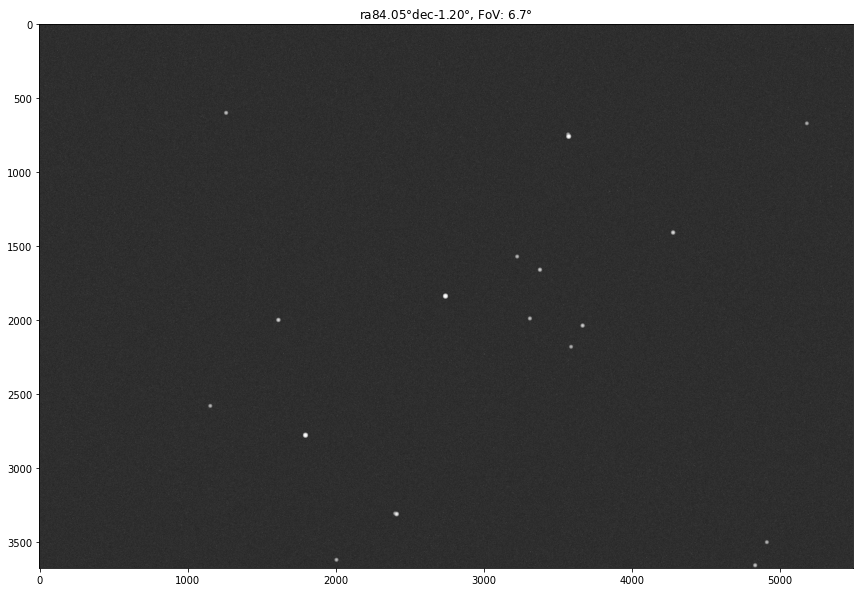

In [4]:
# print(image.image_stars)
# print(image.image[image.image == 0])
image.plot(vmin=0.5)

In [16]:
# centroid_dict = {'sigma':10, 'image_th':None, 'filtsize':7, 'binary_open':True, 
#                  'centroid_window':None, 'max_area':None, 'min_area':3,
#                  'max_sum':None, 'min_sum':None, 'max_axis_ratio':None}

# fov = image.cam.fov
# fov_err = fov[2] - min(fov[0], fov[1])

# solve_dict = {'fov_estimate':fov[2], 'fov_max_error':fov_err, 'pattern_checking_stars':3, 
#               'match_radius':0.01, 'match_threshold':1e-09}

# x = run_tetra3(image, **solve_dict, **centroid_dict)



2020-08-03 01:25:03,526:tetra3.Tetra3-INFO: Loading database from: /home/zackashm/work/stereo/data/tetra3/mag7.0fov6.npz


2020-08-03 01:25:03,847:tetra3.Tetra3-INFO: Loaded 9050 stars from catalogue.
2020-08-03 01:32:35,949:tetra3.Tetra3-INFO: With maximum 10 per FOV and no doubles: 8106.
2020-08-03 01:32:35,951:tetra3.Tetra3-INFO: With maximum 20 per FOV and no doubles: 8841.
2020-08-03 01:32:36,100:tetra3.Tetra3-INFO: Generating all possible patterns.
2020-08-03 01:38:54,519:tetra3.Tetra3-INFO: Found 2518035 patterns. Building catalogue.
2020-08-03 01:44:26,785:tetra3.Tetra3-INFO: Finished generating database.
2020-08-03 01:44:26,787:tetra3.Tetra3-INFO: Saving database to: /home/zackashm/work/stereo/data/tetra3/mag7.0fov6.npz


Tetra3 failed to obtain a result.


In [4]:
t3 = Tetra3()

data_directory = op.join(
    op.dirname(op.dirname(op.dirname(op.abspath(__file__)))), *("data", "tetra3")
)
database = Path(
    op.join(data_directory, "DB_mag{0:0.1f}fov{1:0.1f}".format(max_fov, mag_limit))
)

# load or make appropriate database
try:
    t3.load_database(database)
except FileNotFoundError:
    print(
        "Warning: No appropriate database found.",
        "Generating new database {}.".format(database.name),
    )
    t3.generate_database(max_fov, save_as=database, star_min_magnitude=mag_limit)
    pass



{'RA': None, 'Dec': None, 'Roll': None, 'FOV': None, 'RMSE': None, 'Matches': None, 'Prob': None, 'T_solve': 168.8694009790197, 'T_extract': 33170.81344604958}


In [6]:
centroid_dict = {'sigma':5, 'image_th':None, 'filtsize':3, 'binary_open':True, 
                 'centroid_window':None, 'max_area':None, 'min_area':3, 'max_sum':None, 'min_sum':None, 
                 'max_axis_ratio':None}

centroids(image.image, **centroid_dict)

array([], shape=(0, 2), dtype=float64)

In [10]:
import os.path as op
from PIL import Image as Img
from pathlib import Path

# Create instance and load default_database (built with max_fov=12 and the rest as default)
t3 = Tetra3('default_database')

# Path where images are
path = Path('/home/zackashm/work/tetra3/test_data/')
impath = next(path.glob('*.tiff'))
# for impath in path.glob('*.tiff'):
#     print(impath)
test_img = Img.open(str(impath))

# print(np.asarray(test_img))

# result = t3.solve_from_image(test_img)

# print(result)

2020-08-03 01:22:05,620:tetra3.Tetra3-INFO: Loading database from: /home/zackashm/work/tetra3/default_database.npz


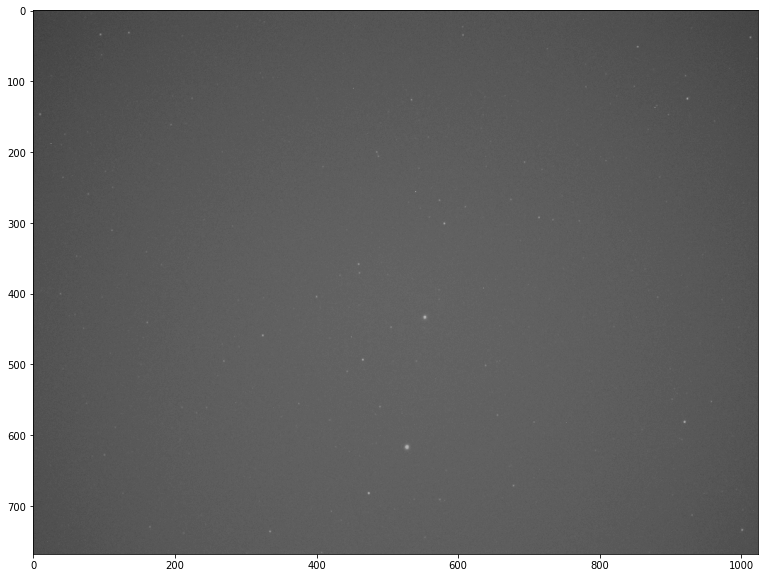

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

test_img1 = np.clip(test_img, 0, 15000)

fig, ax = plt.subplots(figsize=[20, 10])
plt.gray()
ax.imshow(test_img1, norm=LogNorm(vmin=500, vmax=np.max(test_img)))
plt.show()

# xfoo = np.linspace(0, len(np.asarray(test_img).flatten()), len(np.asarray(test_img).flatten()))

# plt.plot(xfoo, np.asarray(test_img).flatten())

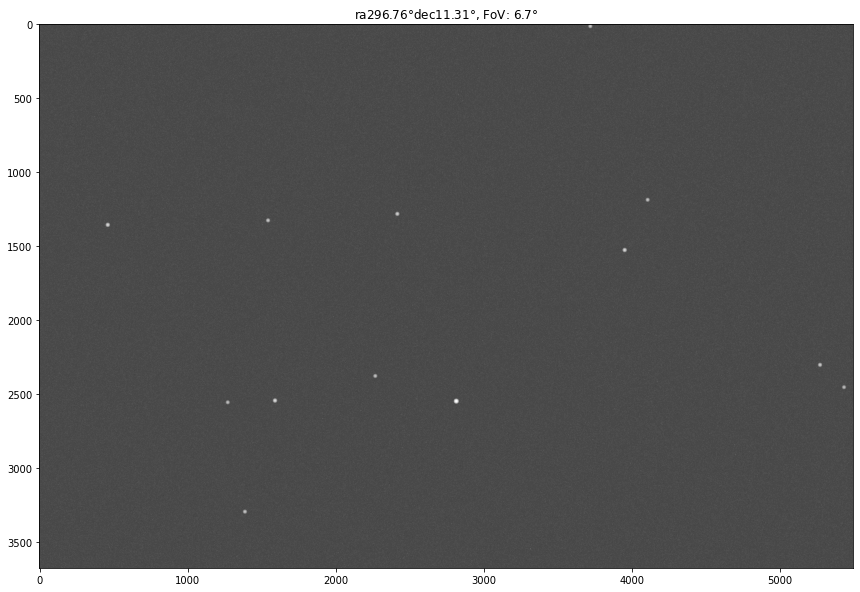

In [22]:
# foomage = image.image
# foomage = foomage[:,::-1]

# fig, ax = plt.subplots(figsize=[20, 10])
# plt.gray()
# ax.imshow(foomage, norm=LogNorm(vmin=30, vmax=np.max(foomage)))
# plt.show()

image.plot(vmin=0.1)

[ 4  6  8 10  8  6  4  4  6 12 17 19 17 12  6  2  0  0  0  0  0  0  0]
141


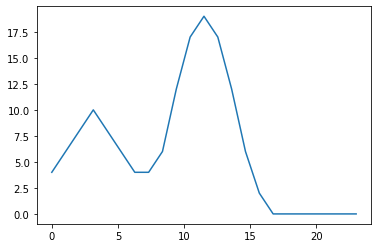

In [6]:
from scipy.ndimage.filters import gaussian_filter1d as gf1d
from matplotlib import pyplot as plt
import numpy as np

foo = np.array([0,0,0,50,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0], dtype=int)

bar = gf1d(foo, sigma=2)

print(bar)
print(np.sum(bar))

xbar = np.linspace(0, len(bar), len(bar))

plt.plot(xbar, bar)

In [9]:
foobar = np.array([xbar, bar], dtype=int)

print(foobar)

foobar[1] *= 2

print(foobar)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23]
 [ 4  6  8 10  8  6  4  4  6 12 17 19 17 12  6  2  0  0  0  0  0  0  0]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23]
 [ 8 12 16 20 16 12  8  8 12 24 34 38 34 24 12  4  0  0  0  0  0  0  0]]


In [19]:
from astropy.table import Table
filepath = 'resources/yale_bright_star_catalog5.fits.gz'
catalog = Table.read(filepath)

In [20]:
print(catalog)

 HR     Name      HD    RAJ2000    DEJ2000   Vmag  B-V         SpType       
                          deg        deg     mag   mag                      
---- ---------- ------ ---------- --------- ----- ----- --------------------
   1                 3     1.2912   45.2292  6.70  0.07                 A1Vn
   2                 6     1.2658   -0.5031  6.29  1.10                  gG9
   3  33    Psc     28     1.3337   -5.7075  4.61  1.04         K0IIIbCN-0.5
   4  86    Peg     87     1.4250   13.3961  5.51  0.90                G5III
   5               123     1.5667   58.4367  5.96  0.67                  G5V
   6               142     1.5792  -49.0750  5.70  0.52                 G1IV
   7  10    Cas    144     1.6104   64.1961  5.59 -0.03                B9III
   8               166     1.6533   29.0214  6.13  0.75                  K0V
   9               203     1.7087  -23.1075  6.18  0.38                  A7V
  10               256     1.8258  -17.3864  6.19  0.14                 A6Vn

In [4]:
from astropy.io import fits

img = fits.PrimaryHDU(image.image)
img.writeto('fake_orion.fits')

In [84]:
import stereo
from stereo.sim import *
from stereo.hardware import ASI183MM_Sigma135mm as cam

from astropy.io import fits

from tetra3 import Tetra3, get_centroids_from_image as t3centroids

import numpy as np

import random

import os

import photutils

from astropy.coordinates import SkyCoord
from astropy import units as u

from tetra3 import crop_and_downsample_image as downsample_image
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from astroquery.astrometry_net import AstrometryNet

from astroquery.exceptions import TimeoutError # handles timeout error

In [89]:
def alt_error(N, trial):
    """N = number of non-None points, trial = trial name"""

    # some intialization
    data_pts = 0
    data_no = 0
    timeout = 0
    error = None
    star_no_fail = 0
    solver_fail = 0
    alt_err_array = []

    while data_pts < N:
        
        if data_no > 0:
            break
        
        data_no += 1
        
        ##### Get image params #####

        ind = random.randrange(0, 37279)
        try:
            obs = load_anita_observation(4, ind)
        except IndexError:
            ind = random.randrange(0, 37279)

        cen_alt = 45 #degrees
        cen_az = random.randrange(0, 360) # degrees
        altaz = obs.altaz_frame
#         center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs')
        # center_radec = SkyCoord(ra=84.0500, dec=-1.2019, unit=u.deg) # Orion, 20 stars (works at 12 too)
        # center_radec = SkyCoord(ra=296.75827806346416, dec=11.314043605282833, unit=u.deg)
        center_radec = SkyCoord(ra=56.75, dec=24.1166666, unit=u.deg) # pleiades, 17 stars
        # center_radec = SkyCoord(ra=160.7375, dec=-64.3942, unit=u.deg) # ic 2602, 8 stars
        # center_radec = SkyCoord(ra=193.4125, dec=-60.3617, unit=u.deg) # jewel box, 7 stars
        # center_radec = SkyCoord(ra=315, dec=45, unit=u.deg) # jewel box, 7 stars

        mag_limit = 8
        psf_sigma = 3
        ds = 8

        ##### generate the image #####

        image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

        len_stars = len(image.image_stars)
        if len_stars < 4:
            star_no_fail += 1
            alt_err_array.append(None)
            continue

        ds_image = downsample_image(image.image, downsample=ds)

        ##### save fits image #####

        img = fits.PrimaryHDU(ds_image)#image.image)
#         filename = 'stereo/data/images/TRIAL{0}_{1}_A4{2}.fits'.format(trial, data_no, ind)
        filename = 'stereo/data/images/TEMP.fits'
        img.writeto(filename, overwrite=True)
#         ds_img = fits.PrimaryHDU(ds_image)
#         ds_filename = 'stereo/data/images/TRIAL{0}_ds{1}_A4{2}.fits'.format(trial, data_no, ind)
#         ds_img.writeto(ds_filename, overwrite=True)

        ##### sign into astrometry #####

        ast = AstrometryNet()
        ast.api_key = 'zltccnuydcxstawk'

        ##### put image into solver #####

        try_again = True
        submission_id = None

        while try_again:
            try:
                result = ast.solve_from_image(filename, force_image_upload=False,
                                              use_sextractor=True, submission_id=submission_id,
                                              solve_timeout=60*5, publicly_visible='n')#, FWHM=2.355*psf_sigma/ds)
            except TimeoutError as e:
                error = e
                timeout += 1
                alt_err_array.append(None)
                os.remove(filename)
                try_again = False
            except RuntimeError:
                print("RuntimeError occurred")
            else:
                # got a result, so terminate
                os.remove(filename)
                try_again = False

        if error:
            error = None
            continue
                
        if result:

            ##### get ra, dec from solver and transform to alt, az #####

            result_ra, result_dec = hdr["CRVAL1"], hdr["CRVAL2"]

            result_radec = SkyCoord(ra=result_ra, dec=result_dec, unit=u.deg)

            result_altaz = result_radec.transform_to(altaz)

            result_alt = result_altaz.alt.value

            ##### return the alt difference #####
            
            data_pts += 1

            alt_err_array.append(np.abs(cen_alt - result_alt))

        else:
            solver_fail += 1
            alt_err_array.append(None)
            continue
        
    return (np.asarray(alt_err_array), timeout, star_no_fail, solver_fail)

In [90]:
test_try = alt_error(1, 'deletethis')

Determining background stats
Finding sources
Found 12 sources
 id     xcentroid      ...        flux                mag         
--- ------------------ ... ------------------ --------------------
  6 329.26185963278743 ... 3150.7409230139374   -8.746031734425605
  7   402.458355695967 ... 1424.3644105681099  -7.8840527844393735
  5  282.4581181340903 ... 1246.1184783306367   -7.738898340236149
  4  361.8660958942908 ...  915.9069917839313   -7.404628435791225
  8  281.7383613916475 ...  407.6108197305327   -6.525614258790464
  9  404.2620740174712 ... 259.68951066257495  -6.0361360200747685
 11 373.45893348997663 ...  213.4598700492531   -5.823290601748069
  3  266.4566586370953 ... 119.80436928273251   -5.196181642812241
 10  369.5417851182711 ...  94.52762458952425  -4.9388968613155635
  2  76.15354188946989 ... 1.0698791201978213 -0.07333677973487647
  1  513.2153078443333 ... 1.0618895517514402 -0.06519836917212059
 12  585.0356226497843 ...  1.055538310104357 -0.05868500094241677


In [91]:
print(test_try)

(array([None], dtype=object), 1, 0, 0)


In [9]:
cntr = SkyCoord(ra=0, dec=0, unit=u.deg)
# help(bright_conesearch)
x = bright_conesearch(cntr)['ra', 'dec']

In [20]:
# obs = load_anita_observation(4, 0)
# altaz = obs.altaz_frame

# dec = x['dec']
# ra = x['ra']

# print(np.min(dec), np.max(dec))
# print(np.min(ra), np.max(ra))

# y = SkyCoord(ra=ra, dec=dec, unit=u.deg).transform_to(altaz)

az = y.az.value
alt = y.alt.value

print(np.min(az), np.max(az))
print(np.min(alt), np.max(alt))

0.017769880769935433 359.9249521665809
-88.7810574970562 89.34081775562062


In [23]:
359.997 % 360

359.997

In [4]:
# mapping at the 0, 360 line

import numpy as np
from numpy import logical_and as AND
from numpy import logical_not as NOT

data = np.linspace(0, 99, 100)

x = np.array([0, 2, 4, 6, 8, 10])

x_lo = 345
x_hi = 375
xspan = x_hi - x_lo

if x_hi > 360 or x_lo < 0:
    at360 = (360 - x_lo % 360) / xspan
    xleft = x[AND(x_lo % 360 <= x, x < 360)]
    xleftscale = (xleft - x_lo % 360) / xspan
    xright = x[AND(0 <= x, x <= x_hi % 360)]
    xrightscale = (xright) / xspan + at360
    xscale = np.append(xleftscale, xrightscale)
else:
    xscale = (x - x_lo) / xspan

width = len(data)
xind = np.round_(xscale * (width - 1)).astype(int)

print(xind)

[ 0 13 26 40 53 66]


In [ ]:
# mapping at the 90 and -90 line

import numpy as np
from numpy import logical_and as AND
from numpy import logical_not as NOT

data = np.linspace(0, 99, 100)

y = [79, 80, 82, 84, 85, 86, 86, 89]




height = len(data)
yind = np.round_(yscale * (height - 1)).astype(int)

print(yind)

In [32]:
# image.plot(centroids=t3centroids(image.image, **centroid_dict), centroid_radius=40)#, save=True, filename='overlay1')

# print(result)

img = fits.PrimaryHDU(image.image)                                                                                                    
img.writeto('187_-49.fits', overwrite=True) 

# cntr = centroids=t3centroids(image.image, **centroid_dict)

# def get_altaz(x, y):
#     az = xscale * (x - x0) + az0
#     alt = yscale * (y - y0) + alt0
#     return alt, az

# y, x = 2554.5032, 682.4992

# print(get_altaz(x, y))

# print(image.image_stars)
# print(cntr)

# xscale = fov[0] / image.size[1]
# yscale = fov[1] / image.size[0]

# 34.85339911726488 232.09921307436696 -> 452.4999 512.50024
# alt0, y0 = 34.85339911726488, 452.4999
# az0, x0 = 232.09921307436696, 512.50024

# print(image.size[1]*0.02230556 / 24)

In [176]:
import stereo
from stereo.sim import *
from stereo.hardware import ASI183MM_Sigma135mm as cam

import tetra3

import itertools

from time import perf_counter as timestamp

from astropy.io import fits

import numpy as np

import random

from astropy.coordinates import SkyCoord
from astropy import units as u

def run_sim(N, trial_name, output = None, star_min = 4, verbose_factor=50):
    """N = number of non-None points, trial = trial name, output = filename of output"""

    # sim intialization
    data_pts = 0
    trial_num = 0
    star_num_fail = 0
    solver_fail = 0
    timeout_fail = 0
    data_generator = ()
    
    # image and solver params
    mag_limit = 8
    psf_sigma = 3
    centroid_dict = {
        'sigma':3, 
        'image_th':None, 
        'filtsize':10, 
        'binary_open':True, 
        'bg_sub_mode':'global_median', 
        'sigma_mode':'global_median_abs', 
        'centroid_window':None, 
        'max_area':None, 
        'min_area':5, 
        'max_sum':None, 
        'min_sum':100, 
        'max_axis_ratio':None
    }
    fov = cam.fov
    fov_err = fov[2] - min(fov[0], fov[1])
    solve_dict = {
        'fov_estimate':fov[0], 
        'fov_max_error':fov_err, 
        'pattern_checking_stars':-1, 
        'match_radius':0.01, 
        'match_threshold':1e-9
    }
    db = "db_fov10ps15cs20pme01"
    ds = 4
    t3 = tetra3.Tetra3()
    t3.load_database(db)
    
    # open output
    if output:
        out = open(output, 'w')
    
    total_t0 = timestamp()
    
    try:

        # run until N non-None alt_err data points
        while data_pts < N:

            # begin new trial
            trial_num += 1
            star_ct = 0

            # UI progress display
            if trial_num % int(verbose_factor) == 0:
                print("Solving Trial ", trial_num, "... \n(", data_pts, " Solved Successfully, ", 
                      star_num_fail, " Star Count Fails, ", solver_fail, " Failed to Solve, ", 
                      timeout_fail, " Timed Out)", sep="")

            # get a random center coord from ANITA flight
            ind = random.randrange(0, 37279)
            obs = load_anita_observation(4, ind)
            cen_alt = 45 #degrees                                                                                                           
            cen_az = random.randrange(0, 360) # degrees                                                                                     
            altaz = obs.altaz_frame
            center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs') 
#             center_radec = SkyCoord(ra=84.0500, dec=-1.2019, unit=u.deg) # Orion, 20 stars (works at 12 too), pass                        
#             center_radec = SkyCoord(ra=296.75827806346416, dec=11.314043605282833, unit=u.deg) # 12 stars, pass                           
#             center_radec = SkyCoord(ra=56.75, dec=24.1166666, unit=u.deg) # pleiades, 17 stars, pass                                      
            # center_radec = SkyCoord(ra=160.7375, dec=-64.3942, unit=u.deg) # ic 2602, 8 stars, fail                                       
            # center_radec = SkyCoord(ra=193.4125, dec=-60.3617, unit=u.deg) # jewel box, 9 stars, fail                                     
            # center_radec = SkyCoord(ra=315, dec=45, unit=u.deg) # fail                                                                    
#             center_radec = SkyCoord(ra=129.27992157, dec=-54.00658433, unit=u.deg) # 16 stars, pass  

            # generate the image
            image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

            # check number of stars
            star_ct = len(image.image_stars)

            # star count test
            if star_ct < star_min:
                star_num_fail += 1
                
                # add data line
                trials = trial_num
                solved = -1
                alt_err = -999
                ind_val = ind
                num_stars = star_ct
                real_ra = center_radec.ra.value
                real_dec = center_radec.dec.value
                result_ra = -999
                result_dec = -999
                solve_t = -999
            
                data_line = [[
                    trials, solved, alt_err, ind_val, num_stars, 
                    real_ra, real_dec, result_ra, result_dec, solve_t
                ]]
                data_generator = itertools.chain(data_generator, data_line)
                
                continue
                
            if star_ct >= 10:
                img = fits.CompImageHDU(image.image)
                filename = 'stereo/data/images/{0}_{1:04}.fits'.format(trial_name, trial_num)
                img.writeto(filename, overwrite=True)

            # run star tracker algorithm
            solve_t0 = timestamp()
            try:
                result = run_tetra3(image, database=db, t3=t3, downsample=ds, **solve_dict, **centroid_dict)
            except StopIteration:
                timeout_fail += 1
                
                # add data line
                trials = trial_num
                solved = -1
                alt_err = -999
                ind_val = ind
                num_stars = star_ct
                real_ra = center_radec.ra.value
                real_dec = center_radec.dec.value
                result_ra = -999
                result_dec = -999
                solve_t = -999
            
                data_line = [[
                    trials, solved, alt_err, ind_val, num_stars, 
                    real_ra, real_dec, result_ra, result_dec, solve_t
                ]]
                data_generator = itertools.chain(data_generator, data_line)
                
                continue
            
            solve_tf = timestamp() - solve_t0

            if not result: # no solution
                solver_fail += 1
                
                # add data line
                trials = trial_num
                solved = 0
                alt_err = -999
                ind_val = ind
                num_stars = star_ct
                real_ra = center_radec.ra.value
                real_dec = center_radec.dec.value
                result_ra = -999
                result_dec = -999
                solve_t = solve_tf
            
                data_line = [[
                    trials, solved, alt_err, ind_val, num_stars, 
                    real_ra, real_dec, result_ra, result_dec, solve_t
                ]]
                data_generator = itertools.chain(data_generator, data_line)
                
                continue

            else: # success
                data_pts += 1
                
                # success, but star count low? Save it
                if star_ct < 10:
                    img = fits.CompImageHDU(image.image)
                    filename = 'stereo/data/images/{0}_{1:04}.fits'.format(trial_name, trial_num)
                    img.writeto(filename, overwrite=True)

                # get alt error
                result_altaz = result.transform_to(altaz)
                result_alt = result_altaz.alt.value
                err = np.abs(cen_alt - result_alt)
                
                # add data line
                trials = trial_num
                solved = 1
                alt_err = err
                ind_val = ind
                num_stars = star_ct
                real_ra = center_radec.ra.value
                real_dec = center_radec.dec.value
                result_ra = result.ra.value
                result_dec = result.dec.value
                solve_t = solve_tf
            
                data_line = [[
                    trials, solved, alt_err, ind_val, num_stars, 
                    real_ra, real_dec, result_ra, result_dec, solve_t
                ]]
                data_generator = itertools.chain(data_generator, data_line)
                
        total_t = (timestamp() - total_t0) / 60 / 60

        print("Done. Saving data to {0}...".format(output))
        
        # header data
        data_pts_per_solver = 100 * data_pts / (trial_num - star_num_fail)
        data_pts_per_total = 100 * data_pts / trial_num
        solver_fail_per_solver = 100 * solver_fail / (trial_num - star_num_fail)
        solver_fail_per_total = 100 * solver_fail / trial_num
        timeout_fail_per_solver = 100 * timeout_fail / (trial_num - star_num_fail)
        timeout_fail_per_total = 100 * timeout_fail / trial_num
        star_num_fail_per_total = 100 * star_num_fail / trial_num
        
        out.write(
            '# STEREO Data for run titled "{0}"\n'.format(trial_name) + 
            '#\n# Total Number of Trials: {0}\n'.format(trial_num) +
            '# Solved Trials: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                data_pts, data_pts_per_solver, data_pts_per_total) +
            '# Solver Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                solver_fail, solver_fail_per_solver, solver_fail_per_total) +
            '# Timeout Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                timeout_fail, timeout_fail_per_solver, timeout_fail_per_total) +
            '# Low Star Counts (<{0}): {1}, {2}%\n'.format(
                star_min, star_num_fail, star_num_fail_per_total) +
            '# Total Data Collection Time: {0} hrs\n'.format(total_t) + 
            '# skip_header = 23\n' + 
            '#\n# Column Notes\n' + 
            '# num: Data Index\n' + 
            '# solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)\n' + 
            '# alt_error: Error in Altitude (from 45 deg)\n' + 
            '# A4_index: Index used for ANITA4 data\n' + 
            '# star_ct: Number of Stars in the field\n' + 
            '# real_ra: Real RA of the center of the field in degrees\n' +
            '# real_dec: Real DEC of the center of the field in degrees\n' +
            '# ra: Result RA of the center of the field in degrees\n' + 
            '# dec: Result DEC of the center of the field in degrees\n' +
            '# solve_time: Total time taken to solve (or fail) in seconds\n' +
            '#\n# num     solved     alt_error     A4_index     star_ct     real_ra     real_dec     ra     dec     solve_time\n'
        )
        
        for data in data_generator:
            out.write(
                '{0}     {1}     {2}     {3}     {4}     {5}     {6}     {7}     {8}     {9}\n'.format(*data)
            )

        out.close()
            
        # End
    
    # return what's there so far if interrupted
    except KeyboardInterrupt:

        total_t = (timestamp() - total_t0) / 60 / 60
        
        print("Data collection interrupted. Saving data to {0}...".format(output))
        
        data_pts_per_solver = 100 * data_pts / (trial_num - star_num_fail)
        data_pts_per_total = 100 * data_pts / trial_num
        solver_fail_per_solver = 100 * solver_fail / (trial_num - star_num_fail)
        solver_fail_per_total = 100 * solver_fail / trial_num
        timeout_fail_per_solver = 100 * timeout_fail / (trial_num - star_num_fail)
        timeout_fail_per_total = 100 * timeout_fail / trial_num
        star_num_fail_per_total = 100 * star_num_fail / trial_num
        
        out.write(
            '# STEREO Data for run titled "{0}"\n'.format(trial_name) + 
            '#\n# Total Number of Trials: {0}\n'.format(trial_num) +
            '# Solved Trials: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                data_pts, data_pts_per_solver, data_pts_per_total) +
            '# Solver Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                solver_fail, solver_fail_per_solver, solver_fail_per_total) +
            '# Timeout Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                timeout_fail, timeout_fail_per_solver, timeout_fail_per_total) +
            '# Low Star Counts (<{0}): {1}, {2}%\n'.format(
                star_min, star_num_fail, star_num_fail_per_total) +
            '# Total Data Collection Time: {0} hrs\n'.format(total_t) + 
            '# skip_header = 23\n' +
            '#\n# Column Notes\n' + 
            '# num: Data Index\n' + 
            '# solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)\n' + 
            '# alt_error: Error in Altitude (from 45 deg)\n' + 
            '# A4_index: Index used for ANITA4 data\n' + 
            '# star_ct: Number of Stars in the field\n' + 
            '# real_ra: Real RA of the center of the field in degrees\n' +
            '# real_dec: Real DEC of the center of the field in degrees\n' +
            '# ra: Result RA of the center of the field in degrees\n' + 
            '# dec: Result DEC of the center of the field in degrees\n' +
            '# solve_time: Total time taken to solve (or fail) in seconds\n' +
            '#\n# num     solved     alt_error     A4_index     star_ct     real_ra     real_dec     ra     dec     solve_time\n'
        )
        
        for data in data_generator:
            out.write(
                '{0}     {1}     {2}     {3}     {4}     {5}     {6}     {7}     {8}     {9}\n'.format(*data)
            )

        out.close()
        
        # End

In [177]:
run_sim(2, 'DELETE', output='stereo/data/images/delete.txt', star_min=10, verbose_factor=15)

2020-08-29 12:45:00,297:tetra3.Tetra3-INFO: Loading database from: /home/zackashm/work/tetra3/db_fov10ps15cs20pme01.npz


Solving Trial 15... 
(0 Solved Successfully, 14 Star Count Fails, 0 Failed to Solve, 0 Timed Out)
Solving Trial 30... 
(0 Solved Successfully, 29 Star Count Fails, 0 Failed to Solve, 0 Timed Out)
Solving Trial 45... 
(0 Solved Successfully, 44 Star Count Fails, 0 Failed to Solve, 0 Timed Out)
Solving Trial 60... 
(0 Solved Successfully, 57 Star Count Fails, 1 Failed to Solve, 1 Timed Out)
Solving Trial 75... 
(0 Solved Successfully, 72 Star Count Fails, 1 Failed to Solve, 1 Timed Out)
Data collection interrupted. Saving data to stereo/data/images/delete.txt...


In [ ]:
# header:
# trial name
# total number of trials
# num trials solved percentage
# number trials failed percentage
# num trials less than 4 stars percentage
# total collection time

# solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)

data_pts_per_solver = data_pts / (trial_num - star_num_fail)
data_pts_per_total = data_pts / trial_num
solver_fail_per_solver = solver_fail / (trial_num - star_num_fail)
solver_fail_per_total = solver_fail / trial_num
timeout_fail_per_solver = timeout_fail / (trial_num - star_num_fail)
timeout_fail_per_total = timeout_fail / trial_num
star_num_fail_per_total = star_num_fail / trial_num

# ind real_center_ra real_center_dec result_center_ra result_center_dec num_stars solved(T/F) alt_err solve_time

with open('stereo/data/sim.txt', 'w') as output:
    output.write('# STEREO Data for Run "{}"\n'.format(trial_name) + 
                 '#\n# Total Number of Trials: {}\n'.format(trial_num) +
                 '# Solved Trials: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                     data_pts, data_pts_per_solver, data_pts_per_total) +
                 '# Solver Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                     solver_fail, solver_fail_per_solver, solver_fail_per_total) +
                 '# Timeout Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'/format(
                     timeout_fail, timeout_fail_per_solver, timeout_fail_per_total) +
                 '# Low Star Counts (<4): {0}, {1}%\n'.format(star_num_fail, star_num_fail_per_total) +
                 '# Total Data Collection Time: {0} hrs\n'.format(total_t) + 
                 '#\n# Column Notes:\n' + 
                 '# num: Data Index\n' + 
                 '# solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)\n' + 
                 '# alt_error: Error in Altitude (from 45 deg)\n' + 
                 '# A4_index: Index used for ANITA4 data\n' + 
                 '# star_ct: Number of Stars in the field\n' + 
                 '# real_ra: Real RA of the center of the field in degrees\n' +
                 '# real_dec: Real DEC of the center of the field in degrees\n' +
                 '# ra: Result RA of the center of the field in degrees\n' + 
                 '# dec: Result DEC of the center of the field in degrees\n' +
                 '# solve_time: Total time taken to solve (or fail) in seconds\n' +
                 '# num     solved     alt_error     A4_index     star_ct     real_ra     real_dec     ra     dec     solve_time\n')
    



In [14]:
# import timeout_decorator

# @timeout_decorator.timeout(5, timeout_exception=StopIteration)
# def looppp():
#     while True:
#         print("", sep="", end="")
        
# try:
#     looppp()
# except StopIteration:
#     print("excepted")

# from time import perf_counter as ttt

# tfoo = ttt()

# for i in range(0, 50000):
#     print("", sep="", end="")

# t = (ttt() - tfoo)

# print(t)

# print("Solving Trial ", 5, "... \n(", 2, " Solved Successfully, ", 
#                       6, " Star Count Fails, ", 7, " Failed to Solve, ", 
#                       1, " Timed Out)", sep="")

trial_num = 100
data_pts = 3
solver_fail = 40
timeout_fail = 7
star_num_fail = 50
data_pts_per_solver = 100 * data_pts / (trial_num - star_num_fail)
data_pts_per_total = 100 * data_pts / trial_num
solver_fail_per_solver = 100 * solver_fail / (trial_num - star_num_fail)
solver_fail_per_total = 100 * solver_fail / trial_num
timeout_fail_per_solver = 100 * timeout_fail / (trial_num - star_num_fail)
timeout_fail_per_total = 100 * timeout_fail / trial_num
star_num_fail_per_total = 100 * star_num_fail / trial_num
trial_name = 'TEST'
total_t = 0.5557

print(
    '# STEREO Data for Run "{0}"\n'.format(trial_name) + 
    '#\n# Total Number of Trials: {0}\n'.format(trial_num) +
    '# Solved Trials: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
        data_pts, data_pts_per_solver, data_pts_per_total) +
    '# Solver Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
        solver_fail, solver_fail_per_solver, solver_fail_per_total) +
    '# Timeout Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
        timeout_fail, timeout_fail_per_solver, timeout_fail_per_total) +
    '# Low Star Counts (<4): {0}, {1}%\n'.format(star_num_fail, star_num_fail_per_total) +
    '# Total Data Collection Time: {0} hrs\n'.format(total_t) + 
    '#\n# Column Notes\n' + 
    '# num: Data Index\n' + 
    '# solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)\n' + 
    '# alt_error: Error in Altitude (from 45 deg)\n' + 
    '# A4_index: Index used for ANITA4 data\n' + 
    '# star_ct: Number of Stars in the field\n' + 
    '# real_ra: Real RA of the center of the field in degrees\n' +
    '# real_dec: Real DEC of the center of the field in degrees\n' +
    '# ra: Result RA of the center of the field in degrees\n' + 
    '# dec: Result DEC of the center of the field in degrees\n' +
    '# solve_time: Total time taken to solve (or fail) in seconds\n' +
    '#\n# num     solved     alt_error     A4_index     star_ct     real_ra     real_dec     ra     dec     solve_time\n'
)

# STEREO Data for Run "TEST"
#
# Total Number of Trials: 100
# Solved Trials: 3, 6.0% (of attempted solves), 3.0% (total)
# Solver Fails: 40, 80.0% (of attempted solves), 40.0% (total)
# Timeout Fails: 7, 14.0% (of attempted solves), 7.0% (total)
# Low Star Counts (<4): 50, 50.0%
# Total Data Collection Time: 0.5557 hrs
#
# Column Notes
# num: Data Index
# solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)
# alt_error: Error in Altitude (from 45 deg)
# A4_index: Index used for ANITA4 data
# star_ct: Number of Stars in the field
# real_ra: Real RA of the center of the field in degrees
# real_dec: Real DEC of the center of the field in degrees
# ra: Result RA of the center of the field in degrees
# dec: Result DEC of the center of the field in degrees
# solve_time: Total time taken to solve (or fail) in seconds
#
# num     solved     alt_error     A4_index     star_ct     real_ra     real_dec     ra     dec     solve_time



In [59]:
for i in zip([0], [1, 2], [2, 4], [6, 9]):
    print("{0}{1:^11}{2}".format(*i))

ValueError: Invalid format specifier

In [28]:
print([i for i in range(0, trial_num)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [47]:
print("{0:0.2f}".format(5))

5.00


In [64]:
# alt_err = []
# ind_arr = []
# real_ra = []
# real_dec = []
# result_ra = []
# result_dec = []
# num_stars = []
# solved = []
# solve_t = []

In [69]:
file1 = open("", "w")

for i in range(10):
    file1.write(str(i))

file1.close()

FileNotFoundError: [Errno 2] No such file or directory: ''

In [169]:
import itertools

# def dataGenerator():
#     yield None

data_generator = ()

xbar = [[10, True, 'lol', 7.5, 0, 359.8, 'Yes']]

data_generator = itertools.chain(data_generator, xbar)

In [170]:
xbar = [[100, False, 'lmao', 10.33, -1, 329.8, 'No']]

data_generator = itertools.chain(data_generator, xbar)

In [171]:
for i in data_generator:
    print("{0:<5}{1:^}{2:^11}{4:^11}{5:^11}{6:>5}".format(*i))

10        1         lol         0        359.8     Yes
100       0        lmao        -1        329.8      No


In [159]:
print(next(data_generator))

StopIteration: 

In [160]:
print(next(copy_generator))

StopIteration: 

(array([2, 3, 4, 3, 2, 1]), array([0.2       , 0.66666667, 1.13333333, 1.6       , 2.06666667,
       2.53333333, 3.        ]))


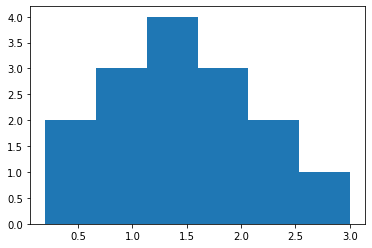

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 3, 1.5, 1.5, 1.4, 1.6, 1.7, .9, .98, 2.1, 2.05, .5, 1.2, .2, 2.1]
xhist = np.histogram(x, bins=6)
print(xhist)
_ = plt.hist(x, bins=6)
plt.show()

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

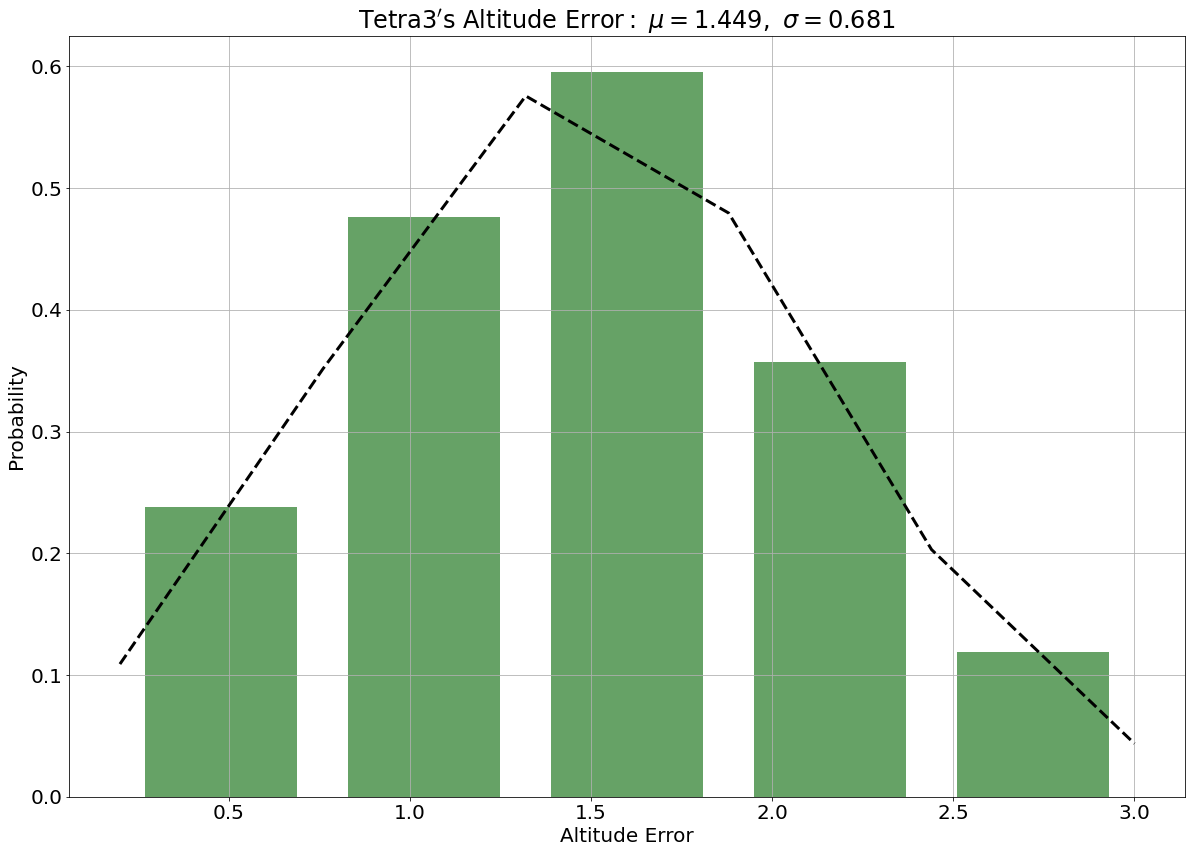

In [180]:
plt.rcParams.update({'font.size': 20})

# read data from a text file. One number per line

x = [1, 3, 1.5, 1.5, 1.4, 1.6, 1.7, .9, .98, 2.1, 2.05, .5, 1.2, .2, 2.1]

datos = x

# best fit of data
(mu, sigma) = norm.fit(datos)

fig, ax = plt.subplots(figsize=[20, 14])
ax.set(xlabel='Altitude Error', ylabel='Probability', 
       title=r"$\mathrm{Tetra3's\ Altitude\ Error:}\ \mu=%.3f,\ \sigma=%.3f$" %(mu, sigma))
ax.grid(True)

# the histogram of the data
n, bins, patches = plt.hist(datos, 'auto', density=True, facecolor='darkgreen', alpha=0.6, rwidth=0.75)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, c='black', ls='--', linewidth=3)

#plot

plt.show()

In [197]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

def analyze_alt_error(alt_err, bins='auto', arcsec=True):
    # best fit of data
    
    alt_err = alt_err[alt_err!=-999]
    if arcsec:
        alt_err *= 3600
    
    mu, sigma = norm.fit(alt_err)

    fig, ax = plt.subplots(figsize=[15, 10])
    if arcsec:
        ax.set(xlabel=r'Altitude Error ["]', ylabel='Probability', 
               title=r'Tetra3 Altitude Error: $\mu={0:.3f}$", $\sigma={1:.3f}$"'.format(mu, sigma))
    else:
        ax.set(xlabel=r'Altitude Error [$\degree$]', ylabel='Probability', 
               title=r"$\mathrm{Tetra3\ Altitude\ Error:}\ \mu=%.3e\degree,\ \sigma=%.3e\degree$" %(mu, sigma))

    # the histogram of the data
    n, bins, patches = plt.hist(alt_err, bins, density=True, facecolor='darkgreen', 
                                alpha=0.65, rwidth=0.8, edgecolor='black')

    # add a 'best fit' line
    y = norm.pdf(bins, mu, sigma)
    l = plt.plot(bins, y, c='black', ls='--', linewidth=2, label='Gaussian Fit')
    
    plt.legend(loc='upper right')
    plt.grid(True, axis='y')

    #plot
    plt.show()
    
    return mu, sigma

def plot_ct(star_ct_col, solve_bool_col, normalize=True, line=False):
    
    ct_solved_dict = {}
    ct_failed_dict = {}
    ct_timeout_dict = {}
    
    for ct, sol in zip(star_ct_col, solve_bool_col):
        # ignore low counts
        if ct < 4:
            continue
        
        # initialize ct entry if not defined
        try:
            ct_solved_dict[ct] += 0
        except KeyError:
            ct_solved_dict[ct] = 0
            ct_failed_dict[ct] = 0
            ct_timeout_dict[ct] = 0
            pass
        
        # fill in entries
        if sol == 1:
            ct_solved_dict[ct] += 1
        elif sol == 0:
            ct_failed_dict[ct] += 1
        elif sol == -1:
            ct_timeout_dict[ct] += 1

    # convert dictionaries to count sorted arrays
    ct_solved = []
    for key, value in ct_solved_dict.items():
        ct_solved.append([key, value])
    ct_solved = np.array(ct_solved).T
    _x, _y = ct_solved[0], ct_solved[1]
    ct_solved = np.array([[x, y] for x,y in sorted(zip(_x,_y))], dtype=float).T
    
    ct_failed = []
    for key, value in ct_failed_dict.items():
        ct_failed.append([key, value])
    ct_failed = np.array(ct_failed).T
    _x, _y = ct_failed[0], ct_failed[1]
    ct_failed = np.array([[x, y] for x,y in sorted(zip(_x,_y))], dtype=float).T
    
    ct_timeout = []
    for key, value in ct_timeout_dict.items():
        ct_timeout.append([key, value])
    ct_timeout = np.array(ct_timeout).T
    _x, _y = ct_timeout[0], ct_timeout[1]
    ct_timeout = np.array([[x, y] for x,y in sorted(zip(_x,_y))], dtype=float).T
    
    cts = ct_solved[0]

    if normalize:
        for ct in range(len(cts)):
            try:
                ct_sum = np.sum([ct_solved[1][ct], ct_failed[1][ct], ct_timeout[1][ct]])
                ct_solved[1][ct] = ct_solved[1][ct] / ct_sum
                ct_failed[1][ct] = ct_failed[1][ct] / ct_sum
                ct_timeout[1][ct] = ct_timeout[1][ct] / ct_sum
            except ZeroDivisionError:
                continue

    # plot bar graph
    fig, ax = plt.subplots(figsize=[20, 10])

    ax.set(xlabel='Star Count', ylabel='{0}Amount Solved/Failed/Timeout'.format('Relative ' if normalize else ''), 
           title='tetra3 Performance for Different Star Counts')
    
    if line:
        plt.plot(*ct_solved, label='Solved', color='green', marker='o', alpha=0.8)
        plt.plot(*ct_failed, label='Failed', color='red', marker='o', alpha=0.75)
        plt.plot(*ct_timeout, label='Timed Out', color='gray', marker='o', alpha=0.8)
    else:
        bar_width = np.min(np.diff(cts))/4
        ct_solved[0] += -bar_width
        plt.bar(*ct_solved, bar_width, label='Solved', color='green', linewidth=2, edgecolor='black', alpha=0.8)
        plt.bar(*ct_failed, bar_width, label='Failed', color='red', linewidth=2, edgecolor='black', alpha=0.75)
        ct_timeout[0] += bar_width
        plt.bar(*ct_timeout, bar_width, label='Timed Out', color='gray', linewidth=2, edgecolor='black', alpha=0.8)
    
    plt.legend(loc='upper right')
    plt.grid(True, axis='y')
    
    plt.show()
    
def analyze_solve_time(star_ct_col, solve_time_col, solve_bool_col):
    star_ct0 = star_ct_col[solve_bool_col == 1]
    solve_time0 = solve_time_col[solve_bool_col == 1]

    star_ct  = np.unique(star_ct0)
    solve_time = np.array([np.mean(solve_time0[star_ct0==ct]) for ct in star_ct])
    solve_time_err = np.array([np.std(solve_time0[star_ct0==ct]) for ct in star_ct])
    
    data = np.array([[x, y] for x,y in sorted(zip(star_ct, solve_time))], dtype=float).T
    
    fig, ax = plt.subplots(figsize=[15, 10])

    ax.set(xlabel='Star Count', ylabel='Solve Time [ms]', 
           title='tetra3 Solve Time vs Star Counts')

    plt.grid()
    
    plt.errorbar(*data, yerr=solve_time_err, fmt='o', capsize=5, c='blue')
    
    plt.show()

In [205]:
FILE = 'stereo/data/images/BRIGHT.txt'

header = ""

with open(FILE, 'rt') as file:
    for line in file:
        if '#' not in line:
            break
        header += line[2:]
        _temp = line.split()
        if "Total Number" in line: 
            total_number = _temp[5]
        elif "Solved Trials" in line:
            solved_tot = float(_temp[3][:-1])
            solved_per_solve = float(_temp[4][:-1])
            solved_per_tot = float(_temp[8][:-1])
        elif "Solver Fails" in line:
            fail_tot = float(_temp[3][:-1])
            fail_per_solve = float(_temp[4][:-1])
            fail_per_tot = float(_temp[8][:-1])
        elif "Timeout Fails" in line:
            timeout_tot = float(_temp[3][:-1])
            timeout_per_solve = float(_temp[4][:-1])
            timeout_per_tot = float(_temp[8][:-1])
        elif "Low Star Counts" in line:
            low_ct_tot = float(_temp[5][:-1])
            low_ct_per = float(_temp[6][:-1])
        elif "Time" in line:
            tot_time = float(_temp[5])
        elif "skip_header" in line:
            skip_header = int(_temp[3])
        

data = np.genfromtxt(FILE, unpack=True, skip_header=skip_header)

alt_err = data[2]
star_ct = data[4]
solve_bool = data[1]
solve_time = data[9]

STEREO Data for run titled "BRIGHT"
Total Number of Trials: 55339.0
Solved Trials: 10000.0, 48.645230335165635% (of attempted solves), 18.070438569544084% (total)
Solver Fails: 10528.0, 51.213698496862385% (of attempted solves), 19.02455772601601% (total)
Timeout Fails: 0.0, 0.0% (of attempted solves), 0.0% (total)
Low Star Counts (<4): 34782.0, 62.85259943258823%
Total Data Collection Time: 0.33363634621278226 hrs
skip_header = 23
Column Notes
num: Data Index
solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)
alt_error: Error in Altitude (from 45 deg)
A4_index: Index used for ANITA4 data
star_ct: Number of Stars in the field
real_ra: Real RA of the center of the field in degrees
real_dec: Real DEC of the center of the field in degrees
ra: Result RA of the center of the field in degrees
dec: Result DEC of the center of the field in degrees
solve_time: Total time taken to solve (or fail) in seconds
num     solved     alt_error     A4_index     star_ct     rea

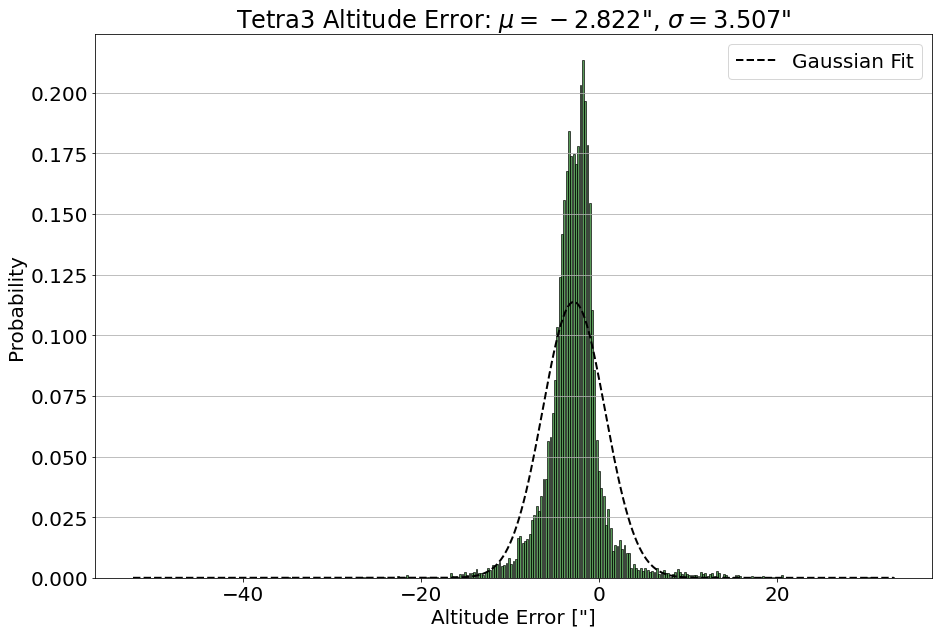

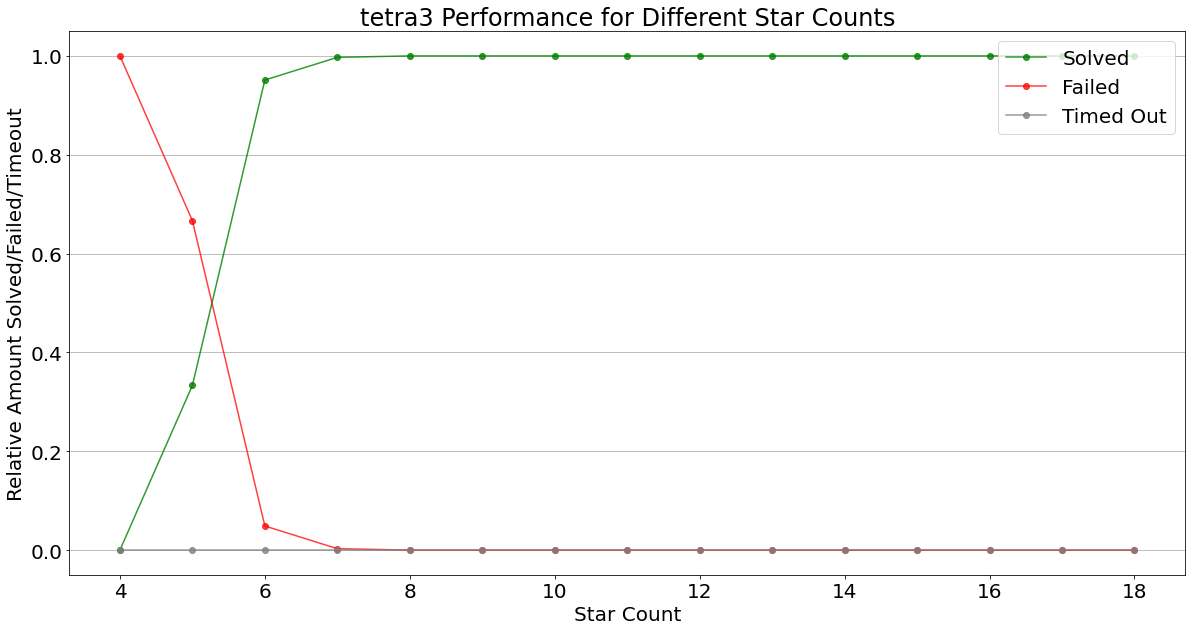

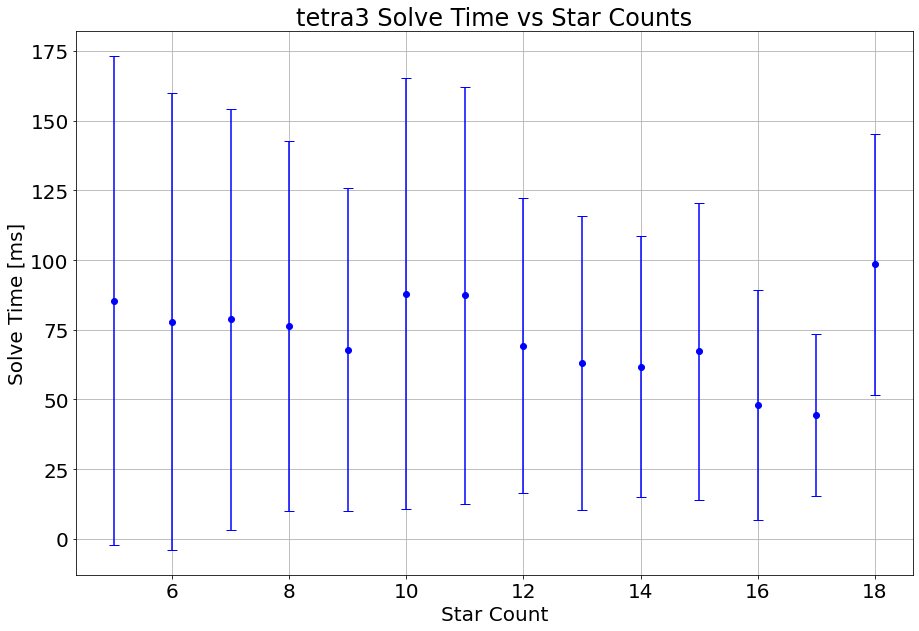

In [206]:
print(header)
analyze_alt_error(alt_err, bins='auto', arcsec=True)
plot_ct(star_ct, solve_bool, normalize=True, line=True)
analyze_solve_time(star_ct, solve_time, solve_bool)

In [44]:
text = '# Low Star Counts (<10): 75, 96.15384615384616%'
left_text = text.split()
# print(float(left_text[6][:-1]))
print(left_text)

['#', 'Low', 'Star', 'Counts', '(<10):', '75,', '96.15384615384616%']


In [50]:
with open('stereo/data/images/delete.txt', 'rt') as fn:
    for line in fn:
        if '#' not in line:
            break
        _temp = line.split()
        if "Total Number" in line: 
            total_number = _temp[5]
        elif "Solved Trials" in line:
            solved_tot = float(_temp[3][:-1])
            solved_per_solve = float(_temp[4][:-1])
            solved_per_tot = float(_temp[8][:-1])
        elif "Solver Fails" in line:
            fail_tot = float(_temp[3][:-1])
            fail_per_solve = float(_temp[4][:-1])
            fail_per_tot = float(_temp[8][:-1])
        elif "Timeout Fails" in line:
            timeout_tot = float(_temp[3][:-1])
            timeout_per_solve = float(_temp[4][:-1])
            timeout_per_tot = float(_temp[8][:-1])
        elif "Low Star Counts" in line:
            low_ct_tot = float(_temp[5][:-1])
            low_ct_per = float(_temp[6][:-1])
        elif "Time" in line:
            tot_time = float(_temp[5])
        elif "skip_header" in line:
            skip_header = int(_temp[3])

print(total_number, solved_tot, solved_per_solve, solved_per_tot, fail_tot, fail_per_solve, fail_per_tot,
     timeout_tot, timeout_per_solve, timeout_per_tot, low_ct_tot, low_ct_per, tot_time, skip_header)


# STEREO Data for run titled "DELETE"

#

# Total Number of Trials: 78

# Solved Trials: 0, 0.0% (of attempted solves), 0.0% (total)

# Solver Fails: 1, 33.333333333333336% (of attempted solves), 1.2820512820512822% (total)

# Timeout Fails: 1, 33.333333333333336% (of attempted solves), 1.2820512820512822% (total)

# Low Star Counts (<10): 75, 96.15384615384616%

# Total Data Collection Time: 0.10100593574914254 hrs

# skip_header = 23

#

78 0.0 0.0 0.0 1.0 33.333333333333336 1.2820512820512822 1.0 33.333333333333336 1.2820512820512822 75.0 96.15384615384616 0.10100593574914254 23


In [209]:
with open('stereo/data/images/RUN1.txt', 'rt') as fn:
    for line in fn:
        _temp = line.split()
        if '#' in line:
            continue
        if float(_temp[1]) == 0 and float(_temp[4]) > 10:
            print(line)

29     0     -999     4884     11     118.91461711889565     -42.56491818852922     -999     -999     85.76065605299999

95     0     -999     1362     11     116.7847439233114     -34.89531789309905     -999     -999     106.88822919100005

112     0     -999     13936     11     99.903026660411     -38.74223250860802     -999     -999     98.197288361

247     0     -999     28781     11     118.1163129822039     -48.948377035834305     -999     -999     47.72975217500016

393     0     -999     19028     11     154.02265174181326     -41.283597054855626     -999     -999     87.03187114899993

410     0     -999     15290     13     111.28598613148323     -38.63212193792371     -999     -999     151.06338614499964

445     0     -999     36371     12     117.5876143626458     -43.43080364877209     -999     -999     136.8212002700002

511     0     -999     20838     11     218.20751019220245     -40.643721932199064     -999     -999     106.51269671599994

771     0     -999     10

In [27]:
# center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs')
# x = SkyCoord(ra=84.0500, dec=-1.2019, unit=u.deg) # Orion, 20 stars (works at 12 too)
# x = SkyCoord(ra=296.75827806346416, dec=11.314043605282833, unit=u.deg)
# x = SkyCoord(ra=56.75, dec=24.1166666, unit=u.deg) # pleiades, 17 stars
# x = SkyCoord(ra=160.7375, dec=-64.3942, unit=u.deg) # ic 2602, 8 stars
# x = SkyCoord(ra=193.4125, dec=-60.3617, unit=u.deg) # jewel box, 7 stars
# x = SkyCoord(ra=315, dec=45, unit=u.deg) # jewel box, 7 stars
# x = SkyCoord(ra=114.71790042166606, dec=-40.14492200182449, unit=u.deg)
x = SkyCoord(ra=129.27992157, dec=-54.00658433, unit=u.deg) # 16 stars, pass 
# x = SkyCoord(ra=114.71790042166606, dec=-40.14492200182449, unit=u.deg)

print(x.transform_to(altaz))

<SkyCoord (AltAz: obstime=1482059923.0, location=(713347.27383732, -273812.06984962, -6350489.27998096) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (244.81123191, 51.61515136)>


In [115]:
"""
This module provides the Image class.
"""

from typing import Dict, Tuple

import attr
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
from numpy import logical_and as AND
from numpy import logical_not as NOT
from scipy.integrate import simps
from scipy.ndimage import gaussian_filter

from stereo.sim.camera import Camera
from stereo.sim.observation import Observation


@attr.s
class Image(object):
    """
    An image class containing at least a table of stars
    and a sky center, and capable of image generation of stars
    using Camera and Observation objects.

    Attributes
    ----------
    stars : astropy.table.Table
        The table of stars 'ra', 'dec', and 'Mag'. Not necessarily the
        stars shown within the image.
    center : astropy.coordinates.SkyCoord
        The sky coordinates of the center of the image.
    observation : Observation
        The Observation object.
    cam : Camera
        The Camera object.
    mag_limit : float
        The most dim magnitude cutoff. Default = max magnitude in stars['Mag'].
    psf_sigma : float
        The standard deviation of the Gaussian PSF in pixels. Default = 2.

    Properties
    ----------
    size : Tuple[int, int]
        The size of the image frame in pixels.
    altaz_stars : astropy.table.Table
        The table of stars 'alt', 'az', 'Mag'.
    image_bounds : Dict[str, Tuple[float, float]]
        The alt, az bounds of the image.
    image_stars : astropy.table.Table
        The table of stars 'alt', 'az', 'Mag' shown in the image.
    image : numpy.ndarray
        The ndarray of a pixel grid containing pixel values
        corresponding to the location and magnitudes of the stars.

    Methods
    -------
    mag2pix(table: Table) : astropy.table.Table
        Returns the ra, dec stars table or a given table
        with magnitude values converted to total pixel counts.
    plot(vmin: float = 1, vmax: float = None)
        Minimally plots the image data. Use vmin, vmax to set log range. If
        vmax is None, vmax is set to the camera's max pixel count.
    """

    stars: Table = attr.ib()
    center: SkyCoord = attr.ib()
    observation: Observation = attr.ib(default=None)
    cam: Camera = attr.ib(default=None)
    mag_limit: float = attr.ib()
    psf_sigma: float = attr.ib(default=2)

    @mag_limit.default
    def mag_limit_default(self) -> float:
        """Sets default mag_limit to dimmest magnitude given."""
        return np.amax(self.stars["Mag"])

    @property
    def size(self) -> Tuple[int, int]:
        """Returns the pixel dimensions of the CCD."""
        try:
            return self._size  # type: ignore
        except AttributeError:
            if self.cam is None:
                raise ValueError("Camera object required to determine image size")
            size = (self.cam.sensor_pixheight, self.cam.sensor_pixwidth)
            self._size = size
            return size

    @property
    def altaz_stars(self) -> Table:
        """
        Convert the (ra, dec) coordinates in a given astropy table
        of stars with columns 'ra', 'dec', and 'Mag' to (alt, az)
        using the observation location and time.

        Returns
        -------
        altaz_table : astropy.table.Table
            The converted table with column coordinates 'alt'
            and 'az' in degrees, and magnitude column 'Mag'.

        Raises
        ------
        ValueError
            If Observation object attribute is not set.
        """

        try:
            return self._altaz_stars  # type: ignore
        except AttributeError:
            if self.observation is None:
                raise ValueError("Observation object required for alt/az conversion")

            # make the table for alt, az coords
            altaz_table = Table(self.stars, names=["alt", "az", "Mag"], copy=True)

            # get skycoords for ra,dec transformed to alt,az
            obs_time = self.observation.time
            rd2aa = SkyCoord(
                ra=self.stars["ra"], dec=self.stars["dec"], obstime=obs_time, unit=u.deg
            ).transform_to(self.observation.altaz_frame)

            # set table values to the transformed coords
            altaz_table["alt"] = rd2aa.alt.value * rd2aa.alt.unit
            altaz_table["az"] = rd2aa.az.value * rd2aa.az.unit

            # return result
            self._altaz_stars = altaz_table
            return altaz_table
        
    @property
    def proj_stars(self) -> Table:
        """
        Convert the (ra, dec) coordinates in a given astropy table
        of stars with columns 'ra', 'dec', and 'Mag' to image projected
        coordinates using the center ra, dec.

        Returns
        -------
        proj_table : astropy.table.Table
            The converted table with column coordinates 'y' and 'x' in 
            units per focal length, and magnitude column 'Mag'.
        """

        try:
            return self._proj_stars  # type: ignore
        except AttributeError:

            # make the table for projected coords
            proj_table = Table(self.stars, names=["y", "x", "Mag"], copy=True)
            
            # get star ra, dec coords
            ra, dec = self.stars['ra'], self.stars['dec']
            
            # get the projected coordinates
            x, y = self.radec2proj(ra=ra, dec=dec)

            # set table values to the transformed coords
            proj_table["y"] = y / u.deg
            proj_table["x"] = x / u.deg

            # return result
            self._proj_stars = proj_table
            return proj_table


    @property
    def image_bounds(self) -> Dict[str, Tuple[float, float]]:
        """
        Returns the projected x, y bounds of the image.

        Returns
        -------
        bounds : Dict[str, Tuple[float, float]]
            The dictionary containing the 'x' and 'y' bounds as (lower, upper)
            tuples.

        Raises
        ------
        ValueError
            If Camera object attribution is not set.
        """
        try:
            return self._image_bounds  # type: ignore
        except AttributeError:
            if self.cam is None:
                raise ValueError(
                    "Camera object required to determine image bounds"
                )
                
            cen_x, cen_y = self.radec2proj(radec=self.center)

            xfov, yfov, _ = self.cam.fov
            x_lo = cen_x - np.tan(xfov * (np.pi / 180) / 2)
            x_hi = cen_x + np.tan(xfov * (np.pi / 180) / 2)
            y_lo = cen_y - np.tan(yfov * (np.pi / 180) / 2)
            y_hi = cen_y + np.tan(yfov * (np.pi / 180) / 2)

            bounds = {"x": (x_lo, x_hi), "y": (y_lo, y_hi)}

            # return the boundaries
            self._image_bounds = bounds
            return bounds

    @property
    def image_stars(self) -> Table:
        """Returns the 'alt', 'az', and 'Mag' table of stars shown in the image."""
        try:
            return self._image_stars  # type: ignore
        except AttributeError:

            # get alt, az and bounds
            star_table = Table(self.proj_stars, copy=True)

            x = star_table["x"]
            y = star_table["y"]

            x_lo, x_hi = self.image_bounds["x"]
            y_lo, y_hi = self.image_bounds["y"]
            
            # determine boolean bounds
            x_bound = AND(x_lo <= x, x <= x_hi)
            y_bound = AND(y_lo <= y, y <= y_hi)

            # remove stars outside the bounds
            bound = np.logical_and(y_bound, x_bound)
            stars = star_table[bound]

            # and return them
            self._image_stars = stars
            return stars

    @property
    def image(self) -> np.ndarray:
        """
        Returns the ndarray containing pixel values corresponding to
        positions and magnitudes in self.stars with a Gaussian PSF.

        Returns
        -------
        image_data : ndarray
            An ndarray with dimensions of CCD with pixels
            equal to the total pixel flux where a star is located.
        """

        try:
            return self._image  # type: ignore
        except AttributeError:

            image_stars = self.image_stars
            stars = self.mag2pix(image_stars)

            x = stars["x"]
            y = stars["y"]
            ct = stars["Total Counts"]

            height, width = self.size
            image_data = np.zeros((height, width))

            # get the span of alt, az positions
            x_lo, x_hi = self.image_bounds["x"]
            y_lo, y_hi = self.image_bounds["y"]
            
            # map to pixels
            xind = np.interp(x, (x_lo, x_hi), (0.5, width+0.5)).astype(int)
            yind = np.interp(y, (y_lo, y_hi), (0.5, height+0.5)).astype(int)

            # set pixel values at star pixel positions
            for i in zip(yind, xind, ct):
                image_data[i[0], i[1]] = i[2]

            # apply Gaussian PSF
            image_data = gaussian_filter(image_data, sigma=self.psf_sigma)
            if np.max(image_data):
                ct_scale = self.cam.max_ct / np.max(image_data)
                image_data *= ct_scale

            # add noise and dark current
            image_data += np.random.poisson(self.cam.avg_noise, size=self.size)
            noise_level = np.interp(self.cam.temp, *self.cam.dark_current)
            image_data += np.random.lognormal(
                noise_level * self.cam.exp_time, size=self.size
            )

            image_data = np.clip(image_data, 0, self.cam.max_ct)

            # flip horizontally
            image_data = image_data[:, ::-1]

            # and return the image
            self._image = image_data
            return image_data
        
    def radec2proj(self, radec: SkyCoord = None, ra: float = None, dec: float = None) -> Tuple[float, float]:
        """Convert ra, dec coordinates to the image projection coordinates in units per focal length."""
        
        # get center and star ra, dec coords
        cen_ra, cen_dec = self.center.ra.value*(np.pi / 180), self.center.dec.value*(np.pi / 180)
        if ra is None and dec is None:
            ra, dec = radec.ra.value, radec.dec.value
            
        ra = ra * (np.pi / 180)
        dec = dec * (np.pi / 180)
        
        # calculate projection coords:
        # https://phys.libretexts.org/Bookshelves/Astronomy__Cosmology/Book%3A_Celestial_Mechanics_(Tatum)/11%3A_Photographic_Astrometry/11.02%3A_Standard_Coordinates_and_Plate_Constants
        x = np.sin(ra - cen_ra) / ( np.sin(cen_dec) * np.tan(dec) 
                                   + np.cos(cen_dec) * np.cos(ra - cen_ra) )
        y = ( np.tan(dec) - np.tan(cen_dec) * np.cos(ra - cen_ra) ) / ( 
            np.tan(cen_dec) * np.tan(dec) + np.cos(ra - cen_ra) )
        
        return (x, y)

    def mag2pix(self, table: Table = None) -> Table:
        """
        Returns the stars table with magnitudes converted to total pixel counts.

        Parameters
        ----------
        table : astropy.table.Table
            The star table to use. If None, the ra,dec stars table is used.

        Returns
        -------
        stars : Table
            The table containing pixel values corresponding to the magnitudes.
        """

        # get the desired star table
        if table is not None:
            stars = Table(table, copy=True)
        else:
            stars = Table(self.stars, copy=True)

        # quantify the magnitudes
        mag = np.array(stars["Mag"])
        mag_val = mag * u.ABmag

        # convert magnitudes to flux
        flux = mag_val.to(
            u.photon / u.s / u.cm ** 2 / u.nm, u.spectral_density(551 * u.nm)
        )

        # get the total QE response
        QE = self.cam.QE
        if QE is not None:
            response = simps(QE[1], QE[0]) * u.nm / u.photon
        else:
            response = 600 * u.nm / u.photon  # 100% from 400nm to 1000nm

        # note: radius in mm -> cm
        aper_area = np.pi * (self.cam.radius * 0.1) ** 2

        # calculate the pixel counts
        pixel_cts = flux * self.cam.exp_time * aper_area * response

        # replace the magnitudes with pixel values
        stars["Mag"] = pixel_cts
        stars.rename_column("Mag", "Total Counts")

        # and return the table
        return stars

    def plot(
        self,
        vmin: float = 1,
        vmax: float = None,
        centroids: np.ndarray = None,
        centroid_radius: float = 20,
        save: bool = False,
        filename: str = None,
    ) -> None:
        """
        Plot the image.

        Parameters
        ----------
        vmin, vmax : float
            The min and max passed into the pyplot LogNorm scale.
        centroids : ndarray
            The centroids of the image. If not None, returns the image with position
            annotations.
        centroid_radius : float
            The radius of the centroid annotations.
        save : bool
            Save the image as a png if true.
        filename : str
            The save filename if save is True. Extension is assumed .png. Required
            if save is True.
        """

        fig, ax = plt.subplots(figsize=[20, 10])
        plt.gray()
        plt.title(
            r"ra{0:.2f}$\degree$dec{1:.2f}$\degree$, FoV: {2:.1f}$\degree$".format(
                self.center.ra.value, self.center.dec.value, self.cam.fov[2]
            )
        )
        vmax = self.cam.max_ct if vmax is None else vmax
        ax.imshow(self.image, norm=LogNorm(vmin=vmin, vmax=vmax))

        if centroids is not None:
            x = centroids[:, 1]
            y = centroids[:, 0]
            for xx, yy in zip(x, y):
                circ = Circle((xx, yy), centroid_radius, ec="red", fill=False)
                ax.add_patch(circ)

        if save:
            if filename is None:
                raise ValueError('When saving image, "filename" argument is required.')
            plt.savefig(filename + ".png")

        plt.show()

In [ ]:
import stereo
from stereo.sim import *
from stereo.hardware import ASI183MM_Sigma135mm as cam

import tetra3

import itertools

from time import perf_counter as timestamp

from astropy.io import fits

import numpy as np

import random

import stereo.flightpath as flightpath

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time

def run_sim(N, trial_name, alt0 = 45, output = None, star_min = 4, verbose_factor=100):
    """N = number of non-None points, trial = trial name, output = filename of output,
    star_min = min star count for solve attempt, verbose_factor = print trial progress"""

    # sim intialization
    data_pts = 0
    trial_num = 0
    star_num_fail = 0
    solver_fail = 0
    timeout_fail = 0
    data_generator = ()
    
    # image and solver params
    mag_limit = 8
    psf_sigma = 3
    centroid_dict = {
        'sigma':3, 
        'image_th':None, 
        'filtsize':10, 
        'binary_open':True, 
        'bg_sub_mode':'global_median', 
        'sigma_mode':'global_median_abs', 
        'centroid_window':None, 
        'max_area':None, 
        'min_area':5, 
        'max_sum':None, 
        'min_sum':100, 
        'max_axis_ratio':None
    }
    fov = cam.fov
    fov_err = fov[2] - min(fov[0], fov[1])
    solve_dict = {
        'fov_estimate':fov[0], 
        'fov_max_error':fov_err, 
        'pattern_checking_stars':7, 
        'match_radius':0.01, 
        'match_threshold':1e-9
    }
    db = "db_fov10ps15cs20pme01"
    ds = 4
    t3 = tetra3.Tetra3()
    t3.load_database(db)

    anita = flightpath.load_flight(4)
    
    # open output
    if output:
        out = open(output, 'w')

    print("Beginning Data Collection...")
        
    total_t0 = timestamp()
    
    try:

        # run until N non-None alt_err data points
        while data_pts < N:

            # begin new trial
            trial_num += 1
            star_ct = 0

            # UI progress display
            if trial_num % int(verbose_factor) == 0:
                print("Solving Trial ", trial_num, "... \n(", data_pts, " Solved Successfully, ", 
                      star_num_fail, " Star Count Fails, ", solver_fail, " Failed to Solve, ", 
                      timeout_fail, " Timed Out)", sep="")

            # get a random center coord from ANITA flight
            ind = random.randrange(0, 37279)
            lat = anita.latitude[ind]
            lon = anita.longitude[ind]
            alt = anita.altitude[ind]
            time = Time(anita.realTime[ind], format="unix")
            obs = Observation(lat=lat, lon=lon, alt=alt, time=time)
            cen_alt = alt0 #degrees
            cen_az = random.randrange(0, 360) # degrees                                                                                     
            altaz = obs.altaz_frame
            center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs') 

            # generate the image
            image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

            # check number of stars
            star_ct = len(image.image_stars)

            # star count test
            if star_ct < star_min:
                star_num_fail += 1
                
                # add data line
                trials = trial_num
                solved = -1
                alt_err = -999
                ind_val = ind
                num_stars = star_ct
                real_ra = center_radec.ra.value
                real_dec = center_radec.dec.value
                result_ra = -999
                result_dec = -999
                solve_t = -999
            
                data_line = [[
                    trials, solved, alt_err, ind_val, num_stars, 
                    real_ra, real_dec, result_ra, result_dec, solve_t
                ]]
                data_generator = itertools.chain(data_generator, data_line)
                
                continue
                
            if star_ct >= 10:
                img = fits.CompImageHDU(image.image)
                filename = 'stereo/data/images/{0}_{1:04}.fits'.format(trial_name, trial_num)
                img.writeto(filename, overwrite=True)

            # run star tracker algorithm
            solve_t0 = timestamp()
            try:
                result = run_tetra3(image, database=db, t3=t3, downsample=ds, **solve_dict, **centroid_dict)
            except StopIteration:
                timeout_fail += 1
                
                # add data line
                trials = trial_num
                solved = -1
                alt_err = -999
                ind_val = ind
                num_stars = star_ct
                real_ra = center_radec.ra.value
                real_dec = center_radec.dec.value
                result_ra = -999
                result_dec = -999
                solve_t = -999
            
                data_line = [[
                    trials, solved, alt_err, ind_val, num_stars, 
                    real_ra, real_dec, result_ra, result_dec, solve_t
                ]]
                data_generator = itertools.chain(data_generator, data_line)
                
                continue
            
            solve_tf = timestamp() - solve_t0

            if not result: # no solution
                solver_fail += 1
                
                # add data line
                trials = trial_num
                solved = 0
                alt_err = -999
                ind_val = ind
                num_stars = star_ct
                real_ra = center_radec.ra.value
                real_dec = center_radec.dec.value
                result_ra = -999
                result_dec = -999
                solve_t = solve_tf
            
                data_line = [[
                    trials, solved, alt_err, ind_val, num_stars, 
                    real_ra, real_dec, result_ra, result_dec, solve_t
                ]]
                data_generator = itertools.chain(data_generator, data_line)
                
                continue

            else: # success
                data_pts += 1
                
                # success, but star count low? Save it
                if star_ct < 10:
                    img = fits.CompImageHDU(image.image)
                    filename = 'stereo/data/images/{0}_{1:04}.fits'.format(trial_name, trial_num)
                    img.writeto(filename, overwrite=True)

                # get alt error
                result_altaz = result.transform_to(altaz)
                result_alt = result_altaz.alt.value
                err = np.abs(cen_alt - result_alt)
                
                # add data line
                trials = trial_num
                solved = 1
                alt_err = err
                ind_val = ind
                num_stars = star_ct
                real_ra = center_radec.ra.value
                real_dec = center_radec.dec.value
                result_ra = result.ra.value
                result_dec = result.dec.value
                solve_t = solve_tf
            
                data_line = [[
                    trials, solved, alt_err, ind_val, num_stars, 
                    real_ra, real_dec, result_ra, result_dec, solve_t
                ]]
                data_generator = itertools.chain(data_generator, data_line)
                
        total_t = (timestamp() - total_t0) / 60 / 60

        print("Done. Saving data to {0}...".format(output))
        
        # header data
        data_pts_per_solver = 100 * data_pts / (trial_num - star_num_fail)
        data_pts_per_total = 100 * data_pts / trial_num
        solver_fail_per_solver = 100 * solver_fail / (trial_num - star_num_fail)
        solver_fail_per_total = 100 * solver_fail / trial_num
        timeout_fail_per_solver = 100 * timeout_fail / (trial_num - star_num_fail)
        timeout_fail_per_total = 100 * timeout_fail / trial_num
        star_num_fail_per_total = 100 * star_num_fail / trial_num
        
        out.write(
            '# STEREO Data for run titled "{0}"\n'.format(trial_name) + 
            '#\n# Total Number of Trials: {0}\n'.format(trial_num) +
            '# Solved Trials: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                data_pts, data_pts_per_solver, data_pts_per_total) +
            '# Solver Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                solver_fail, solver_fail_per_solver, solver_fail_per_total) +
            '# Timeout Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                timeout_fail, timeout_fail_per_solver, timeout_fail_per_total) +
            '# Low Star Counts (<{0}): {1}, {2}%\n'.format(
                star_min, star_num_fail, star_num_fail_per_total) +
            '# Total Data Collection Time: {0} hrs\n'.format(total_t) + 
            '# skip_header = 23\n' + 
            '#\n# Column Notes\n' + 
            '# num: Data Index\n' + 
            '# solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)\n' + 
            '# alt_error: Error in Altitude (from 45 deg)\n' + 
            '# A4_index: Index used for ANITA4 data\n' + 
            '# star_ct: Number of Stars in the field\n' + 
            '# real_ra: Real RA of the center of the field in degrees\n' +
            '# real_dec: Real DEC of the center of the field in degrees\n' +
            '# ra: Result RA of the center of the field in degrees\n' + 
            '# dec: Result DEC of the center of the field in degrees\n' +
            '# solve_time: Total time taken to solve (or fail) in seconds\n' +
            '#\n# num     solved     alt_error     A4_index     star_ct     real_ra     real_dec     ra     dec     solve_time\n'
        )
        
        for data in data_generator:
            out.write(
                '{0}     {1}     {2}     {3}     {4}     {5}     {6}     {7}     {8}     {9}\n'.format(*data)
            )

        out.close()
            
        # End
    
    # return what's there so far if interrupted
    except:

        total_t = (timestamp() - total_t0) / 60 / 60
        
        print("Data collection interrupted. Saving data to {0}...".format(output))
        
        data_pts_per_solver = 100 * data_pts / (trial_num - star_num_fail)
        data_pts_per_total = 100 * data_pts / trial_num
        solver_fail_per_solver = 100 * solver_fail / (trial_num - star_num_fail)
        solver_fail_per_total = 100 * solver_fail / trial_num
        timeout_fail_per_solver = 100 * timeout_fail / (trial_num - star_num_fail)
        timeout_fail_per_total = 100 * timeout_fail / trial_num
        star_num_fail_per_total = 100 * star_num_fail / trial_num
        
        out.write(
            '# STEREO Data for run titled "{0}"\n'.format(trial_name) + 
            '#\n# Total Number of Trials: {0}\n'.format(trial_num) +
            '# Solved Trials: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                data_pts, data_pts_per_solver, data_pts_per_total) +
            '# Solver Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                solver_fail, solver_fail_per_solver, solver_fail_per_total) +
            '# Timeout Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                timeout_fail, timeout_fail_per_solver, timeout_fail_per_total) +
            '# Low Star Counts (<{0}): {1}, {2}%\n'.format(
                star_min, star_num_fail, star_num_fail_per_total) +
            '# Total Data Collection Time: {0} hrs\n'.format(total_t) + 
            '# skip_header = 23\n' +
            '#\n# Column Notes\n' + 
            '# num: Data Index\n' + 
            '# solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)\n' + 
            '# alt_error: Error in Altitude (from 45 deg)\n' + 
            '# A4_index: Index used for ANITA4 data\n' + 
            '# star_ct: Number of Stars in the field\n' + 
            '# real_ra: Real RA of the center of the field in degrees\n' +
            '# real_dec: Real DEC of the center of the field in degrees\n' +
            '# ra: Result RA of the center of the field in degrees\n' + 
            '# dec: Result DEC of the center of the field in degrees\n' +
            '# solve_time: Total time taken to solve (or fail) in seconds\n' +
            '#\n# num     solved     alt_error     A4_index     star_ct     real_ra     real_dec     ra     dec     solve_time\n'
        )
        
        for data in data_generator:
            out.write(
                '{0}     {1}     {2}     {3}     {4}     {5}     {6}     {7}     {8}     {9}\n'.format(*data)
            )

        out.close()
        
        # End

# run the monte carlo
run_sim(100, 'DELETE', output='stereo/data/images/DELETE.txt', alt0=45, star_min=4, verbose_factor=10)

In [1]:
import stereo
from stereo.sim import *
from stereo.hardware import ASI183MM_Sigma135mm as cam
import stereo.flightpath as flightpath

import tetra3
from tetra3 import get_centroids_from_image as t3centroids

import numpy as np

import random

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time

%load_ext line_profiler

In [2]:
def run():

    tries = 0

    cen_alt = 0 #degrees 
    mag_limit = 8
    psf_sigma = 3
    centroid_dict = {
        'sigma':3, 
        'image_th':None, 
        'filtsize':10, 
        'binary_open':True, 
        'bg_sub_mode':'global_median', 
        'sigma_mode':'global_median_abs', 
        'centroid_window':None, 
        'max_area':None, 
        'min_area':5, 
        'max_sum':None, 
        'min_sum':100, 
        'max_axis_ratio':None,
        'downsample':2
    }
    fov = cam.fov
    fov_err = fov[2] - min(fov[0], fov[1])
    solve_dict = {
        'fov_estimate':fov[0], 
        'fov_max_error':fov_err + 0.5, 
        'pattern_checking_stars':7, 
        'match_radius':0.001, 
        'match_threshold':1e-7
    }
    db = 'db_fov7ps15cs20pme01'
    t3 = tetra3.Tetra3()
    t3.load_database(db)

    anita = flightpath.load_flight(4)

    while True:

        tries += 1
        len_stars = 0

        while len_stars < 1:
            
            ind, cen_az = 28941, 301

#             ind = random.randrange(0, 37279)
            lat = anita.latitude[ind]
            lon = anita.longitude[ind]
            alt = anita.altitude[ind]
            time = Time(anita.realTime[ind], format="unix")
            obs = Observation(lat=lat, lon=lon, alt=alt, time=time)

#             cen_az = random.randrange(0, 359) # degrees
            altaz = obs.altaz_frame
            center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs')

#             center_radec = SkyCoord(ra=84.0500, dec=-1.2019, unit=u.deg) # Orion, 20 stars (works at 12 too), pass                        
#             center_radec = SkyCoord(ra=296.75827806346416, dec=11.314043605282833, unit=u.deg) # 12 stars, pass                           
#             center_radec = SkyCoord(ra=56.75, dec=24.1166666, unit=u.deg) # pleiades, 17 stars, pass                                      
#             center_radec = SkyCoord(ra=160.7375, dec=-64.3942, unit=u.deg) # ic 2602, 8 stars, fail                                       
#             center_radec = SkyCoord(ra=193.4125, dec=-60.3617, unit=u.deg) # jewel box, 9 stars, fail                                     
#             center_radec = SkyCoord(ra=315, dec=45, unit=u.deg) # fail                                                                    
#             center_radec = SkyCoord(ra=129.27992157, dec=-54.00658433, unit=u.deg) # 16 stars, pass
#             center_radec = SkyCoord(ra=296.75827806346416, dec=11.314043605282833, unit=u.deg)

            image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

            len_stars = len(image.image_stars)

#         image_test = image.image
        
#         centroid_test = t3centroids(image.image, **centroid_dict)                                                                                       
        # print(x)                                                                                                                          
        # image.plot(centroids=x)   

        # run the star tracking algorithm
#         solve_dict['pattern_checking_stars'] = len_stars if len_stars < 6 else 6
        result = t3.solve_from_image(image.image, **centroid_dict)#, **solve_dict)

        # return the ra, dec
#         if result["RA"] is None or result["Dec"] is None:
#             # print("Tetra3 failed to obtain a result.")
#             center = None
#         else:
#             center = SkyCoord(ra=result["RA"], dec=result["Dec"], unit=u.deg)

        print(result)  

    #     if result:
        break

#     print("Center:\n", result, "\nTries: ", tries, "\nNum Stars: ", len_stars)

    # image.plot()                                                                                                                          
    image.plot(centroids=t3centroids(image.image, **centroid_dict), filename='fixed_forsure')                                                                       

#     img = fits.PrimaryHDU(image.image)                                                                                                    
#     img.writeto('example.fits', overwrite=True)                                                                                   

2020-09-06 22:29:12,169:tetra3.Tetra3-INFO: Loading database from: /home/zackashm/work/tetra3/db_fov7ps15cs20pme01.npz


{'RA': 291.43311522542353, 'Dec': 2.0224747267998175, 'Roll': 359.99269450059444, 'FOV': 5.595528288832561, 'RMSE': 5.4664311431624535, 'Matches': 11, 'Prob': 1.1334957743397492e-24, 'T_solve': 402.94392296345904, 'T_extract': 556.6427659941837}


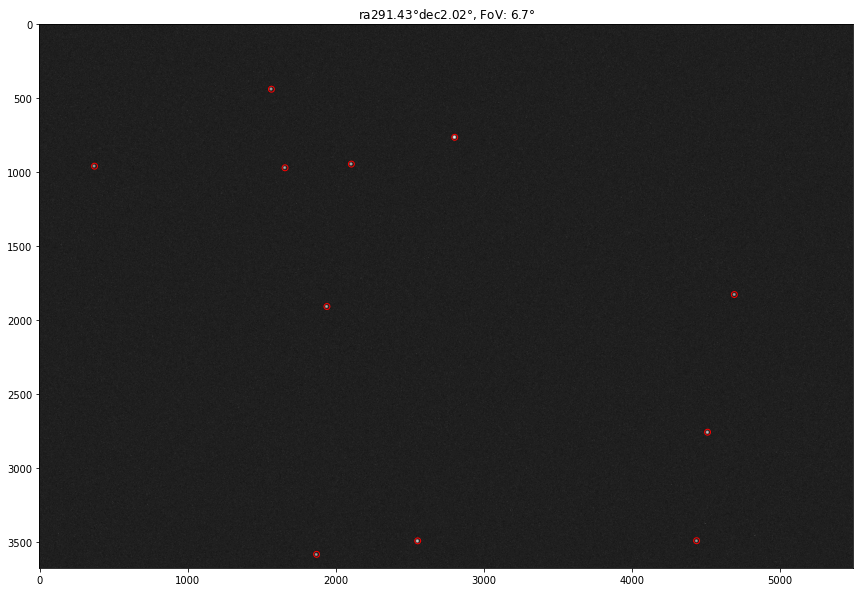

In [3]:
# %lprun -f run run()
run()

In [22]:
from tetra3 import Tetra3

t3 = Tetra3()

fov_db = 6 #deg
pme = 0.01 # error in ratio from pattern edges over longest edge
ps = 15 # max stars to use for patterns
cs = 20 # max stars to be detected in fov
mag = 10
db_name = "db_fov{0:0}ps{1:0}cs{2:0}pme".format(fov_db, ps, cs) + str(pme)[2:]

db_kwargs = {'max_fov':fov_db, 
            'save_as':db_name, 
            'pattern_stars_per_fov':ps,
            'catalog_stars_per_fov':cs, 
            'star_min_magnitude':mag,
            'pattern_max_error':pme}

t3.generate_database(**db_kwargs)

2020-09-06 21:50:04,151:tetra3.Tetra3-INFO: Loaded 9096 stars from catalogue.


KeyboardInterrupt: 

In [45]:
# test_database

from numpy import load

# data = load('tetra3/default_database.npz')
data = load('stereo/data/tetra3/db_fov10ps15cs20pme005.npz')

lst = data.files 

for item in lst: 
    print(item) 
    print(data[item])
    try:
        print(len(data[item]))
    except:
        pass

star_table
[[ 1.7676054  -0.29216012 -0.18725477  0.9391375  -0.28802148 -1.46      ]
 [ 1.6753126  -0.91970867 -0.06322706  0.60274476 -0.7954251  -0.72      ]
 [ 3.7331574   0.33411974 -0.78416574 -0.52682155  0.3279377  -0.04      ]
 ...
 [ 6.1750307  -1.1290424   0.4250276  -0.0461487  -0.9040032   7.4       ]
 [ 4.523945    0.86727417 -0.12118571 -0.6354553   0.7625684   7.48      ]
 [ 1.8646963   0.3962521  -0.26724043  0.88295794  0.38596356  7.68      ]]
8110
pattern_catalog
[[   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]
 ...
 [1694 5013 5486 6429]
 [ 692 1363 4943 5136]
 [   0    0    0    0]]
28932484
props_packed
('edge_ratio', 4, 25, 0.005, 10., 15, 20, 10., 0.05)


In [51]:
import sys
import tetra3
from PIL import Image as IMG
from pathlib import Path

# Create instance and load default_database (built with max_fov=12 and the rest as default)
t3 = tetra3.Tetra3('default_database')

# Path where images are
path = Path('tetra3/test_data/')
impath = next(path.glob('*.tiff'))
print('Solving for image at: ' + str(impath))
img = IMG.open(str(impath))
print(img)
solved = t3.solve_from_image(img)  # Adding e.g. fov_estimate=11.4, fov_max_error=.1 improves performance
print('Solution: ' + str(solved))

2020-09-02 14:49:31,451:tetra3.Tetra3-INFO: Loading database from: /home/zackashm/work/tetra3/default_database.npz


Solving for image at: tetra3/test_data/2019-07-29T204726_Alt40_Azi135_Try1.tiff
<PIL.TiffImagePlugin.TiffImageFile image mode=I;16 size=1024x768 at 0x7F608BA205F8>
Solution: {'RA': 296.75827806346416, 'Dec': 11.314043605282833, 'Roll': 24.88652500083402, 'FOV': 11.428950000451627, 'RMSE': 18.875220469074087, 'Matches': 18, 'Prob': 1.5254172898308684e-36, 'T_solve': 7.789666000462603, 'T_extract': 1228.1947989977198}


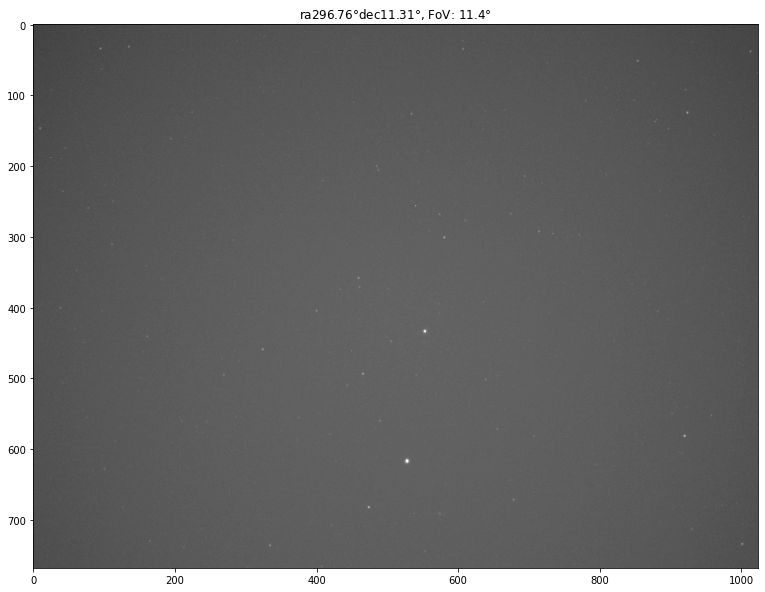

In [78]:
# plot and save tetra3 example with centroids

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=[20, 10])
plt.gray()
plt.title(
    r"ra{0:.2f}$\degree$dec{1:.2f}$\degree$, FoV: {2:.1f}$\degree$".format(
        solved['RA'], solved['Dec'], solved['FOV']
    )
)
vmax = np.max(img)
ax.imshow(img, norm=LogNorm(vmin=500, vmax=vmax))

# centroids = tetra3.get_centroids_from_image(img)
# x = centroids[:, 1]
# y = centroids[:, 0]
# for xx, yy in zip(x, y):
#     circ = Circle((xx, yy), 6, ec="red", fill=False)
#     ax.add_patch(circ)

img = fits.PrimaryHDU(img)                                                                                                    
img.writeto('tetra3example.fits', overwrite=True)      

# filename = 'tetra3example'
# plt.savefig(filename + ".png")

plt.show()

In [3]:
import stereo
from stereo.sim import *
from stereo.hardware import ASI183MM_Sigma135mm as cam
import tetra3
import itertools
from time import perf_counter as timestamp
from astropy.io import fits
import numpy as np
import random
from astropy.coordinates import SkyCoord
from astropy import units as u
    
# image and solver params
mag_limit = 8
psf_sigma = 3
centroid_dict = {
    'sigma':3, 
    'image_th':None, 
    'filtsize':10, 
    'binary_open':True, 
    'bg_sub_mode':'global_median', 
    'sigma_mode':'global_median_abs', 
    'centroid_window':None, 
    'max_area':None, 
    'min_area':5, 
    'max_sum':None, 
    'min_sum':100, 
    'max_axis_ratio':None
}
fov = cam.fov
fov_err = fov[2] - min(fov[0], fov[1])
solve_dict = {
    'fov_estimate':fov[0], 
    'fov_max_error':fov_err+0.5, 
    'pattern_checking_stars':6, 
    'match_radius':0.001, 
    'match_threshold':1e-7
}
db = "db_fov7ps15cs20pme01"
ds = 4
t3 = tetra3.Tetra3()
t3.load_database(db)

# get a random center coord from ANITA flight
ind = random.randrange(0, 37279)
obs = load_anita_observation(4, ind)
cen_alt = 45 #degrees                                                                                                           
cen_az = random.randrange(0, 360) # degrees                                                                                     
altaz = obs.altaz_frame
# center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs') 
center_radec = SkyCoord(ra=84.0500, dec=-1.2019, unit=u.deg) # Orion, 20 stars (works at 12 too), pass                        
# center_radec = SkyCoord(ra=296.75827806346416, dec=11.314043605282833, unit=u.deg) # 12 stars, pass                           
# center_radec = SkyCoord(ra=56.75, dec=24.1166666, unit=u.deg) # pleiades, 17 stars, pass                                      
# center_radec = SkyCoord(ra=160.7375, dec=-64.3942, unit=u.deg) # ic 2602, 8 stars, fail                                       
# center_radec = SkyCoord(ra=193.4125, dec=-60.3617, unit=u.deg) # jewel box, 9 stars, fail                                     
# center_radec = SkyCoord(ra=315, dec=45, unit=u.deg) # fail                                                                    
# center_radec = SkyCoord(ra=129.27992157, dec=-54.00658433, unit=u.deg) # 16 stars, pass  

# generate the image
image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

# check number of stars
#     star_ct = len(image.image_stars)

result = run_tetra3(image, t3=t3, downsample=ds, **solve_dict, **centroid_dict)

print(result)

2020-09-06 02:34:33,509:tetra3.Tetra3-INFO: Loading database from: /home/zackashm/work/tetra3/db_fov7ps15cs20pme01.npz


None


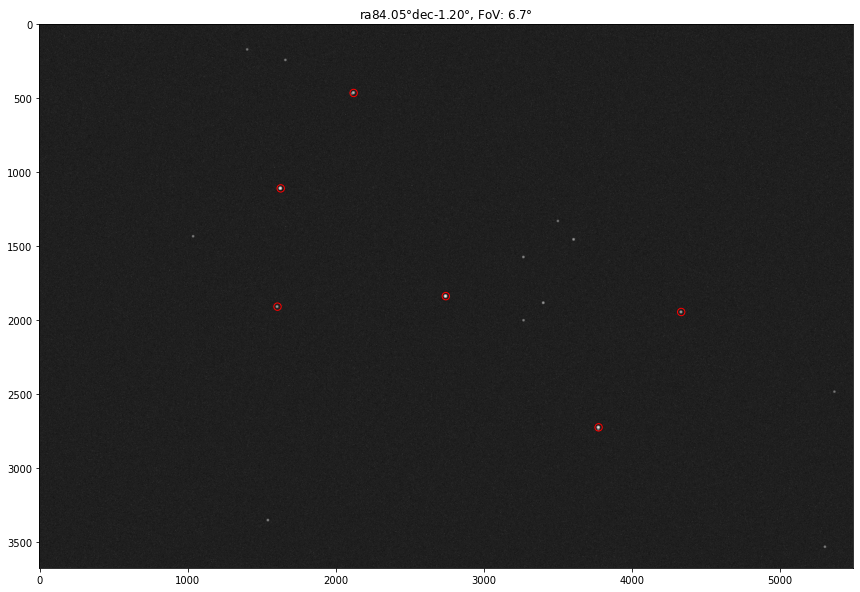

In [8]:
from tetra3 import get_centroids_from_image as t3centroids

centr = t3centroids(image.image, **centroid_dict)

image.plot(centroids=centr[:6], centroid_radius=25)

In [29]:
"""
Parameter sweep to obtain solution

Goal: see which param iteration has most solves. If tie, which has lowest mean solve time.

- sweep through params for each image
- write [iteration number, fov, pme, pcs, mr, mt, solve_time] to some file
- Separately, count how many of each iteration number -> which is max? -> use those params
"""

import stereo
from stereo.sim import *
from stereo.hardware import ASI183MM_Sigma135mm as cam
import stereo.flightpath as flightpath
import tetra3
from astropy.io import fits
import numpy as np
import random
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
from tqdm import tqdm

def solution_sweep(N_images, file, ra=None, dec=None):
    
    if ra:
        N_images = 1

    # initialize parameters
    cen_alt = 45 #degrees 
    mag_limit = 8
    psf_sigma = 3
    centroid_dict = {
        'sigma':3, 
        'image_th':None, 
        'filtsize':10, 
        'binary_open':True, 
        'bg_sub_mode':'global_median', 
        'sigma_mode':'global_median_abs', 
        'centroid_window':None, 
        'max_area':None, 
        'min_area':5, 
        'max_sum':None, 
        'min_sum':100, 
        'max_axis_ratio':None,
        'downsample':4
    }
    fov = cam.fov
    solve_dict = {
        'fov_estimate':fov[0], 
        'fov_max_error':0.1, 
        'pattern_checking_stars':None, 
        'match_radius':None, 
        'match_threshold':None
    }
    anita = flightpath.load_flight(4)

    solutions = 0
    images = 0
    out = open(file, 'w')
    
    while images < N_images:
    
        stars = 0
        while stars < 4:
            # set observation
            ind = random.randrange(0, 37279)
            lat = anita.latitude[ind]
            lon = anita.longitude[ind]
            alt = anita.altitude[ind]
            time = Time(anita.realTime[ind], format="unix")
            obs = Observation(lat=lat, lon=lon, alt=alt, time=time)
            altaz = obs.altaz_frame

            # set center ra,dec
            if ra:
                center_radec = SkyCoord(ra=ra, dec=dec, unit=u.deg)
            else:
                cen_az = random.randrange(0, 360) # degrees
                center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs')

            image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

            stars = len(image.image_stars)
            if stars < 4 and N_images == 1:
                print("Less than 4 stars in field.")
                return

        # set parameter ranges
        fovs = np.array(['db_fov6ps15cs20pme1', 'db_fov7ps15cs20pme005', 'db_fov10ps15cs20pme005'])
        pattern_match_error = np.array([0.001, 0.005, 0.01, 0.05])
        pattern_checking_stars = np.arange(4, 9)
        match_radius = np.array([0.001, 0.01, 0.1, 1])
        match_threshold = np.array([1e-10, 1e-9, 1e-8, 1e-7])

        params = [(fov, pme,pcs,mr,mt)
                  for fov in fovs
                  for pme in pattern_match_error
                  for pcs in pattern_checking_stars 
                  for mr in match_radius 
                  for mt in match_threshold]
        
        solved = False
        _fov = ''
        iteration = -1
            
        for fov, pme, pcs, mr, mt in tqdm(params):
            if not _fov == fov:
                db = False
            if not db:
                _fov = fov
                t3 = tetra3.Tetra3()
                t3.load_database(fov)
                db = True
            t3.database_properties['pattern_max_error'] = pme
            solve_dict['pattern_checking_stars'] = pcs
            solve_dict['match_radius'] = mr
            solve_dict['match_threshold'] = mt

            iteration += 1
            result = t3.solve_from_image(image.image, **centroid_dict, **solve_dict)

            if result['RA']:
                if np.abs(result['RA'] - center_radec.ra.value) < 6:
                    if not solved:
                        solutions += 1
                        solved = True
                    st = result['T_solve']
                    fovdeg = fov.split('ps')[0].split('fov')[1]
                    out.write(iteration, fovdeg, pme, pcs, mr, mt, st)
    out.close()

In [30]:
radec = {}
radec['ra'], radec['dec'] = 226.18154749770827, -49.630324750757474
result = solution_sweep(100, file='sweep1.txt')

  3%|▎         | 26/960 [00:11<06:46,  2.30it/s] 


KeyboardInterrupt: 

In [ ]:
"""
Parameter sweep and optimization

for each image:
    sweep through - databases and solve dict elements
    at each sweep, keep track of the (param value, solve time) pairs
    add a dictionary of params which contain the param values with minimized solve time
    append the dictionary elements to an array: [[minimized vals for image 1], [min vals for image 2], ...]
take the mean to be the optimized params
"""

from tqdm import tqdm

# how about one to optimize
def tetra3_opttime(N_images = 100, star_ct = 10):
    '''N_images: number of images to sweep params across, star_ct = star count to optimize'''

    # initialize parameters
    cen_alt = 45 #degrees 
    mag_limit = 8
    psf_sigma = 3
    centroid_dict = {
        'sigma':3, 
        'image_th':None, 
        'filtsize':10, 
        'binary_open':True, 
        'bg_sub_mode':'global_median', 
        'sigma_mode':'global_median_abs', 
        'centroid_window':None, 
        'max_area':None, 
        'min_area':5, 
        'max_sum':None, 
        'min_sum':100, 
        'max_axis_ratio':None,
        'downsample':2
    }
    fov = cam.fov
    solve_dict = {
        'fov_estimate':fov[0], 
        'fov_max_error':None, 
        'pattern_checking_stars':None, 
        'match_radius':None, 
        'match_threshold':None
    }
    anita = flightpath.load_flight(4)
    
    # begin sweep through images
    images = 0
    while images < N_images:
    
        stars = 0
        while stars != star_ct:

            # set observation
            ind = random.randrange(0, 37279)
            lat = anita.latitude[ind]
            lon = anita.longitude[ind]
            alt = anita.altitude[ind]
            time = Time(anita.realTime[ind], format="unix")
            obs = Observation(lat=lat, lon=lon, alt=alt, time=time)
            
            cen_az = random.randrange(0, 360) # degrees
            center_radec = SkyCoord(alt=cen_alt, az=cen_az, unit=u.deg, frame=altaz).transform_to('icrs')

            image = generate_starfield(center_radec, cam, obs, mag_limit, psf_sigma)

            stars = len(image.image_stars)

        # set parameter ranges
        fovs = np.array(['db_fov6ps15cs20pme1', 'db_fov7ps15cs20pme005', 'db_fov10ps15cs20pme005'])
        pmes = np.array([0.001, 0.005, 0.01, 0.05])
        pattern_checking_stars = np.arange(4, 9)
        match_radius = np.linspace(0.001, 1, 10)
        match_threshold = np.logspace(-10, -7, 5)

        for db in databases:
            t3 = tetra3.Tetra3()
            t3.load_database(db)
            t3.database_properties['pattern_max_error'] = 0.005
            for pcs, mr, mt in tqdm(params):
        #         pcs, mr, mt = 6, 0.001, 0.001
                solve_dict['pattern_checking_stars'] = pcs
                solve_dict['match_radius'] = mr
                solve_dict['match_threshold'] = mt

        #         print(solve_dict)

                result = t3.solve_from_image(image.image, **centroid_dict, **solve_dict)

                if result['RA']:
                    print(solve_dict, '\n')
                    print("Solution:", result)
                    solution = True

        if not solution:
            print('No solutions found :(')

In [285]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

# plot histogram of indices
def param_hist(index, file=None):
    """index=the parameter index column, file=save file name if not none"""
    
    len_index = int(np.max(index) - np.min(index) + 1)

    fig, ax = plt.subplots(figsize=[20, 14])
    ax.set(xlabel='Parameter Index', ylabel='Counts', 
           title=r"Best Parameter Set by Count")
    ax.grid(True)

    # the histogram of the data
    n, bins, patches = plt.hist(index, len_index, density=False, facecolor='darkgreen', alpha=0.8, rwidth=0.8)
    
    if file:
        plt.savefig(file+'_ParamHist.png')

    #plot
    plt.show()
    
    # return the indices with the max solve counts
    return np.array([i for i in range(len(n)) if n[i]==np.max(n)])


# get the best parameter set via min solve time
def get_best_params(data, file=None):
    
    len_ind = int(np.max(data[0]) - np.min(data[0]) + 1)
    
    # get the indices with max solve counts
    maxct_ind = param_hist(data[0], file=file)
    
    # get the params corresponding to maxct_ind
    maxct_data = data[:,np.isin(data[0],maxct_ind)]
    
    # plot time vs ind
    solve_time = np.array([np.mean(maxct_data[6][maxct_data[0]==ind]) for ind in maxct_ind])
    solve_time_err = np.array([np.std(maxct_data[6][maxct_data[0]==ind]) for ind in maxct_ind])
    
    plot_data = np.array([[x, y] for x,y in sorted(zip(maxct_ind, solve_time))], dtype=float).T
    
    fig, ax = plt.subplots(figsize=[15, 10])

    ax.set(xlabel='Parameter Index', ylabel='Solve Time [ms]', 
           title='tetra3 Solve Time vs Parameter Set')

    plt.errorbar(*plot_data, yerr=solve_time_err, fmt='o', capsize=5, c='blue')
    
    if file:
        plt.savefig(file+'_time.png')
    
    plt.show()
    
    # get the min
    best_data = plot_data.T[plot_data[1] == plot_data[1].min()]
    
    best_param_ind = best_data[:,0]
    best_time = best_data[:,1]
    best_time_err = solve_time_err[plot_data[1] == plot_data[1].min()]
    
    # fov, pme, pcs, mr, mt
    best_params = np.array([[data[t][data[0]==ind][0] for ind in best_param_ind] for t in range(1, 6)])
    
    if file:
        print(file + ' SWEEP PARAMS:\n' + 
              'ind = {0}\nfov = {1}\npme = {2}\npcs = {3}\nmr = {4}\nmt = {5}\ntime = {6} +/- {7}'.format(
                  best_param_ind, *best_params, best_time, best_time_err)
             )
    else:
        print('SWEEP PARAMS:\n' +
              'ind = {0}\nfov = {1}\npme = {2}\npcs = {3}\nmr = {4}\nmt = {5}\ntime = {6} +/- {7}'.format(
                  best_param_ind, *best_params, best_time, best_time_err)
             )
    
    return best_params, best_time

# star ct histogram (which count was best?)
# actually useless - we want to see the solve vs fail rate for each star count individually
# can't compare to each other directly because it's just more likely to have less stars
def ct_hist(star_ct):
    """star_ct=column of star counts"""

    cts = int(np.max(star_ct) - np.min(star_ct) + 1)
    
    fig, ax = plt.subplots(figsize=[20, 14])
    ax.set(xlabel='Star Count', ylabel='Counts', 
           title=r"Best Star Count for Solutions by Count")
    ax.grid(True)

    # the histogram of the data
    n, bins, patches = plt.hist(star_ct, cts, density=False, facecolor='darkgreen', alpha=0.8, rwidth=0.8)
    
#     if file:
#         plt.savefig(file+'_CtHist.png')

    #plot
    plt.show()
    
    # return the indices with the max solve counts
    return np.array([i for i in range(len(n)) if n[i]==np.max(n)])

In [339]:
FILE = 'stereo/lowsweep.txt'

data = np.genfromtxt(FILE, unpack=True)

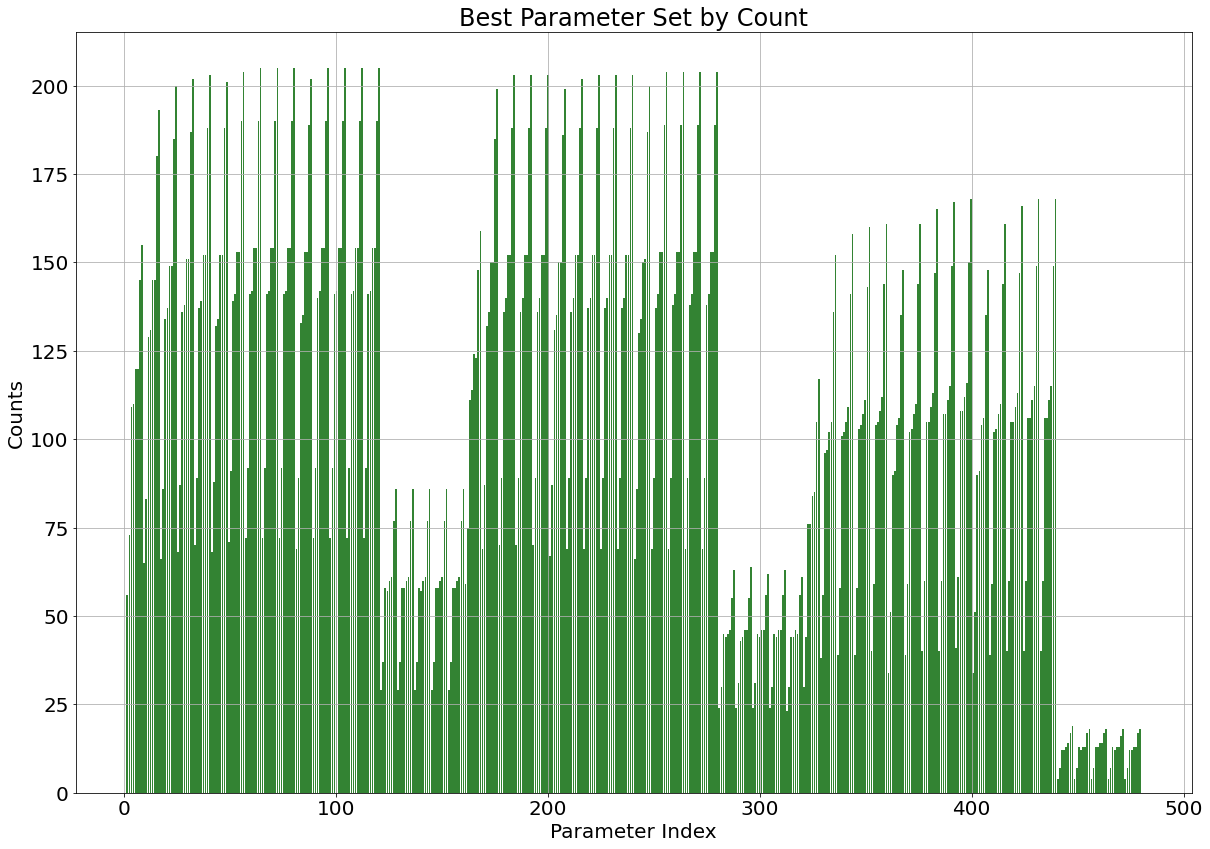

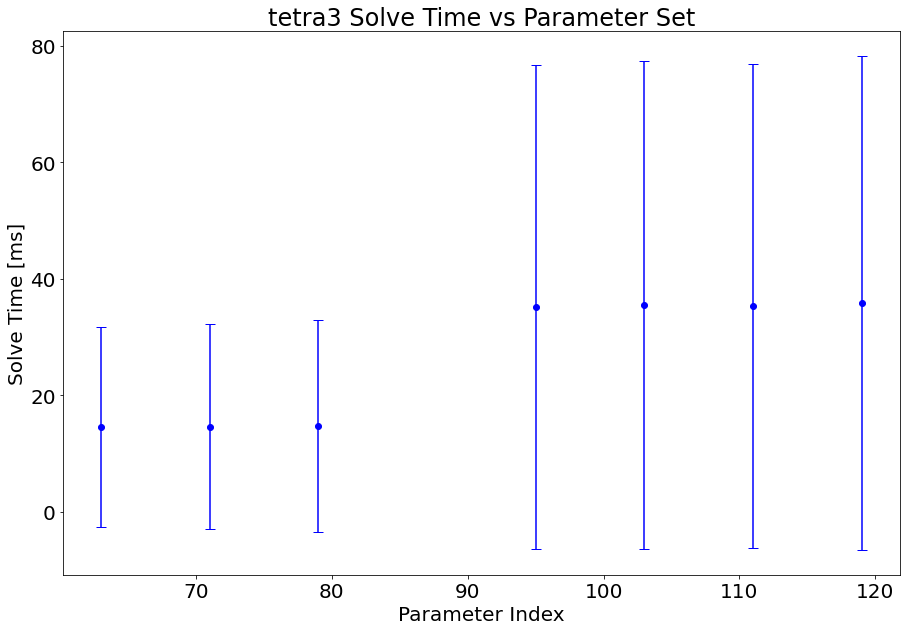

SWEEP PARAMS:
ind = [63.]
fov = [6.]
pme = [0.005]
pcs = [6.]
mr = [0.01]
mt = [1.e-08]
time = [14.507] +/- [17.194]
(array([[6.e+00],
       [5.e-03],
       [6.e+00],
       [1.e-02],
       [1.e-08]]), array([14.507]))


In [340]:
x = get_best_params(data, file=None)
print(x)

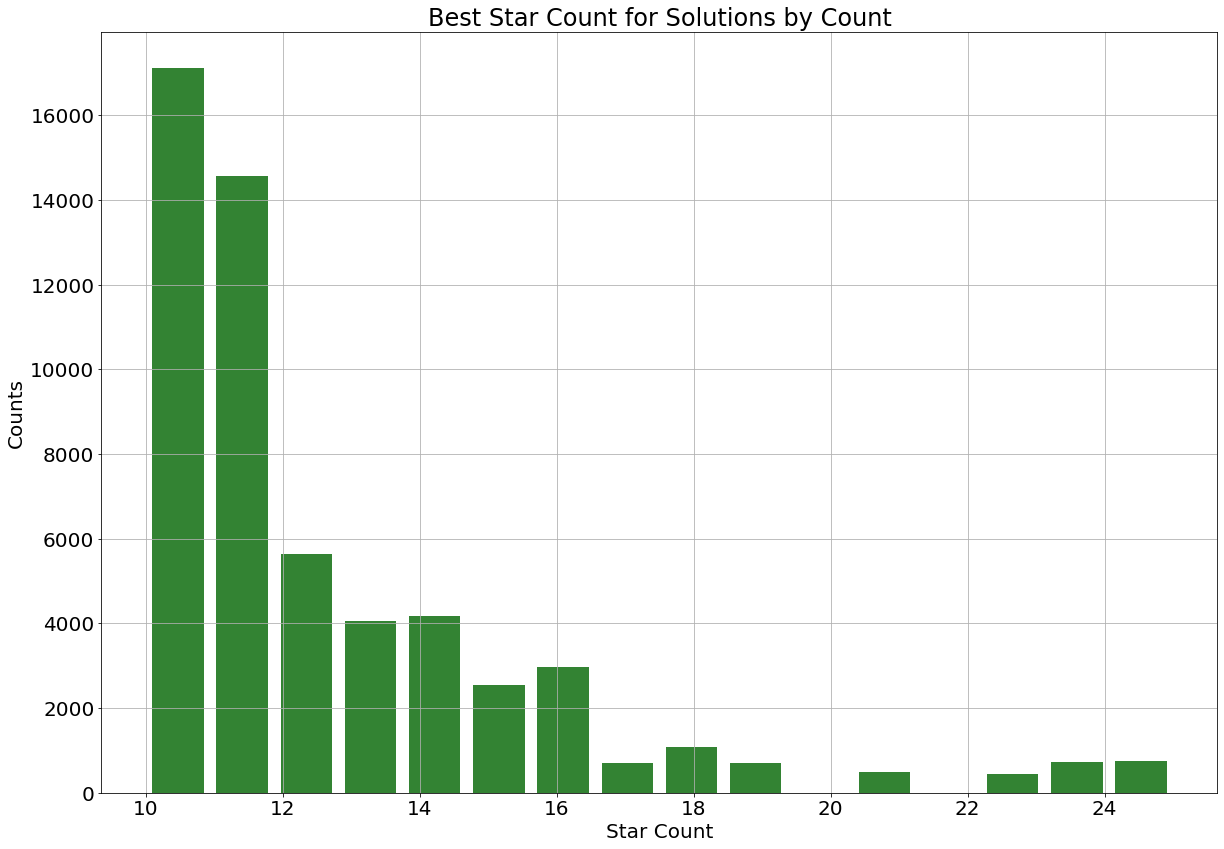

array([0])

In [176]:
ct_hist(data[-1])

In [349]:
total_number = 0
solved_tot = 0
solved_per_solve = 0
solved_per_tot = 0
fail_tot = 0
fail_per_solve = 0
fail_per_tot = 0
timeout_tot = 0
timeout_per_solve = 0
timeout_per_tot = 0
low_ct_tot = 0
low_ct_per = 0
tot_time = 1000000

for i in range(2,12):
    FILE = 'stereo/data/images/kaon/RUN{0}.txt'.format(i)
    with open(FILE, 'rt') as file:
        for line in file:
            if '#' not in line:
                break
            header += line[2:]
            _temp = line.split()
            if "Total Number" in line: 
                _total_number = float(_temp[5])
            elif "Solved Trials" in line:
                _solved_tot = float(_temp[3][:-1])
            elif "Solver Fails" in line:
                _fail_tot = float(_temp[3][:-1])
            elif "Timeout Fails" in line:
                _timeout_tot = float(_temp[3][:-1])
            elif "Low Star Counts" in line:
                _low_ct_tot = float(_temp[5][:-1])
            elif "Time" in line:
                _tot_time = float(_temp[5])
            
        total_number += _total_number
        solved_tot += _solved_tot
        fail_tot += _fail_tot
        timeout_tot += _timeout_tot
        low_ct_tot += _low_ct_tot
        tot_time = min(tot_time, _tot_time)
    
solved_per_solve = 100 * solved_tot / (total_number - low_ct_tot)
solved_per_tot = 100 * solved_tot / total_number
fail_per_solve = 100 * fail_tot / (total_number - low_ct_tot)
fail_per_tot = 100 * fail_tot / total_number
timeout_per_solve = 100 * timeout_tot / (total_number - low_ct_tot)
timeout_per_tot = 100 * timeout_tot / total_number
low_ct_per = 100 * low_ct_tot / total_number

with open('stereo/data/images/FULL.txt', 'w') as out:
    out.write(
            '# STEREO Data for run titled "{0}"\n'.format('FULL') + 
            '#\n# Total Number of Trials: {0}\n'.format(total_number) +
            '# Solved Trials: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                solved_tot, solved_per_solve, solved_per_tot) +
            '# Solver Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                fail_tot, fail_per_solve, fail_per_tot) +
            '# Timeout Fails: {0}, {1}% (of attempted solves), {2}% (total)\n'.format(
                timeout_tot, timeout_per_solve, timeout_per_tot) +
            '# Low Star Counts (<{0}): {1}, {2}%\n'.format(
                4, low_ct_tot, low_ct_per) +
            '# Total Data Collection Time: {0} hrs\n'.format(tot_time) + 
            '# skip_header = 23\n' +
            '#\n# Column Notes\n' + 
            '# num: Data Index\n' + 
            '# solved: 1 = Success, 0 = Fail, -1 = Undetermined (low star count or timed out)\n' + 
            '# alt_error: Error in Altitude (from 45 deg)\n' + 
            '# A4_index: Index used for ANITA4 data\n' + 
            '# star_ct: Number of Stars in the field\n' + 
            '# real_ra: Real RA of the center of the field in degrees\n' +
            '# real_dec: Real DEC of the center of the field in degrees\n' +
            '# ra: Result RA of the center of the field in degrees\n' + 
            '# dec: Result DEC of the center of the field in degrees\n' +
            '# solve_time: Total time taken to solve (or fail) in seconds\n' +
            '#\n# num     solved     alt_error     A4_index     star_ct     real_ra     real_dec     ra     dec     solve_time\n'
        )

    for i in range(2,12):
        FILE = 'stereo/data/images/kaon/RUN{0}.txt'.format(i)
        with open(FILE, 'rt') as file:
            for line in file:
                if '#' not in line:
                    out.write(line)

In [200]:
print((40.34e6 * 30 * 24 * 60 * 60 ) / 1e12)

104.56128


In [204]:
l = '3     100     -999     0.34556     3     285866'

print(l)

print(l[l.find('     '):])
i = 42
lbar = str(i) + l[l.find(' '):]

print(lbar)


3     100     -999     0.34556     3     285866
     100     -999     0.34556     3     285866
42     100     -999     0.34556     3     285866


In [222]:
import timeout_decorator

def bar(t, nice, not_nice):
    print(*args)
    @timeout_decorator.timeout(t, timeout_exception=StopIteration)
    def foo(*args):
        while nice < not_nice:
            nice += 1
        print(nice)
    foo(nice, not_nice)
        

In [224]:
try:
    with open('doesntexist.txt', 'rt') as file:
        print(file)


FileNotFoundError: [Errno 2] No such file or directory: 'doesntexist.txt'